In [42]:
__author__ = 'Security'
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool
from math import factorial

In [17]:
class Distribution:
    sample = stats.norm.rvs(size=1)
    discription = ""
    def __init__(self, sample, discription):
        self.sample = sample
        self.discription = discription



In [18]:
def normal(size, theta):
    return Distribution(stats.norm.rvs(size=size, loc=theta[0], scale=theta[1]), 'normal')



In [19]:
def gamma(size, theta):
    return Distribution(stats.gengamma.rvs(theta[1], theta[0], size=size), 'gamma')


In [20]:
def uniform(size, theta):
    return Distribution(stats.uniform.rvs(size=size, loc=theta[0], scale=(theta[1]-theta[0])), 'uniform')



In [21]:
def pois(size, theta):
    return Distribution(stats.poisson.rvs(theta, size=size), 'poisson')


In [22]:
def bin(size, theta):
    return Distribution(stats.binom.rvs(theta[0], theta[1], size=size), 'binomial')


In [23]:
def geom(size, theta):
    return Distribution(stats.geom.rvs(theta, size=size), 'geometric')


In [24]:
def beta(size, theta):
    return Distribution(stats.beta.rvs(theta[0], theta[1], size=size), 'beta')


In [25]:
class distGen(stats.rv_continuous):
    def _pdf(self, x, a, b):
        if (x < b):
            return 0
        return np.exp((float(b)-x)/float(a))/(float(a))



In [26]:
def distrFrom3Task(size, theta):
    distr = distGen(name='distr')
    return Distribution(distr.rvs(theta[0], theta[1], size=size), 'Distribution from 3 task')
distrFrom3Task(50, (1, 1))


In [27]:
def parametrizedBootstrapSample(disribution: Distribution, size, theta):
    return disribution(size, theta).sample


In [28]:
def arrayOfSamples(sample, size):
    return np.array([sample[:n] for n in range(1, size)])


In [29]:
def randomIndexes(l, r):
    return [np.random.randint(l, r)]


In [16]:
def nonParametrizedBootstrapSample(distribution: Distribution, size, theta):
    sample = distribution(size, theta).sample
    randIndexes = randomIndexes(0, size)
    return np.array([sample[i] for i in randIndexes])


In [ ]:
grid = np.arange(-2, 2, 0.001)
weibullSample = [float(line.rstrip('\n')) for line in open('499 Малышев Александр.txt', 'r')]


def likelihoodLogFunction(gamma, sample):
    return np.sum([(gamma - 1) * np.log(x) - x**(gamma) + np.log(gamma) for x in sample])


def likelihoodFunctionValues(sample, grid):
    return [likelihoodLogFunction(10**gamma, sample) for gamma in grid]


def estimationForWeibullSample(sample, grid):
    return grid[np.argmax(likelihoodFunctionValues(sample, grid))]

for sample in [weibullSample[:4 * 365], weibullSample]:
    plt.figure(figsize=(15, 9))
    plt.plot(grid, likelihoodFunctionValues(sample, grid))
    plt.show()
    print('Estimation for first {:} years = {:}'.format(len(sample) // 365, estimationForWeibullSample(sample, grid)))

In [45]:
N = 1000
theta = 1
sample = stats.expon.rvs(scale = theta, size=N)

slices = [sample[:n] for n in range(0, N)]

def getStatistics(k, n):
    sampleSlice = sample[:n] ** k
    return (factorial(k) / (sampleSlice.mean())) ** (1/float(k))



In [46]:
def getMean(k, theta):
    return np.min(np.array([abs(getStatistics(k, n) - theta) for n in range(1, N)]))

In [47]:
def configurePlot(theta, ymin, ymax):
    plt.figure(figsize=(15, 9))
    plt.title(r"$\theta= {0:}$".format(int(theta)))
    plt.ylabel(r"$|\hat{\theta} - \theta|$")
    plt.ylim(ymin, ymax)

def addPlot(k, theta):
    plt.plot(np.array([abs(getStatistics(k, n) - theta) for n in range(1, N)]), label='k = {:}'.format(int(k)))

def drawPlot(ks, theta, ymin = 0, ymax = 1):
    configurePlot(theta, ymin, ymax)
    for k in ks:
        addPlot(k, theta)
    plt.legend(loc='best')
    plt.show()

In [51]:
def getBestK(theta):
    subres = [] #здесь будем хранить разницу значений в зависимости от k
    for _ in range(10):
        pool = Pool(4)
        results = pool.map(getMean, range(1, 12), theta)
        subres.append(np.argmin(results))
    return np.argmax(subres) + 1

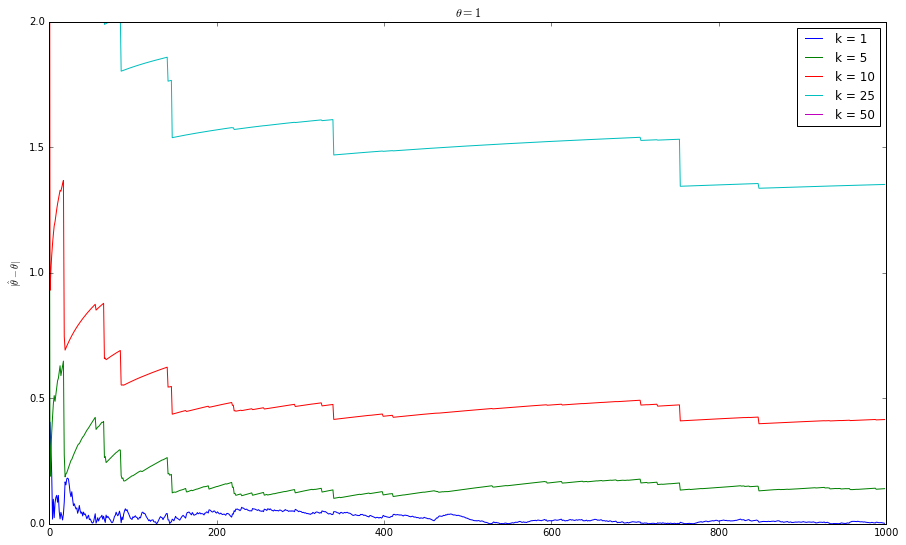

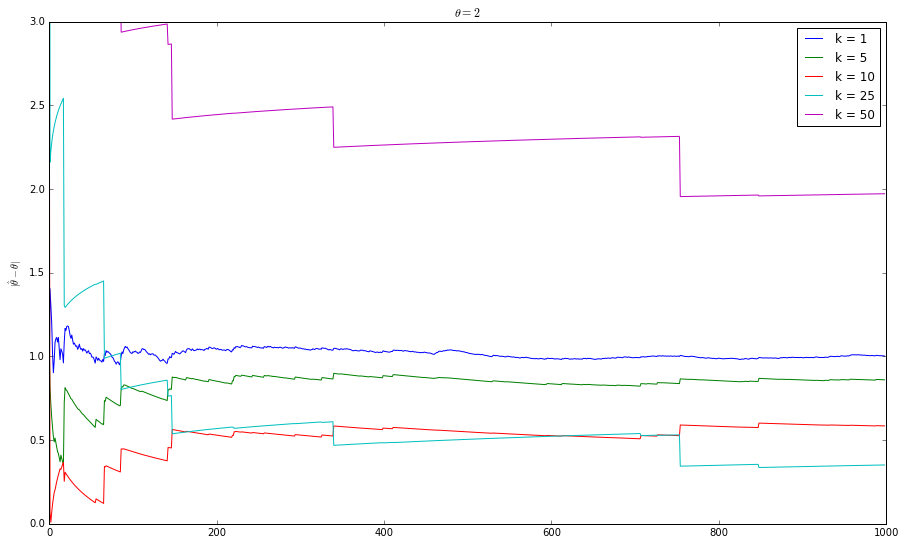

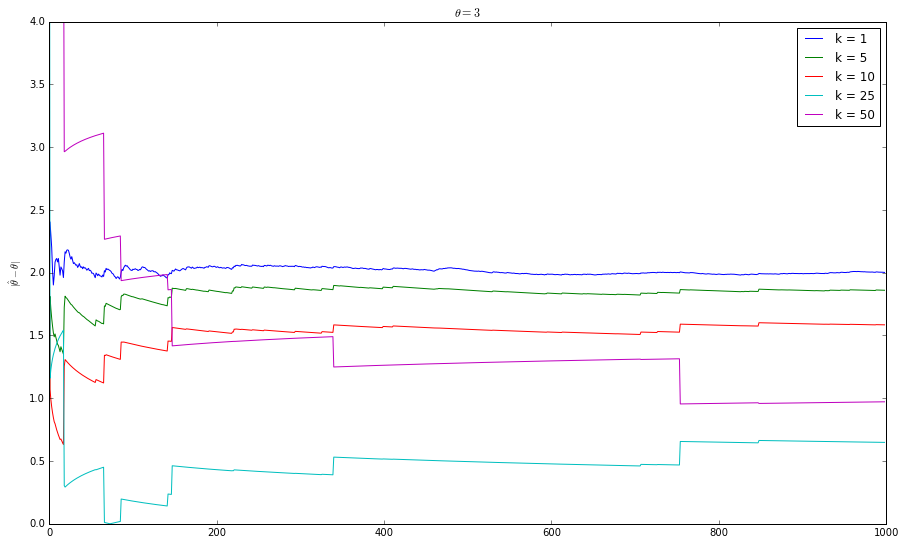

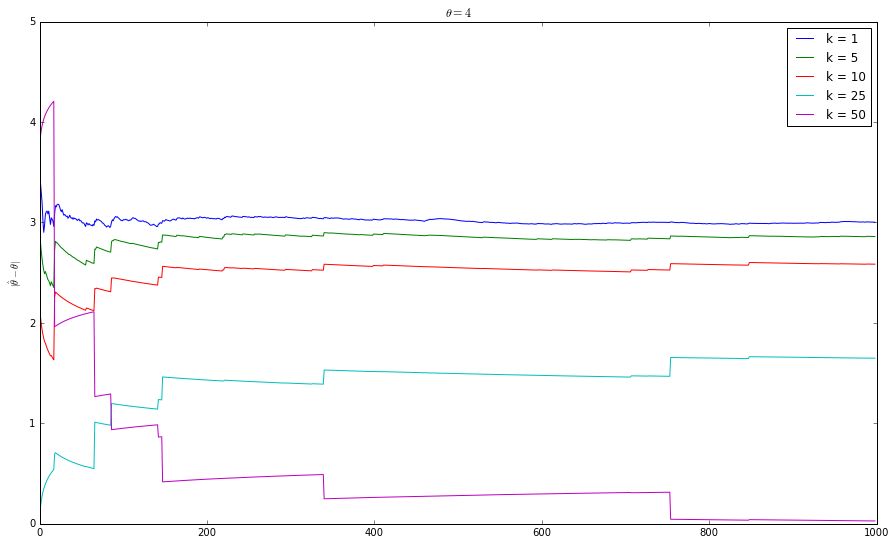

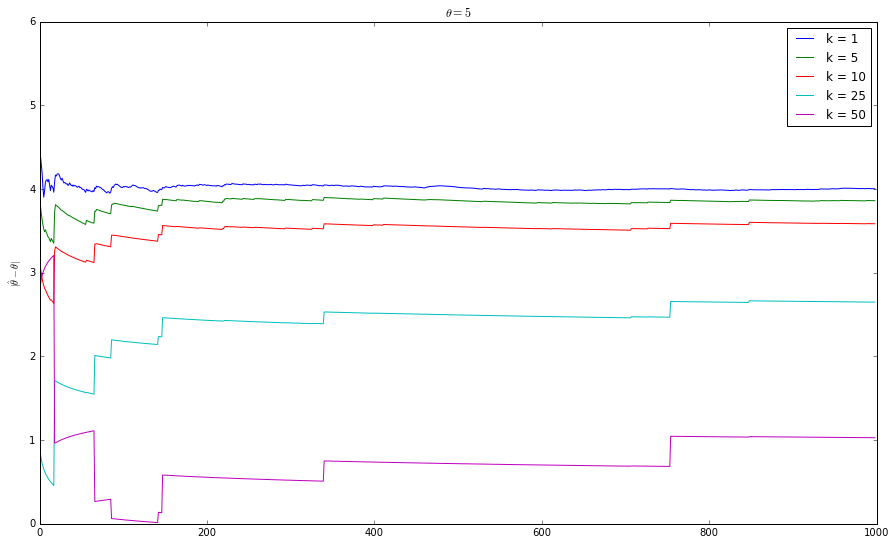

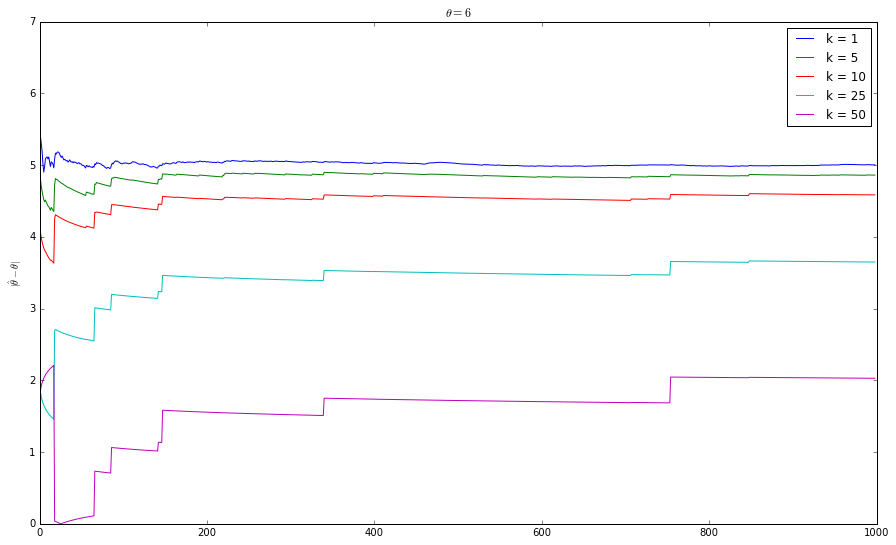

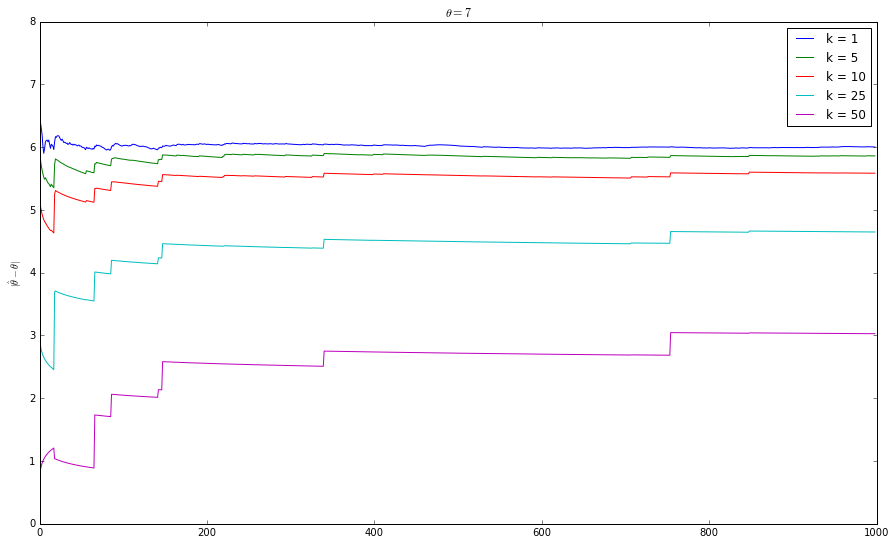

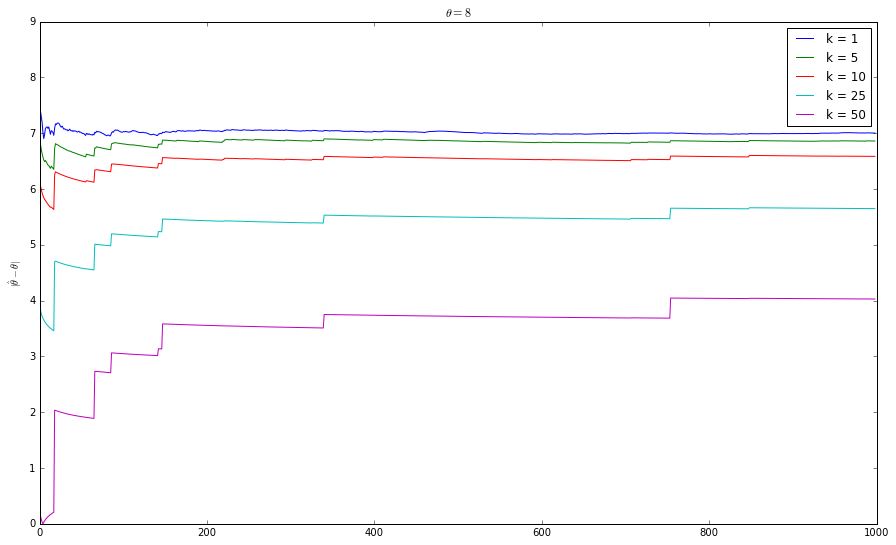

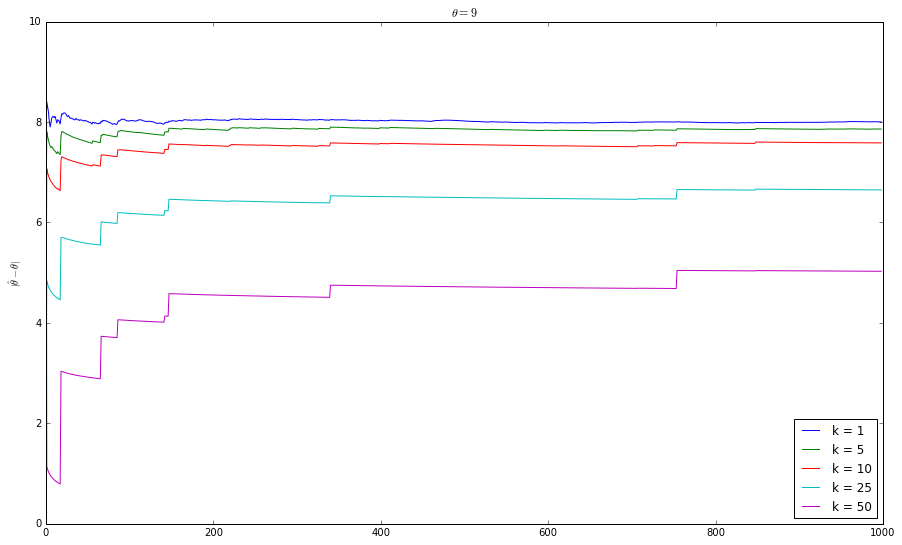

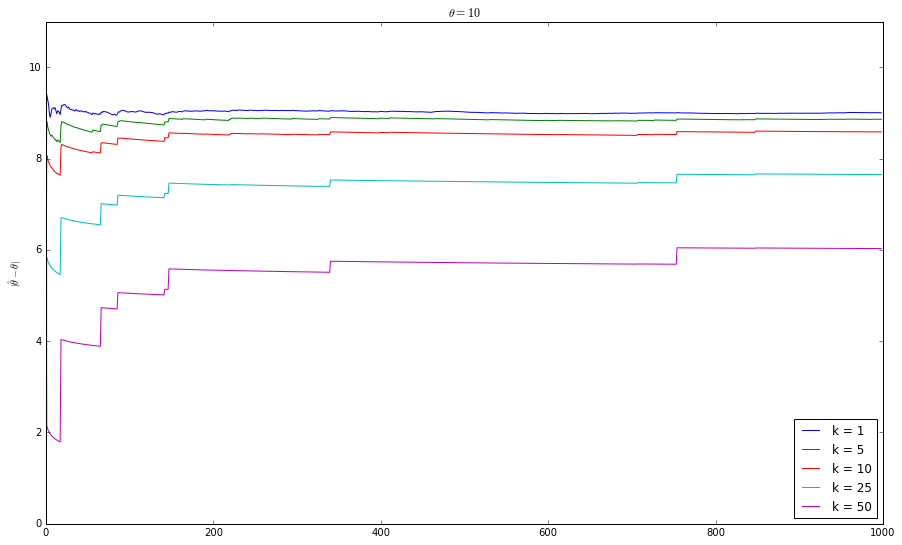

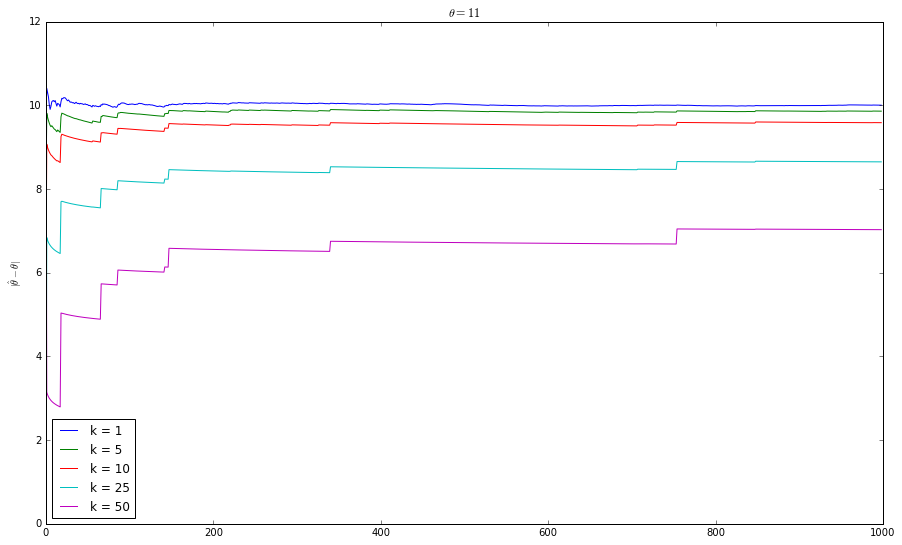

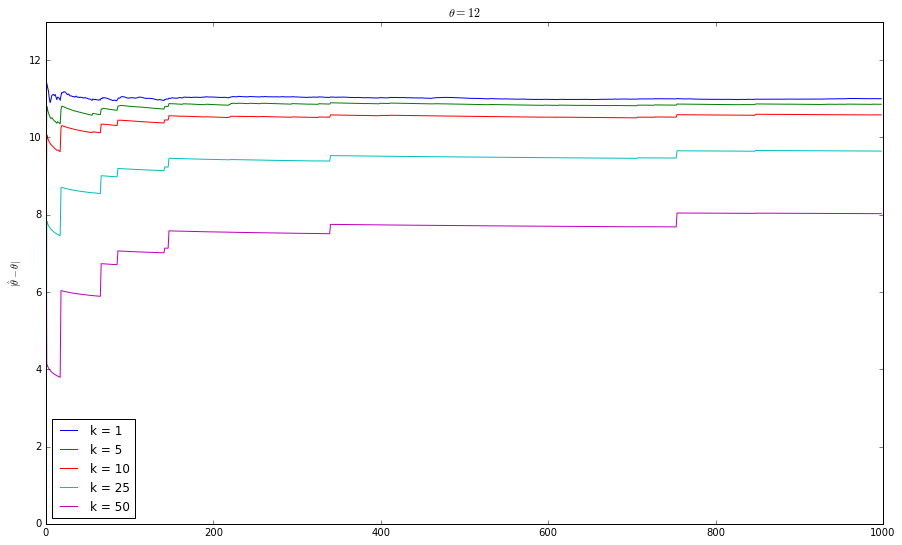

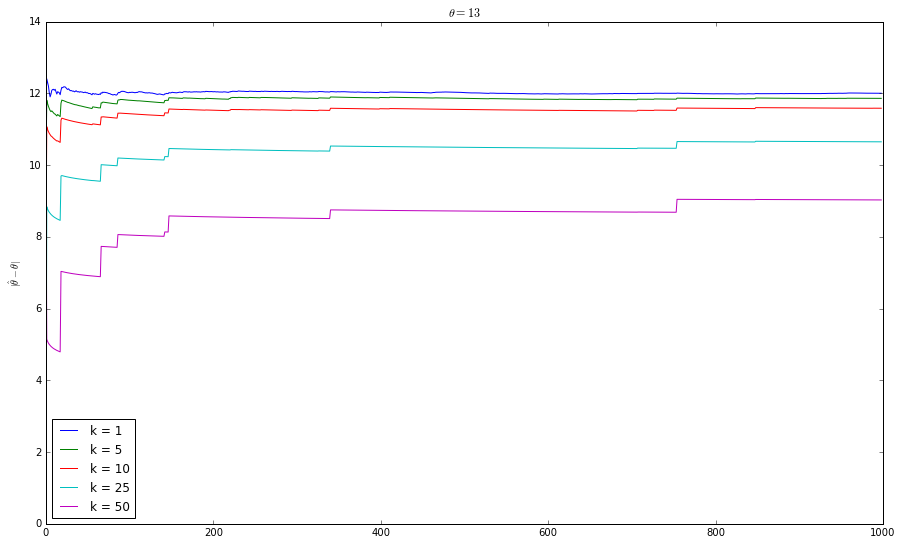

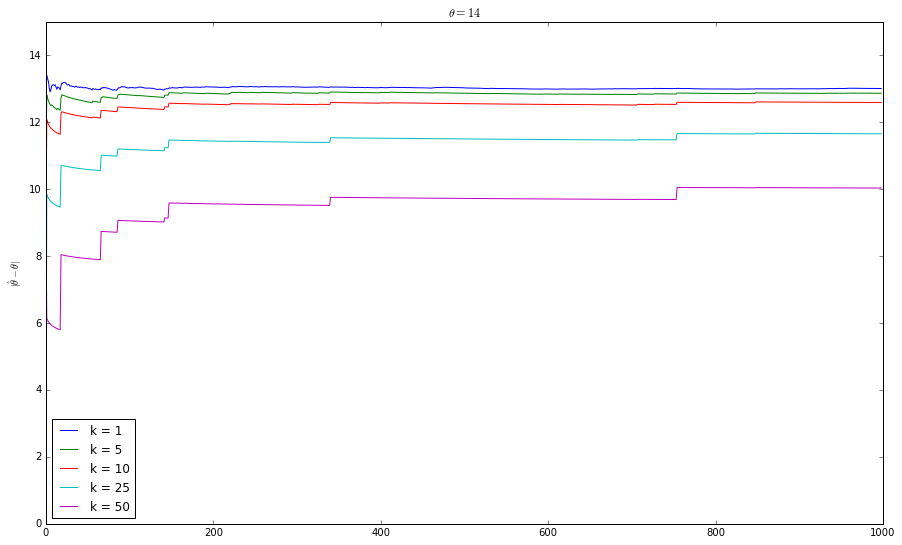

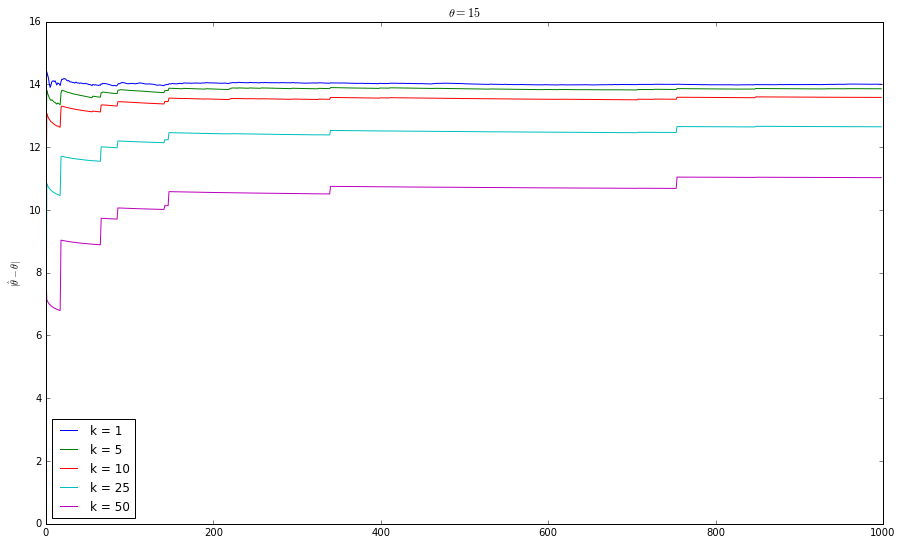

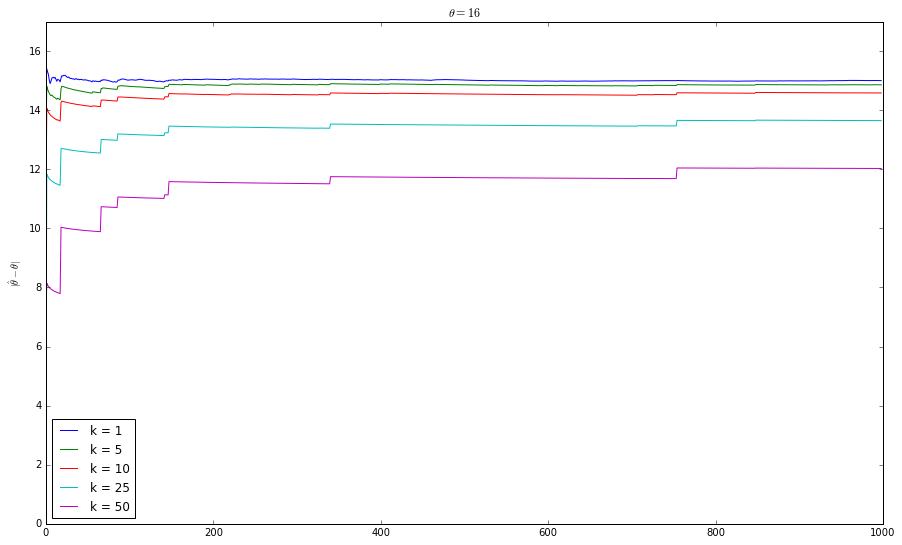

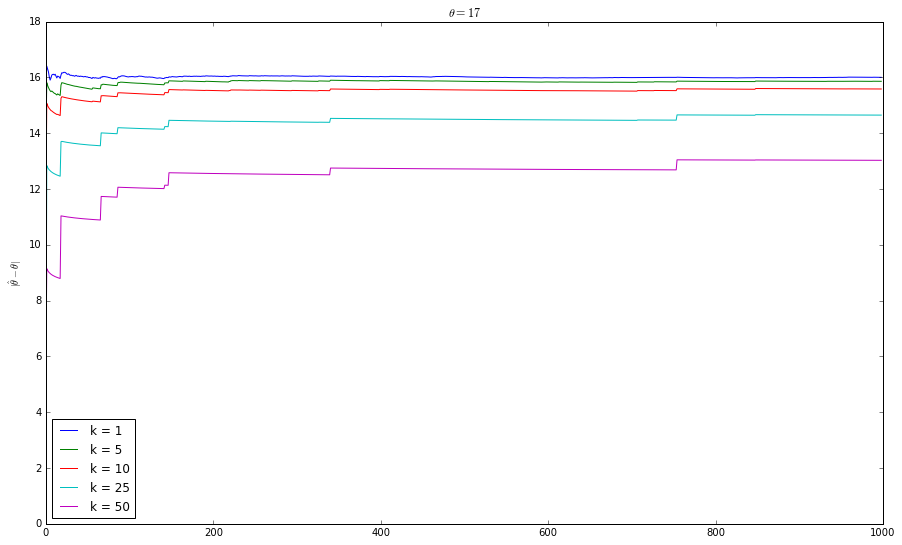

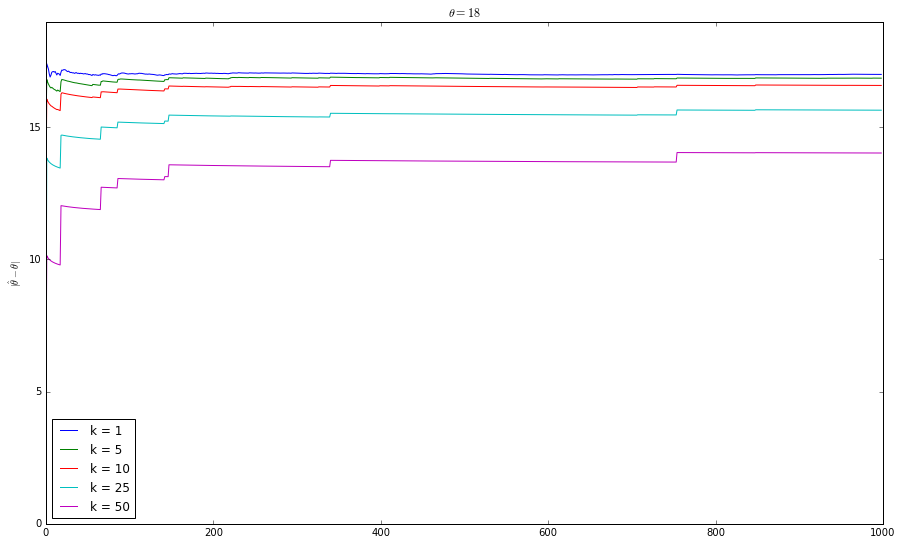

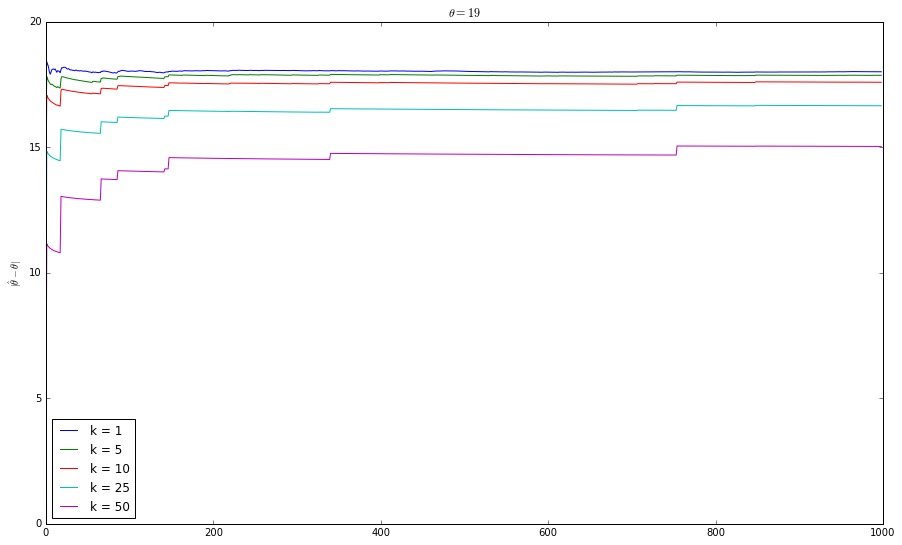

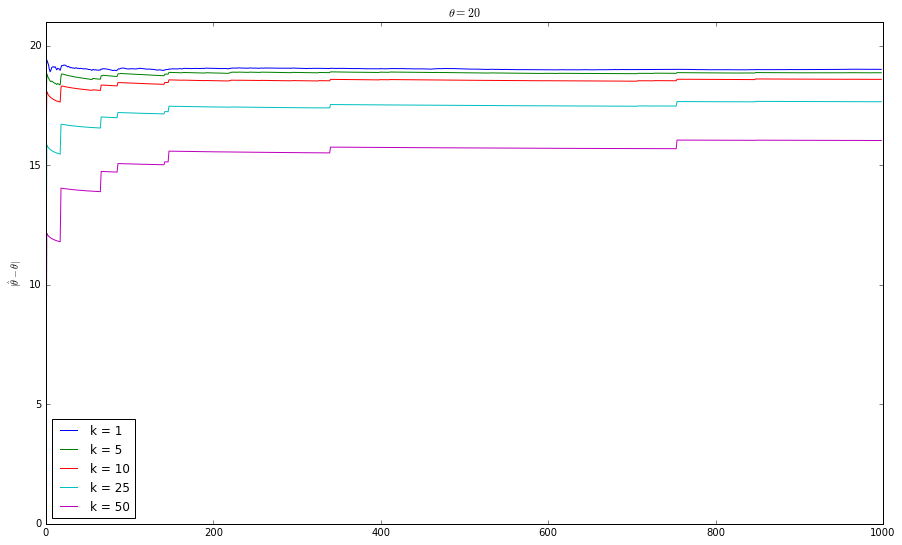

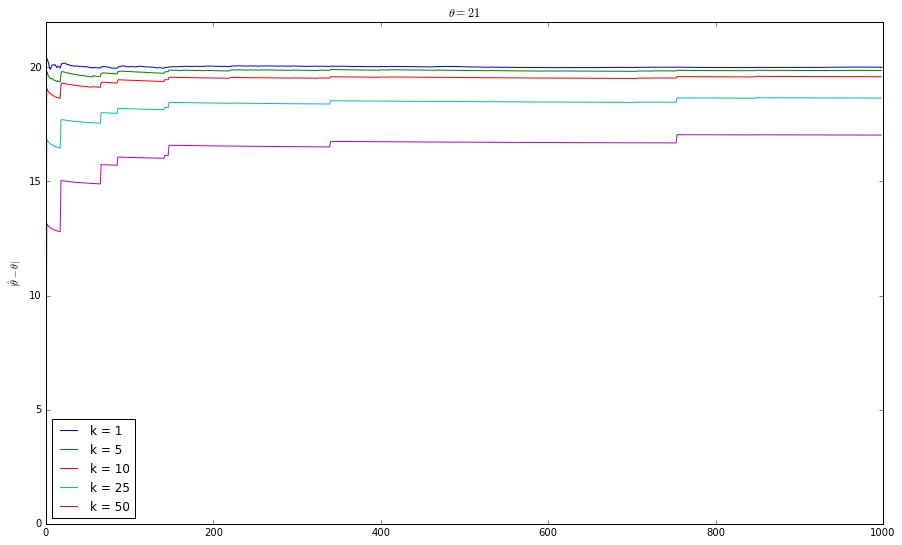

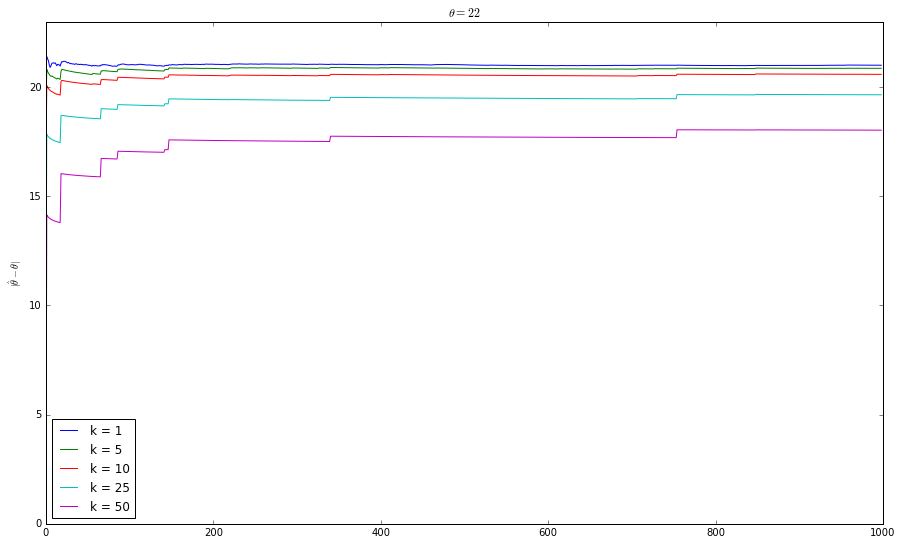

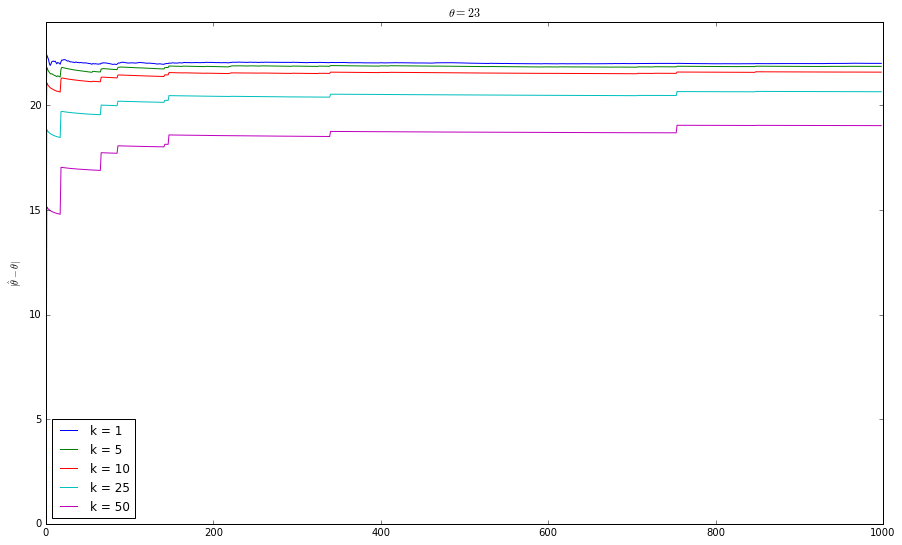

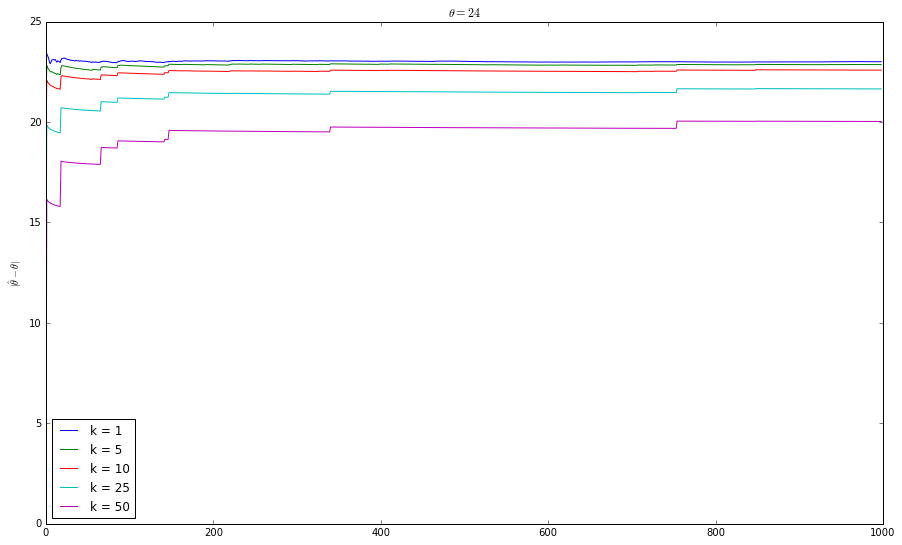

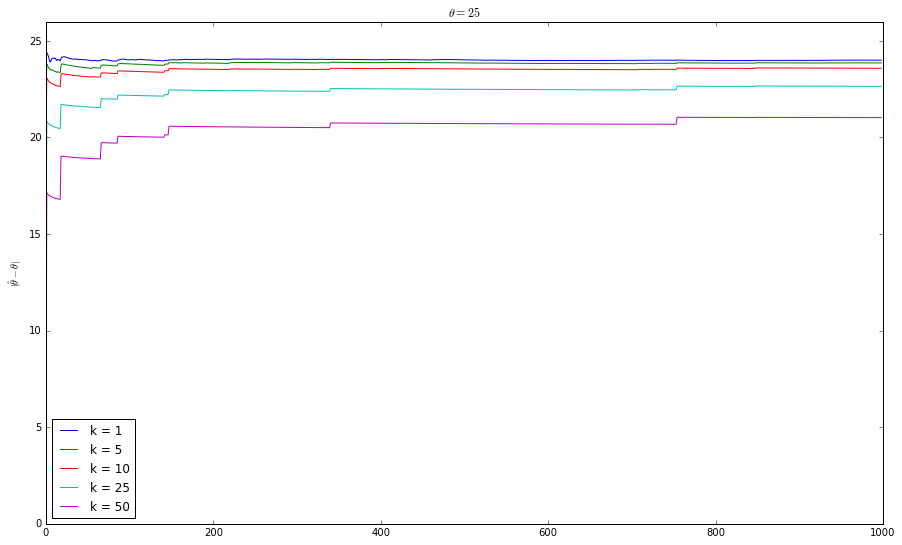

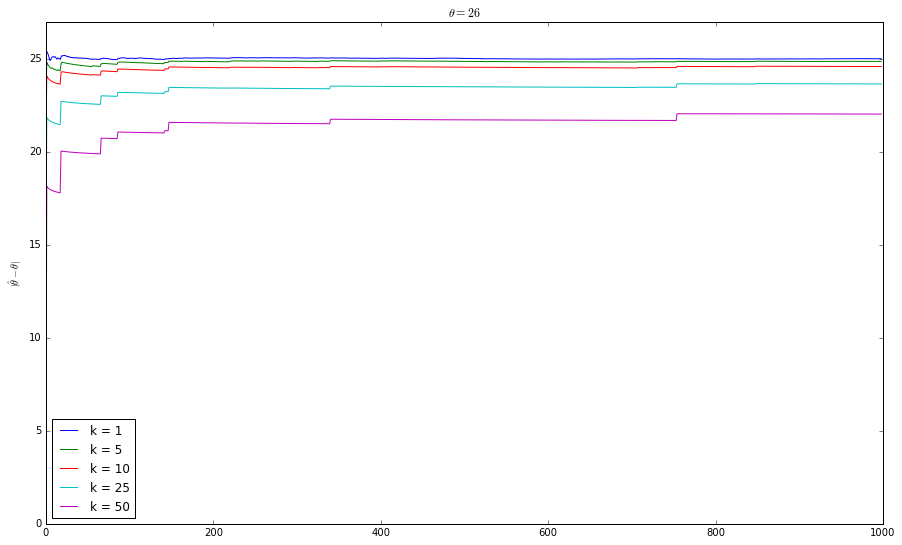

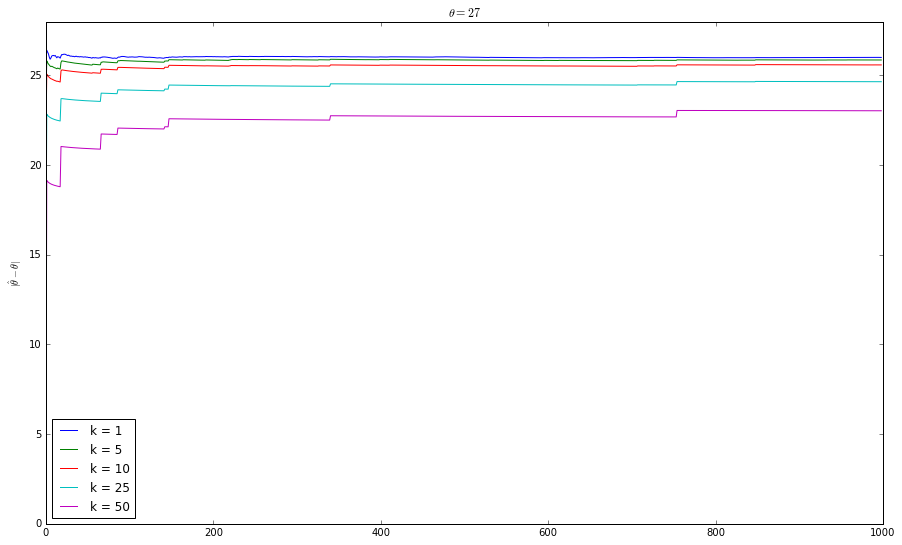

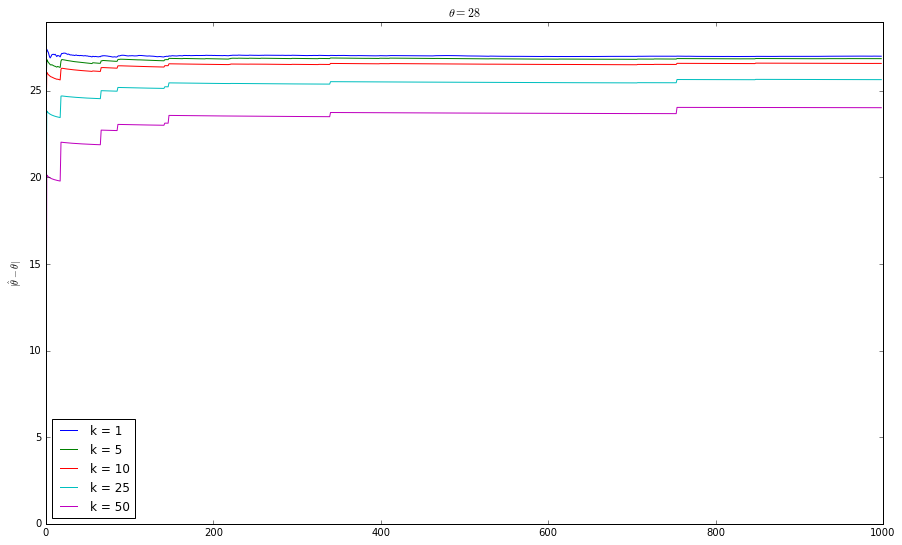

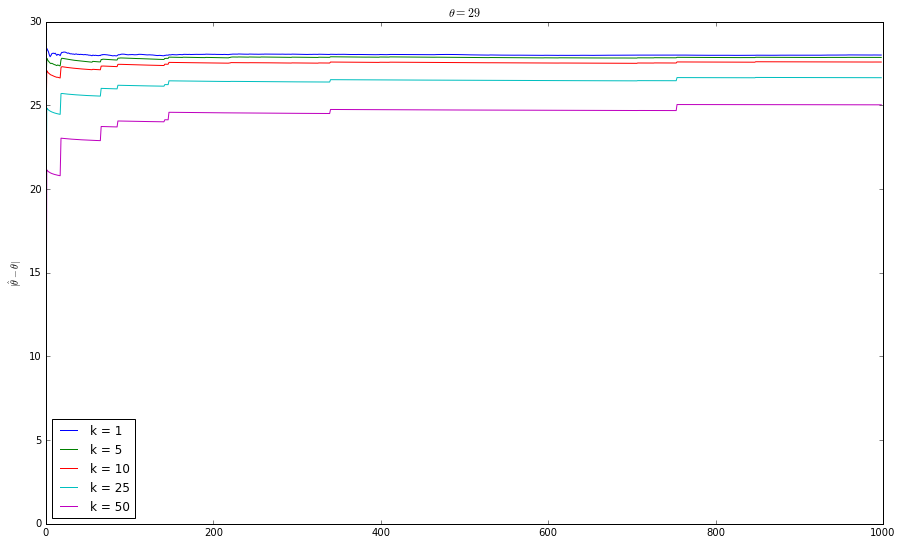

In [52]:
for th in range(1, 30):
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)

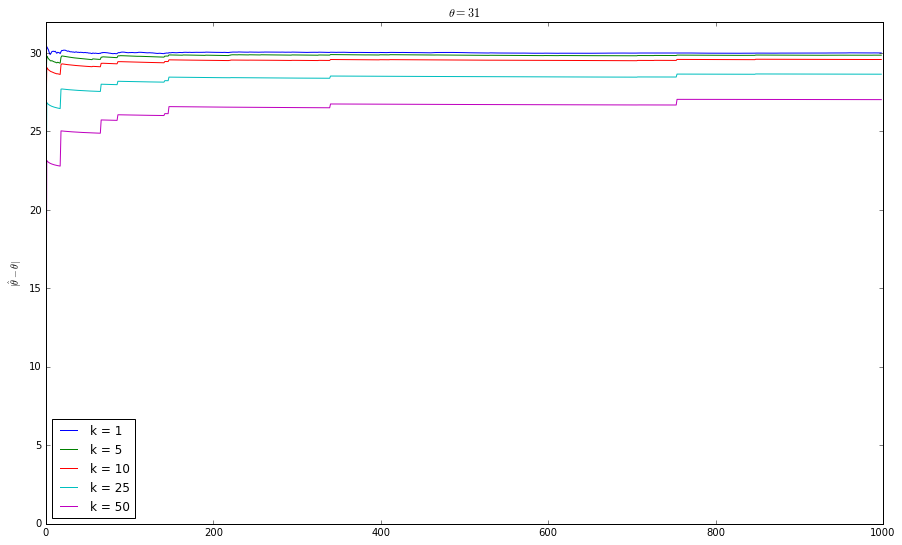

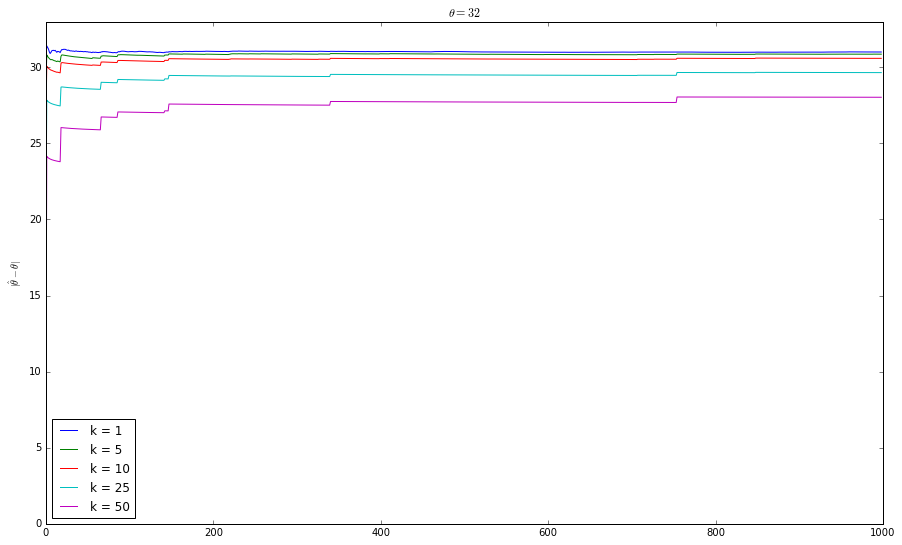

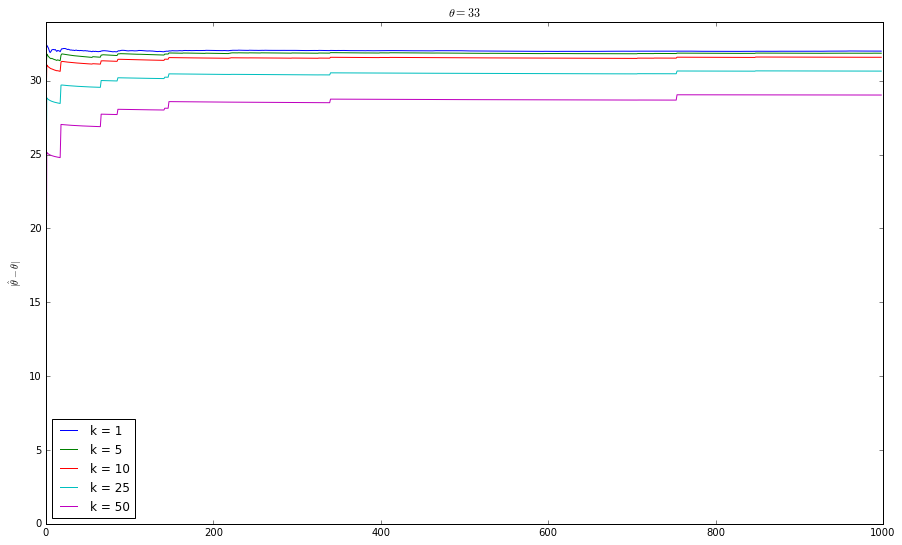

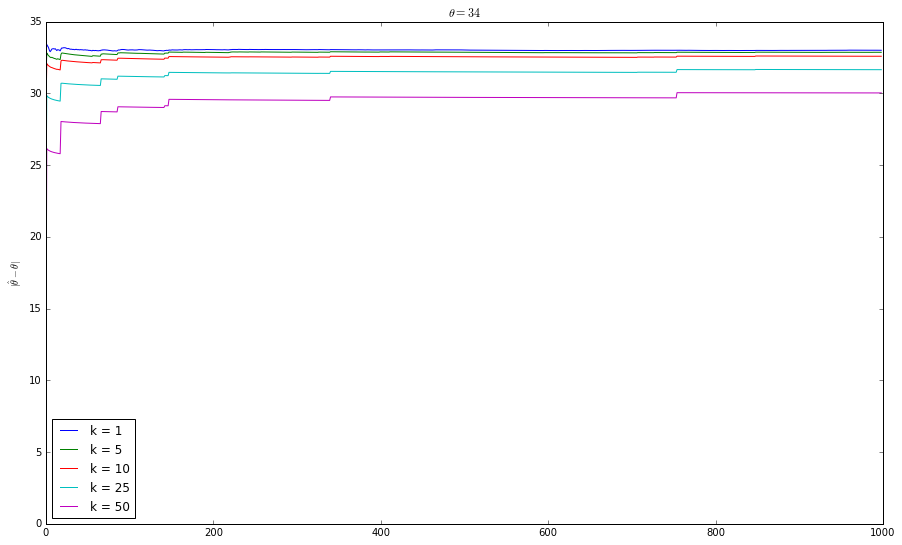

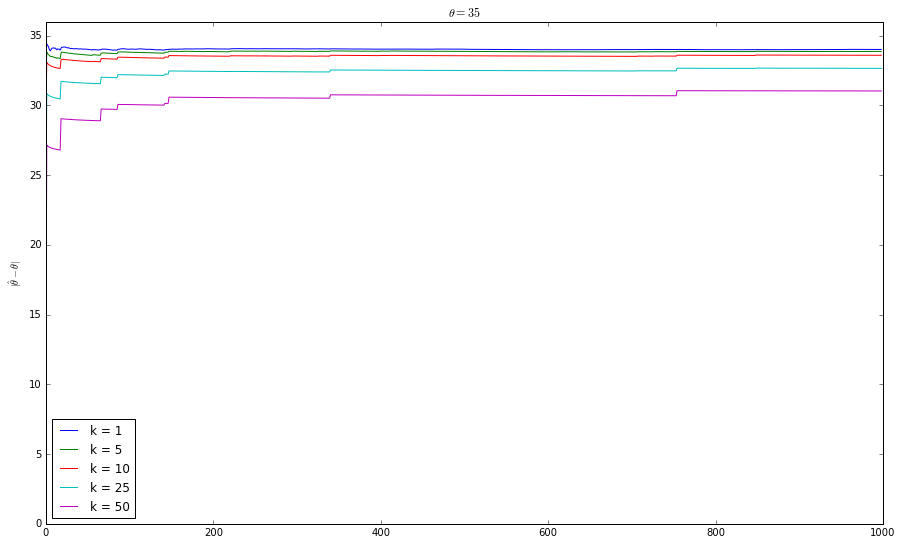

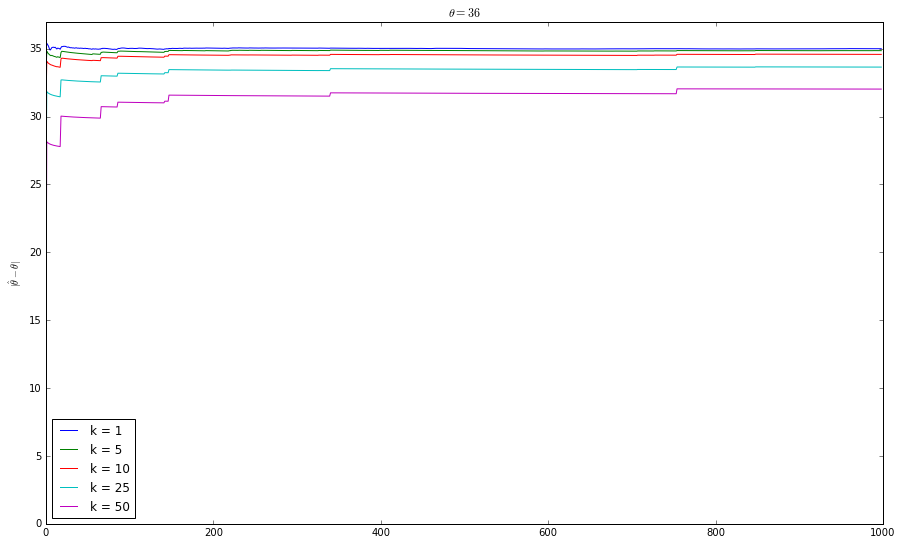

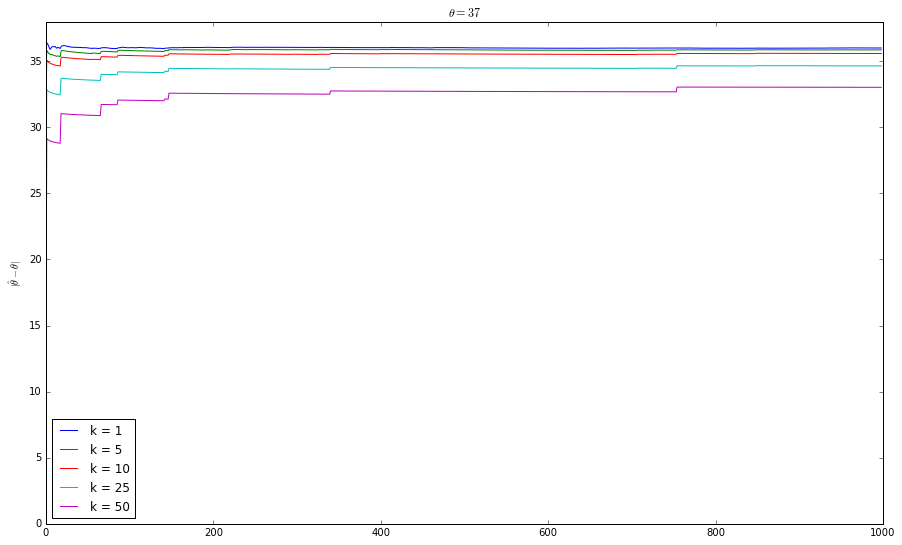

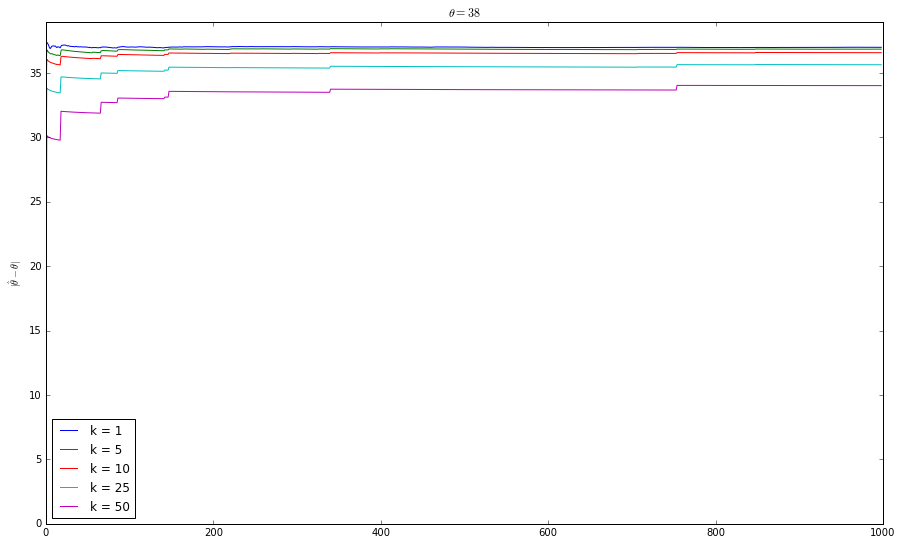

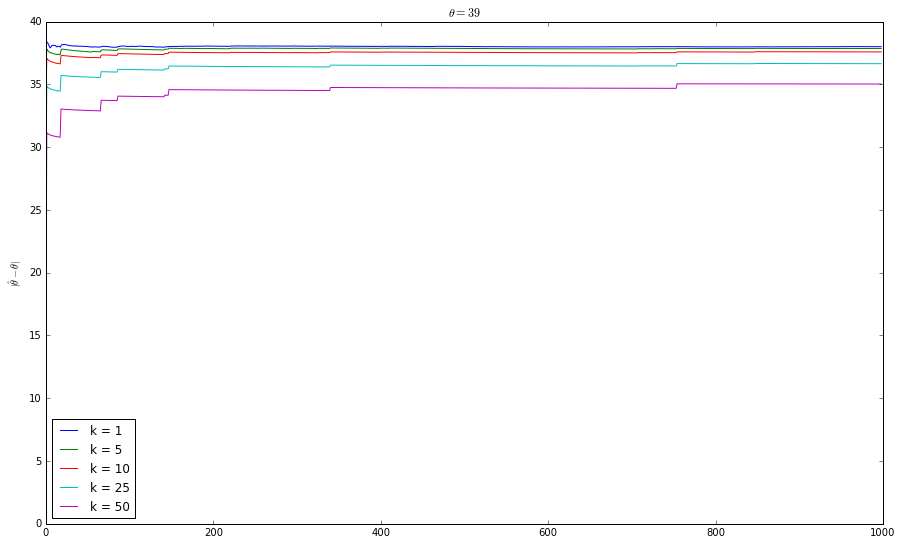

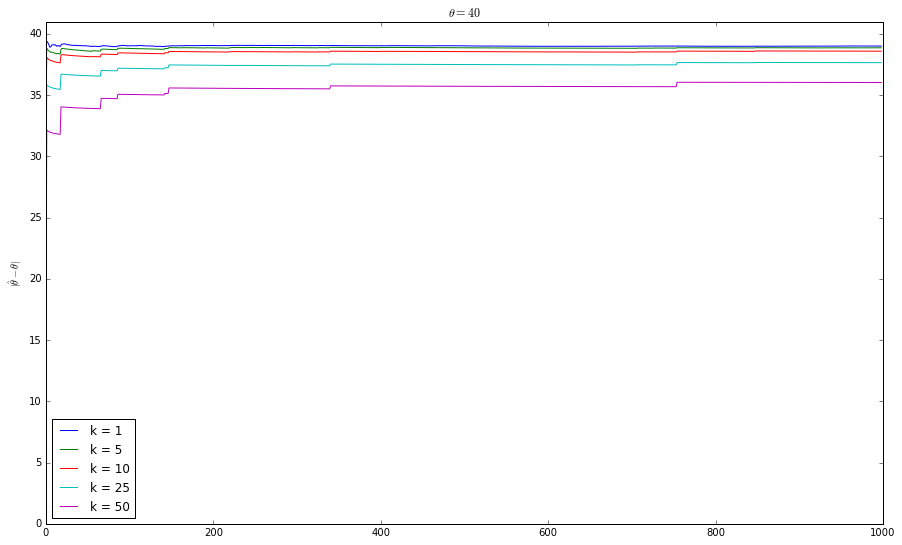

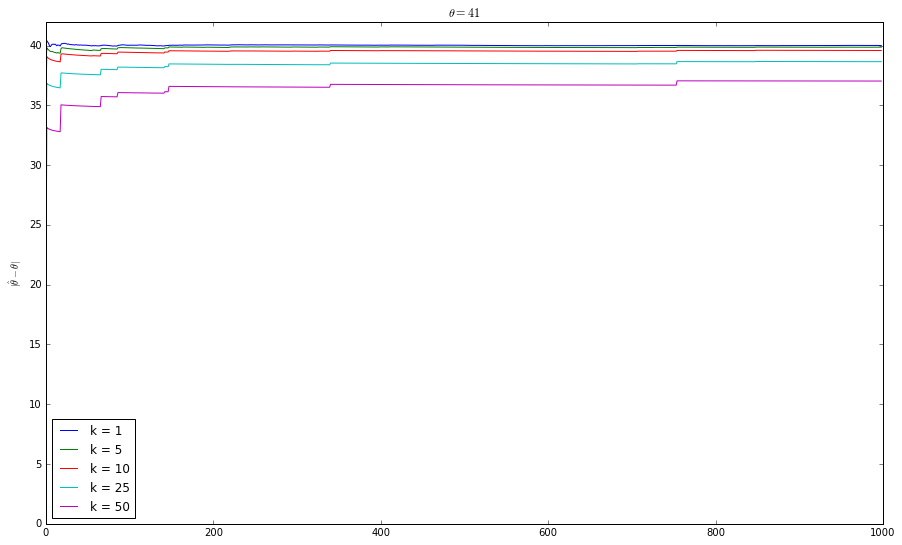

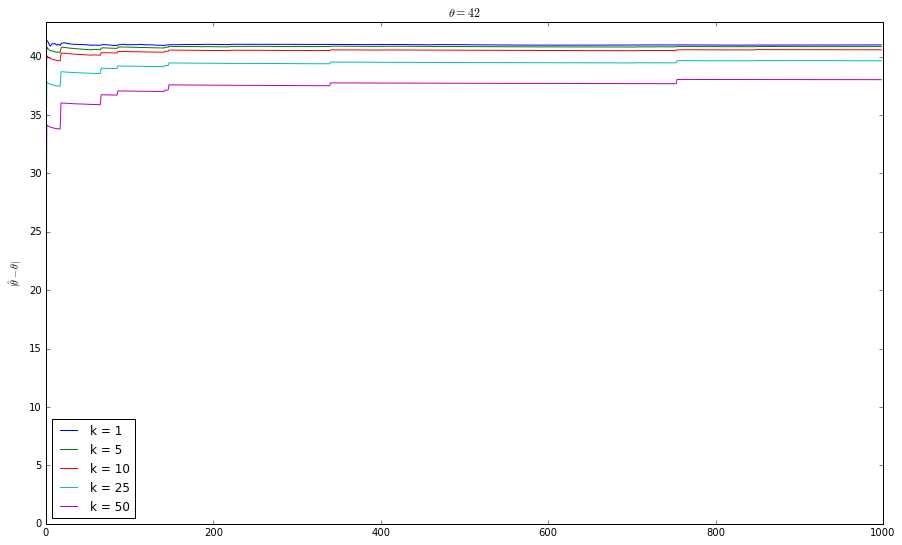

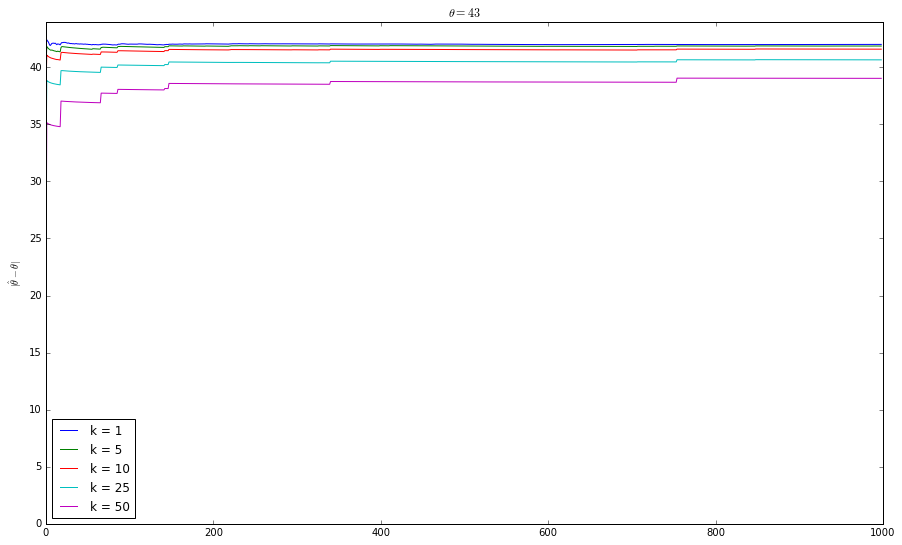

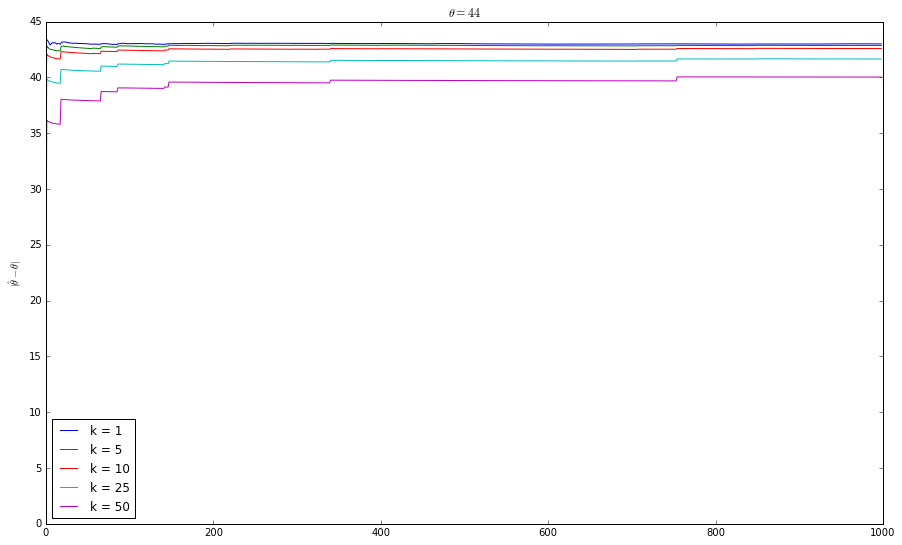

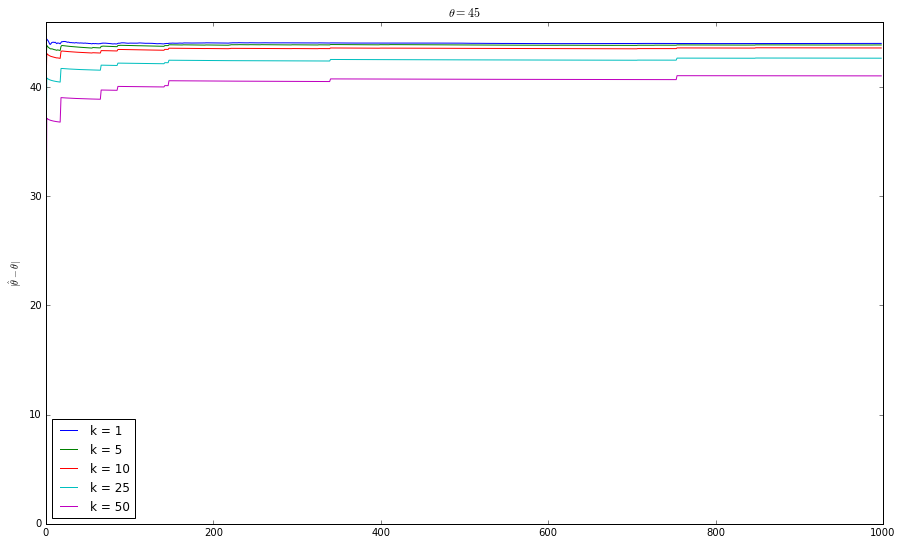

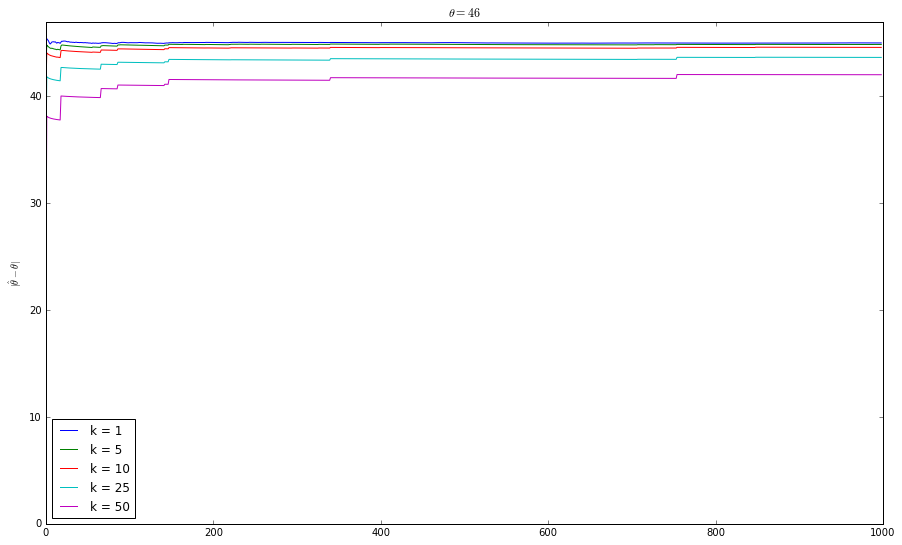

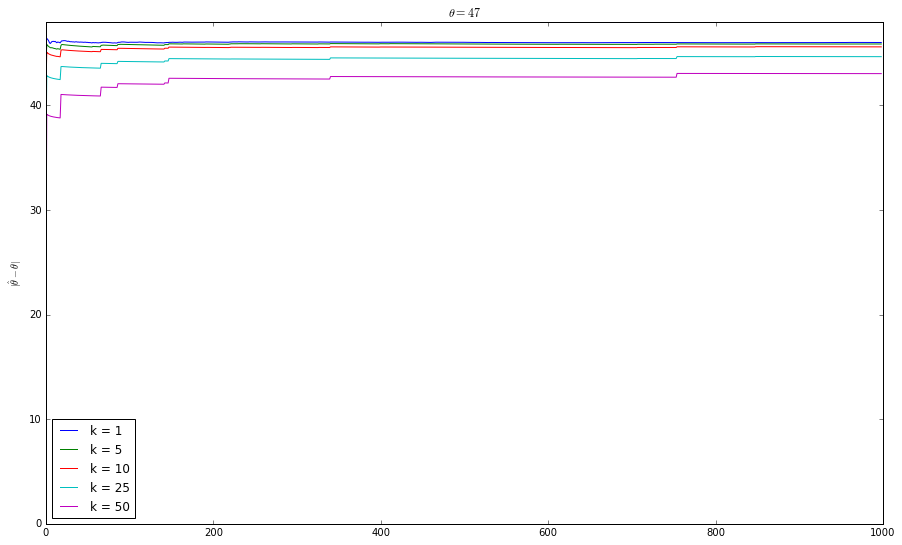

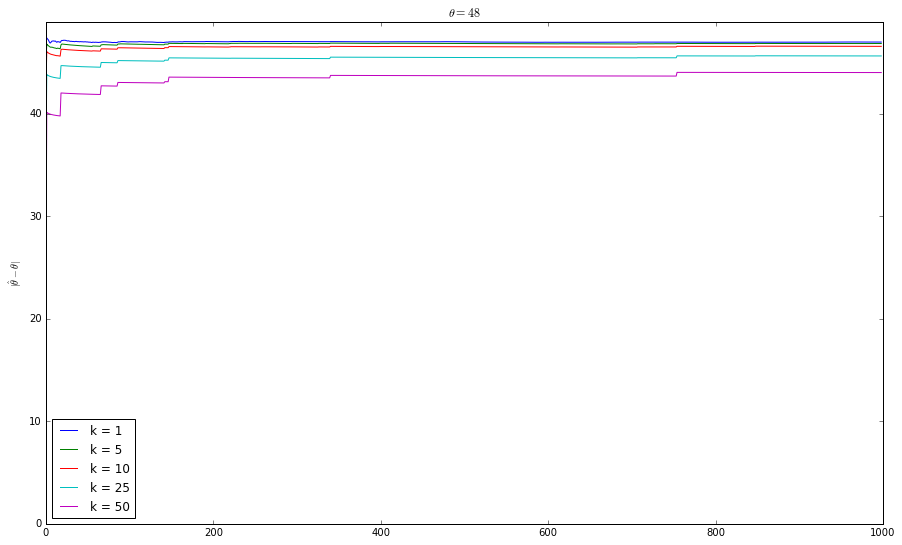

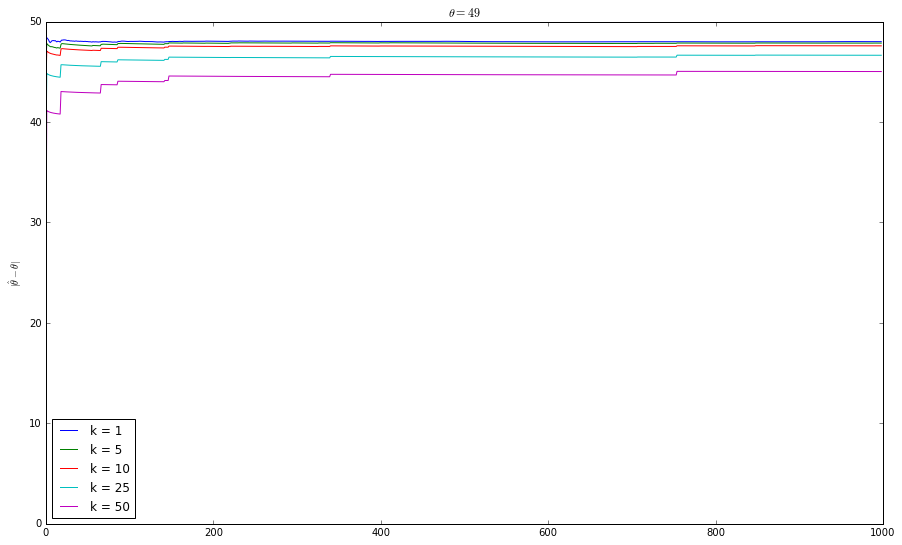

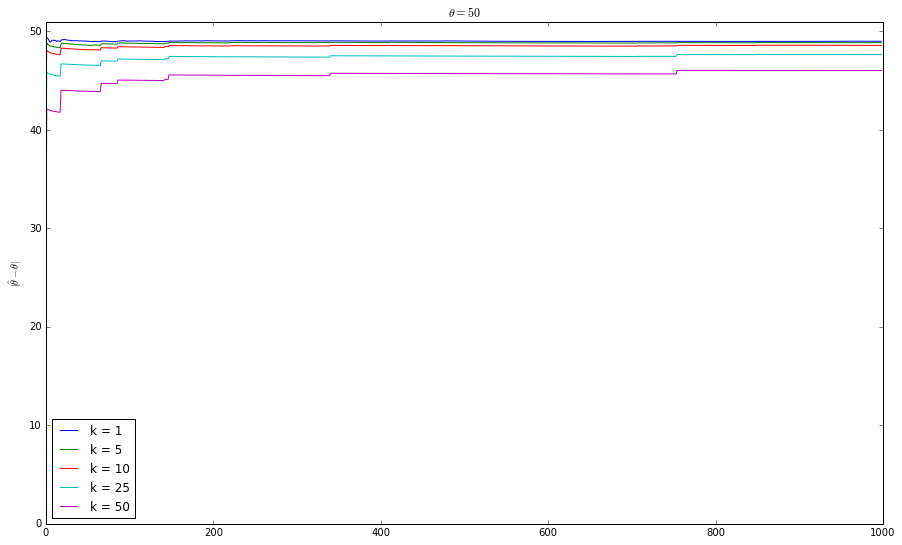

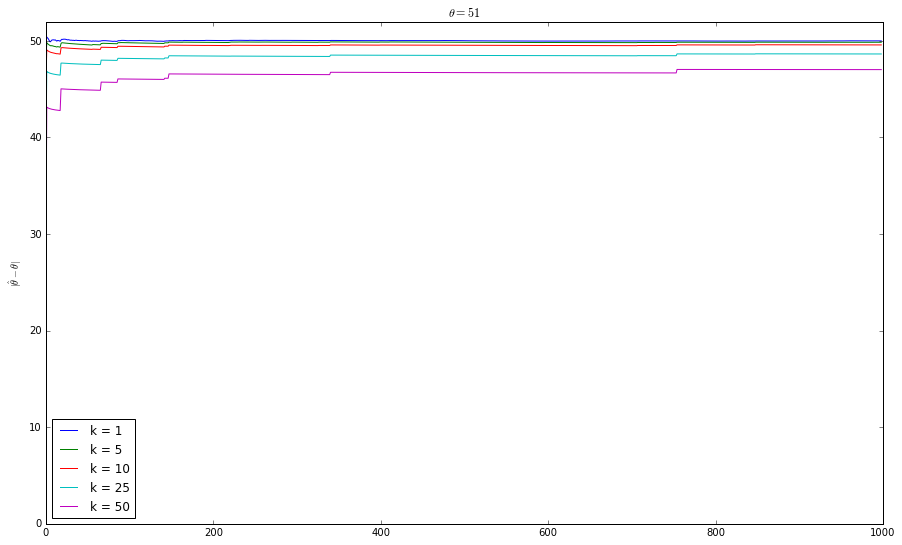

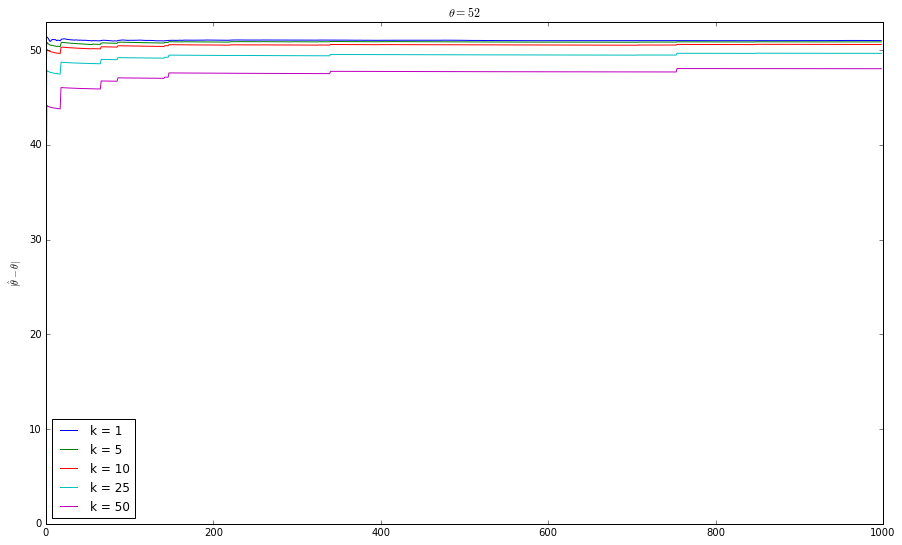

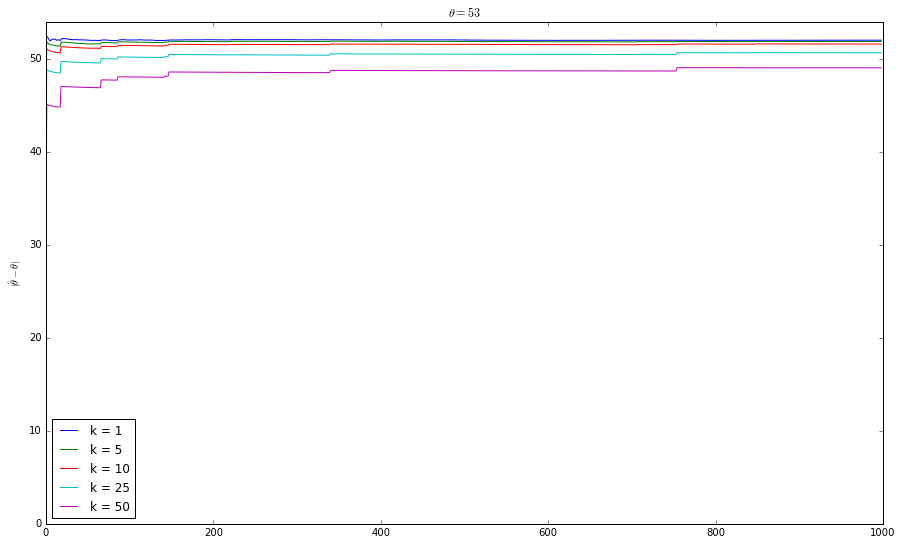

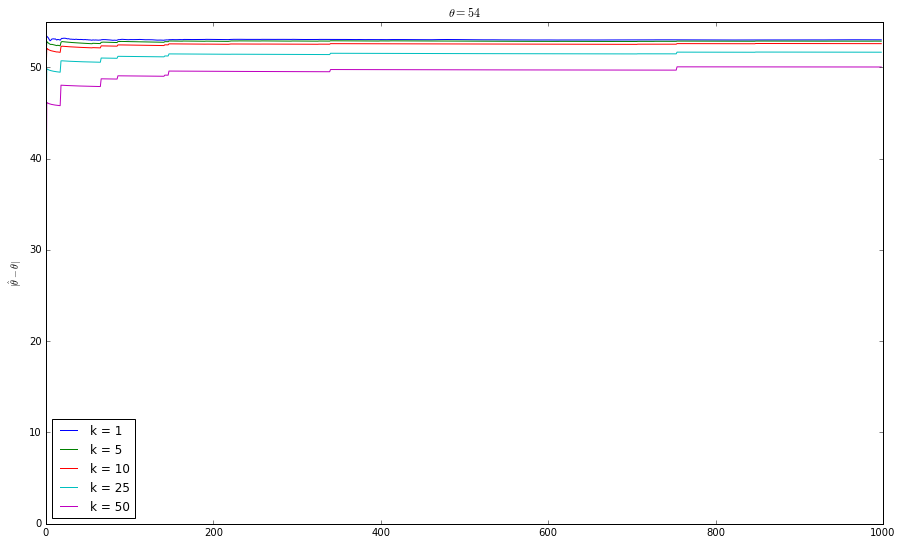

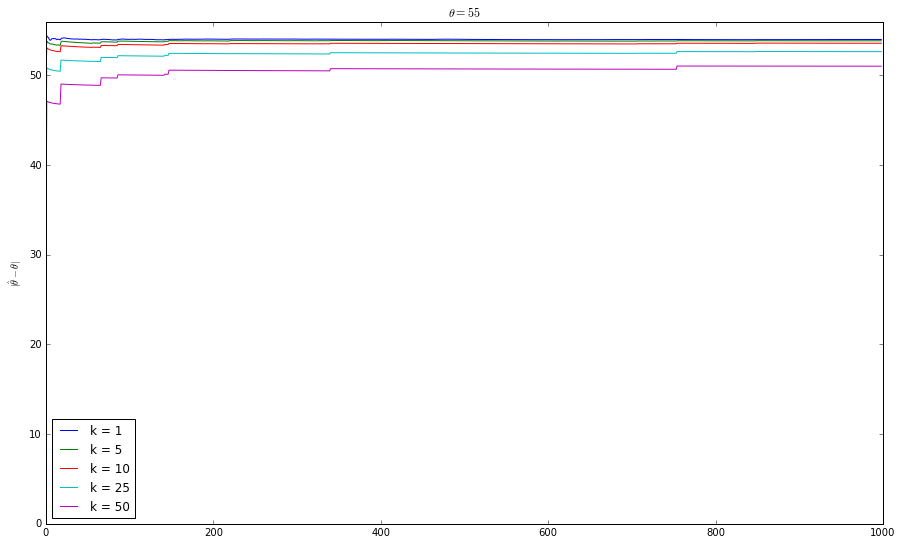

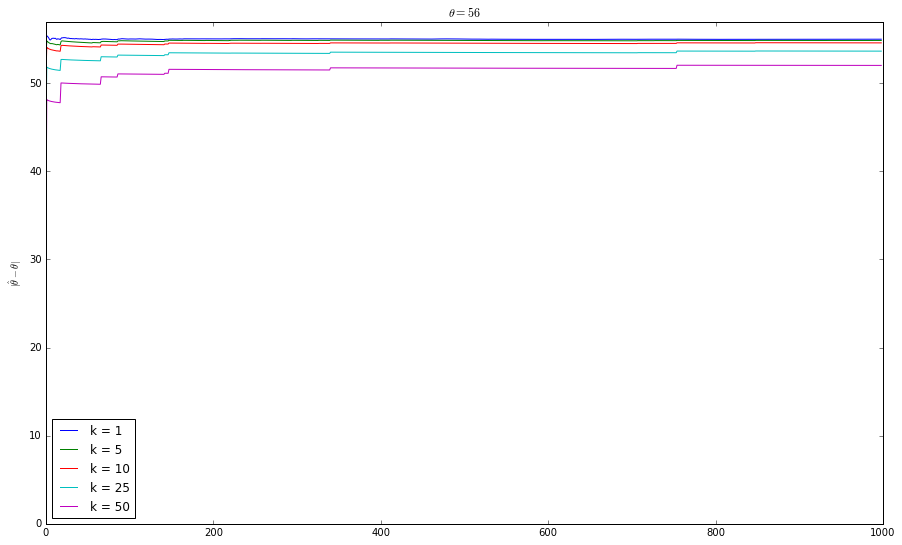

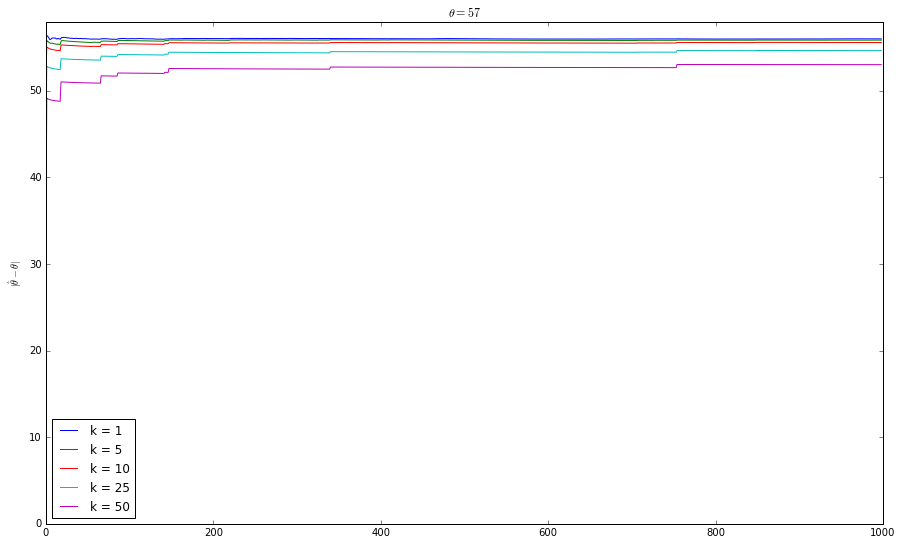

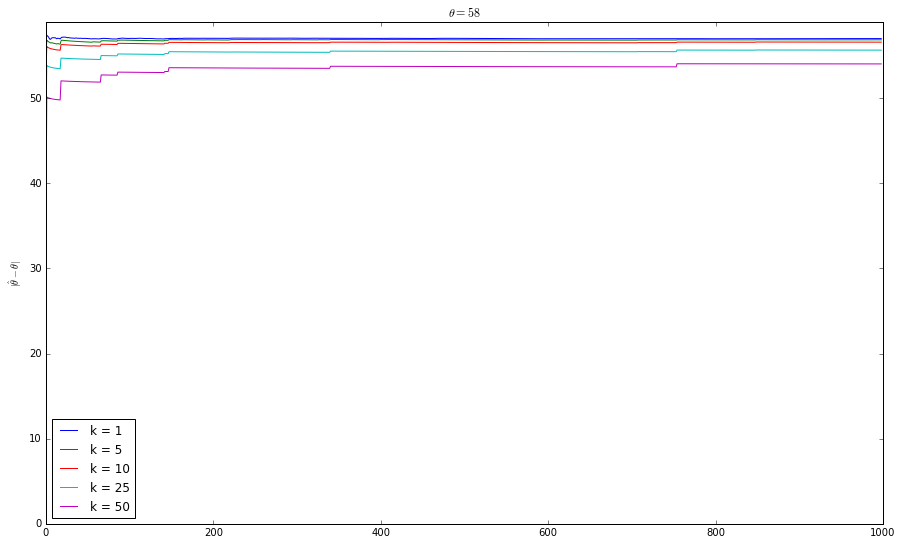

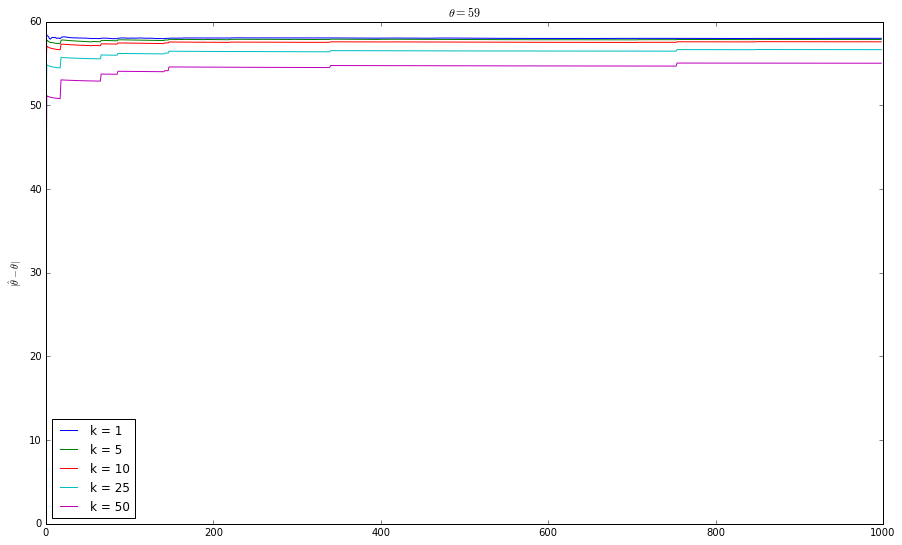

In [54]:
for th in range(31, 60):
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)

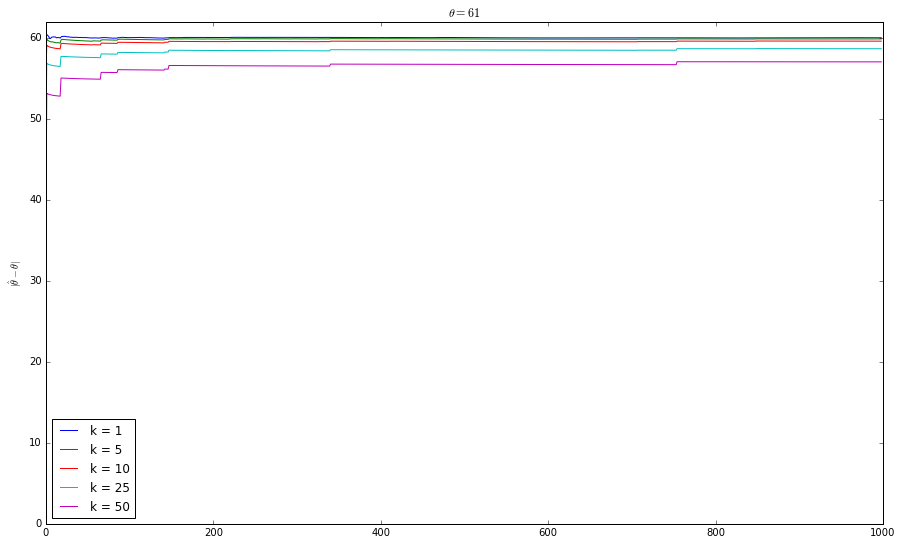

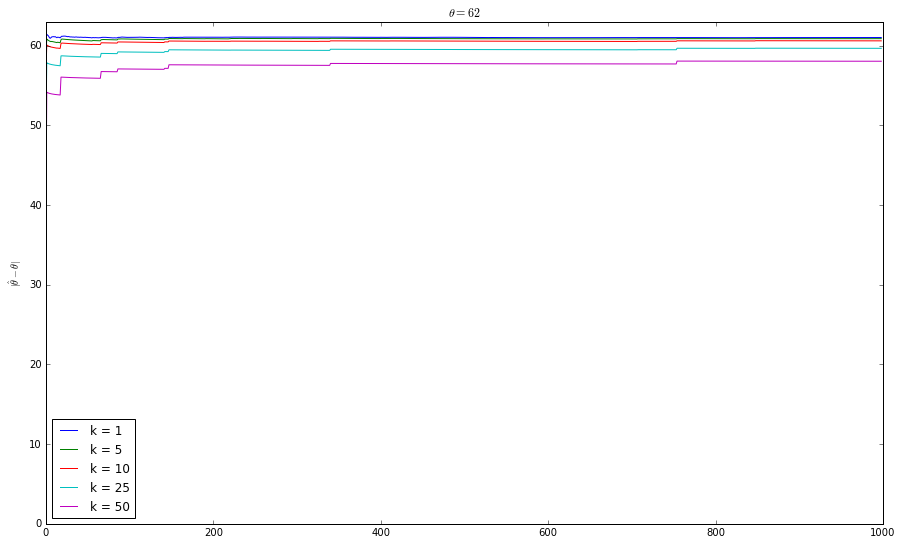

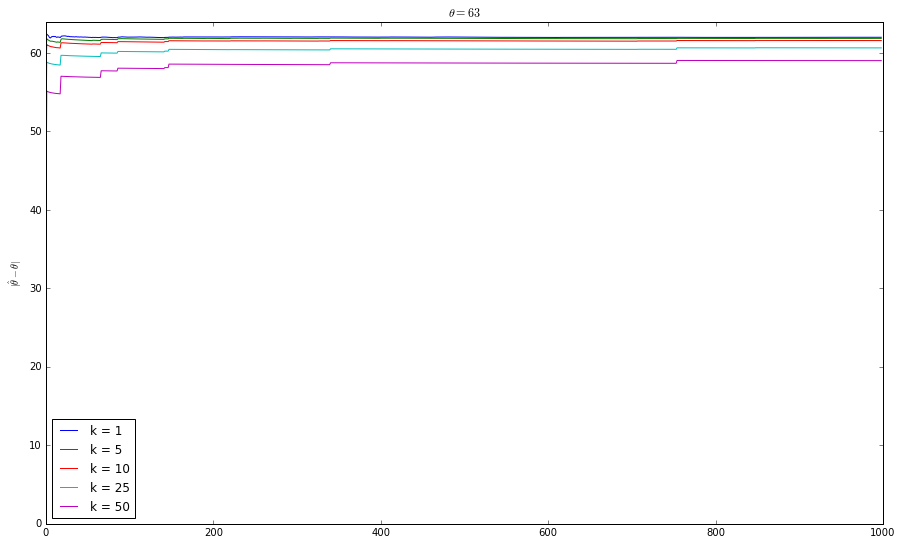

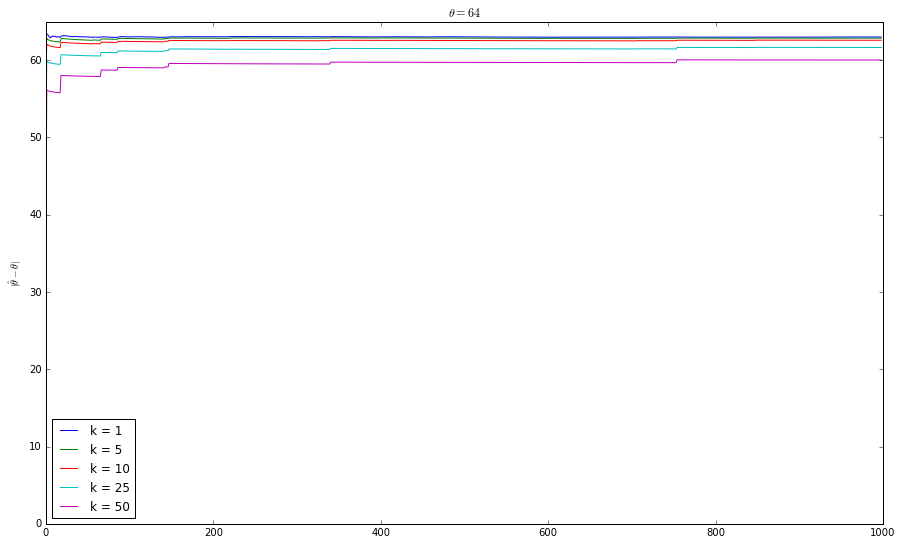

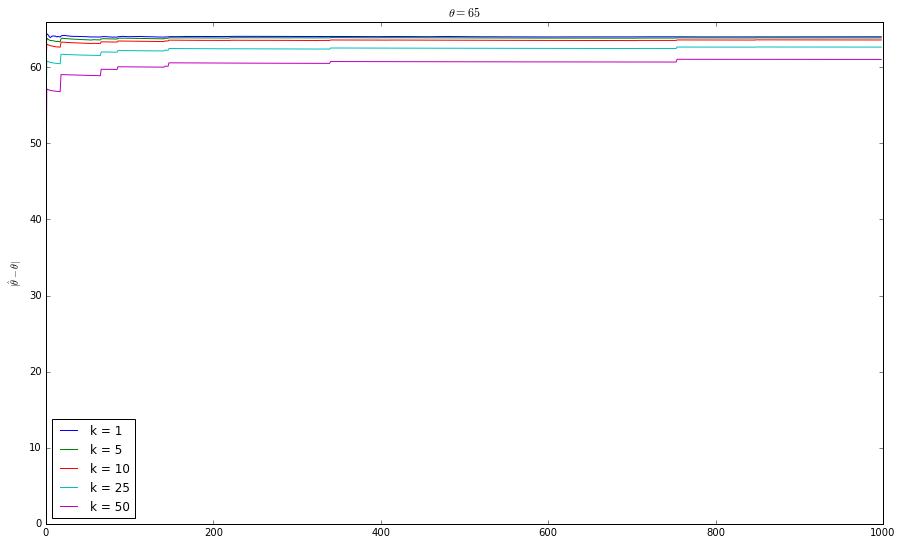

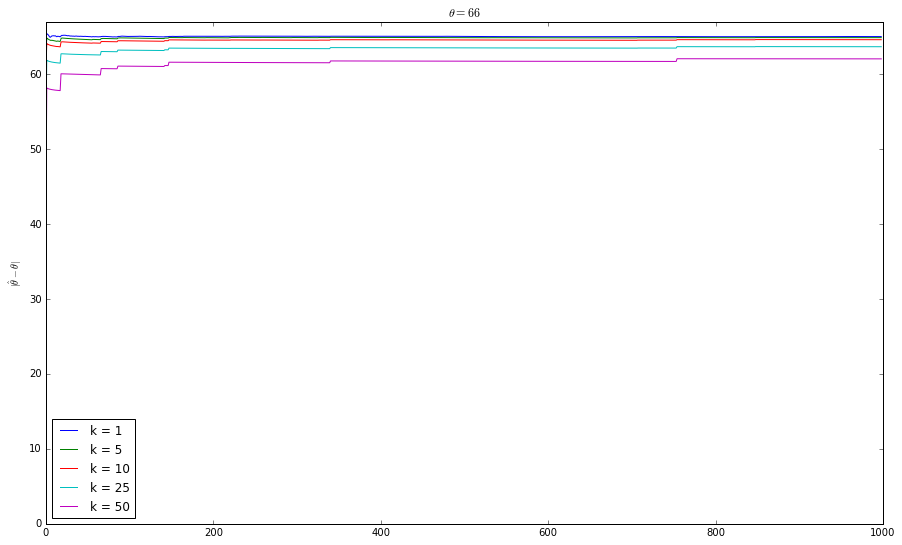

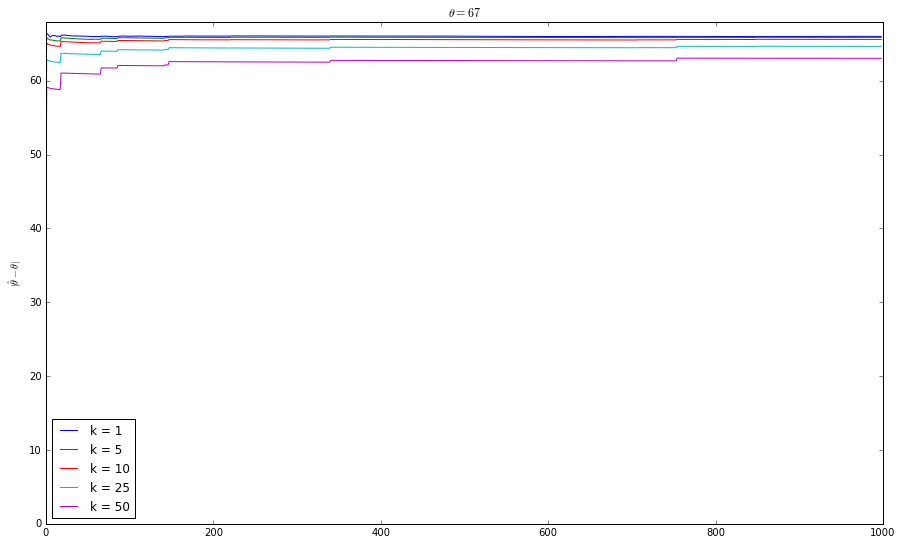

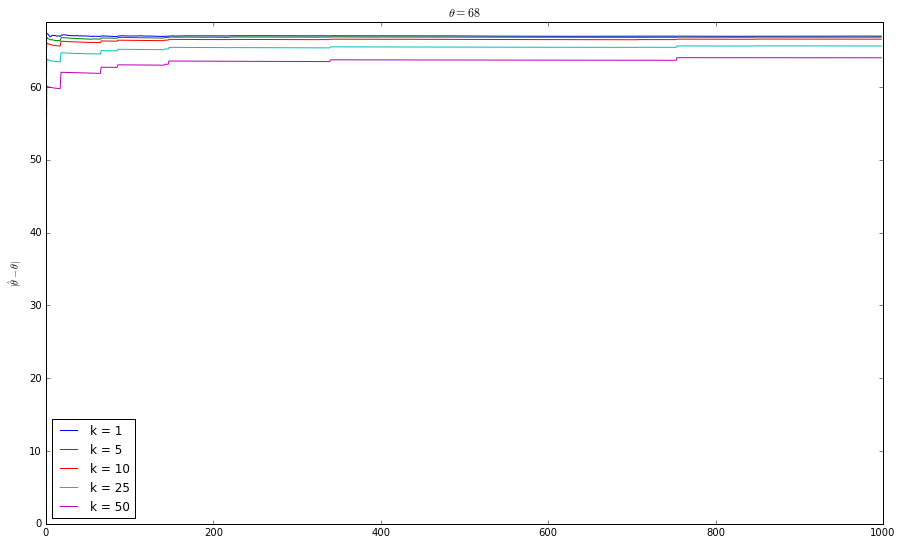

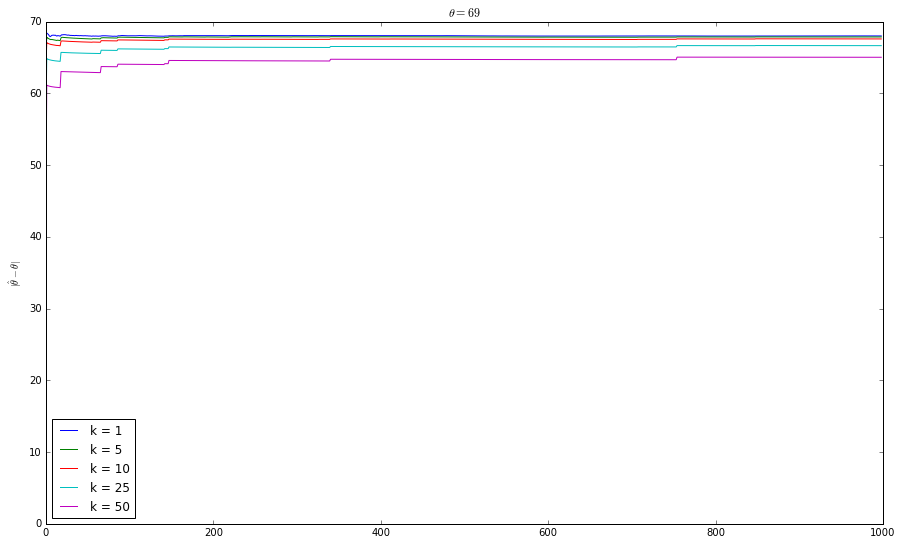

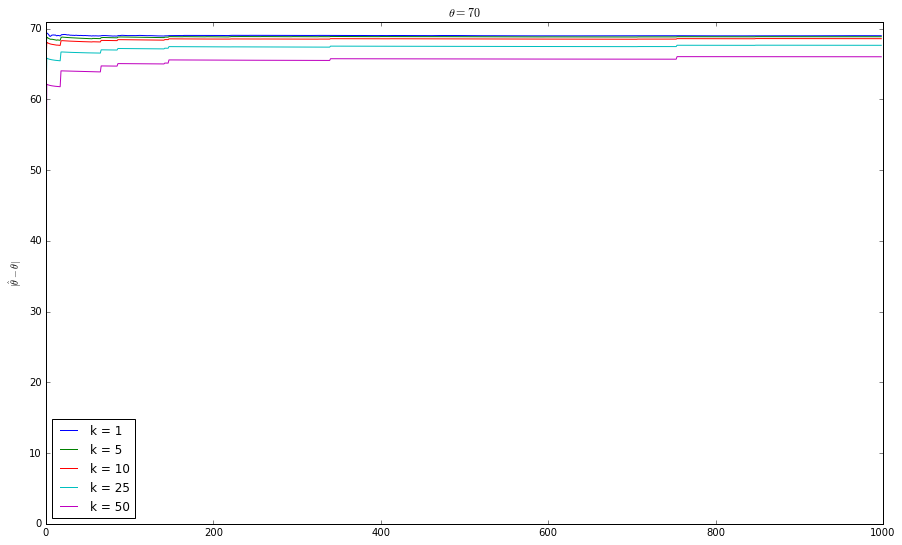

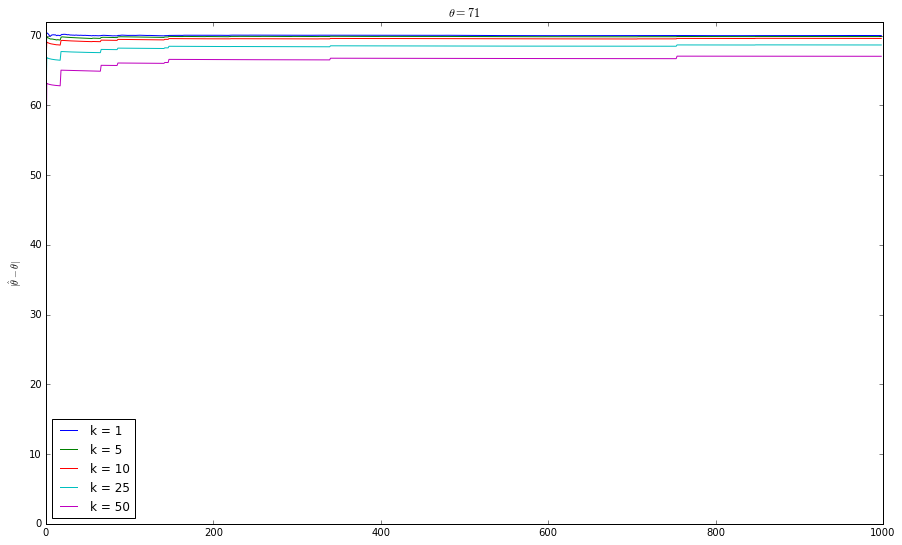

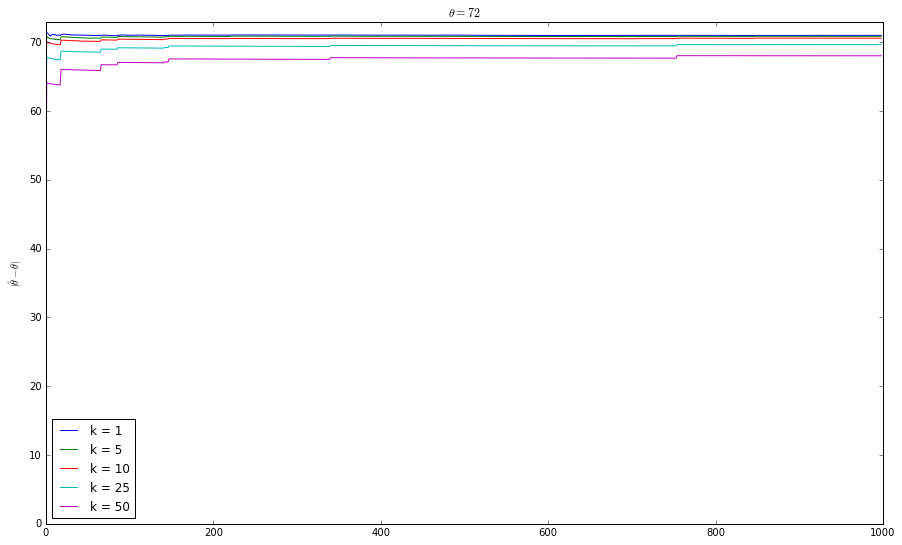

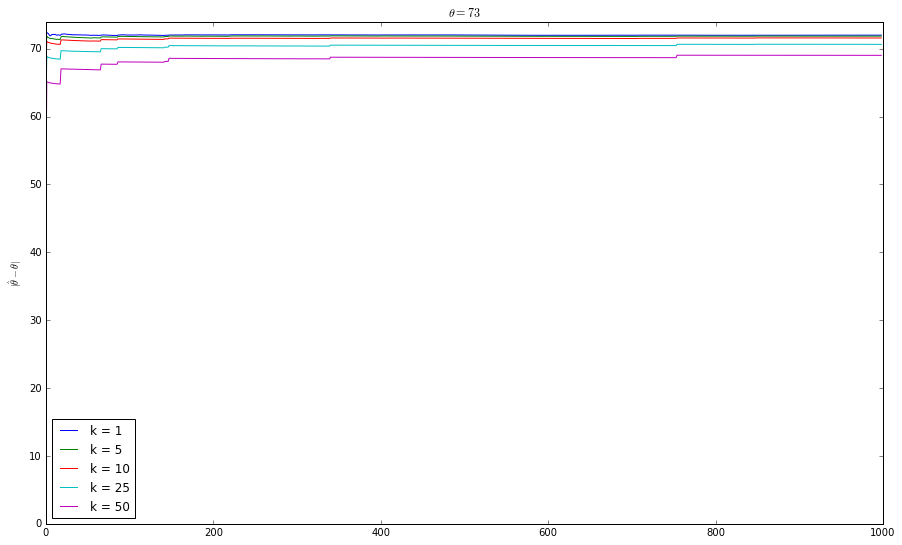

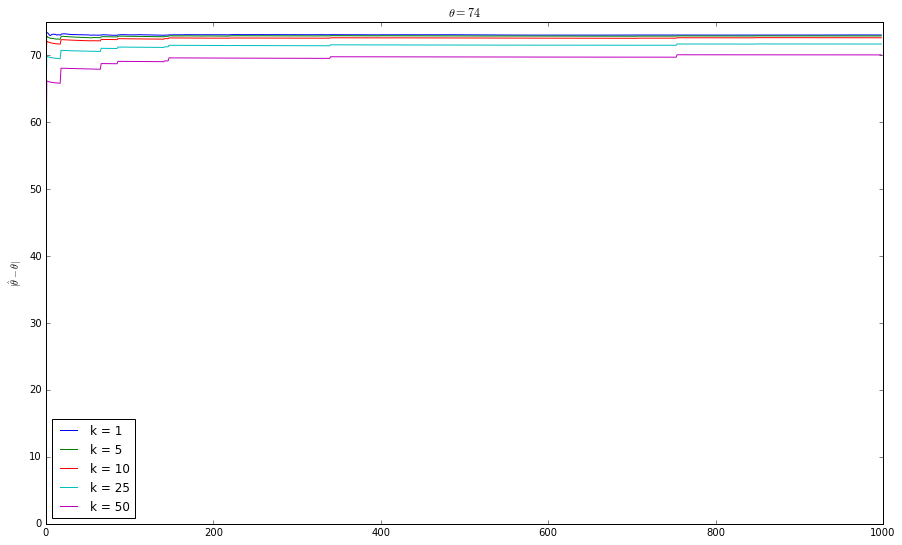

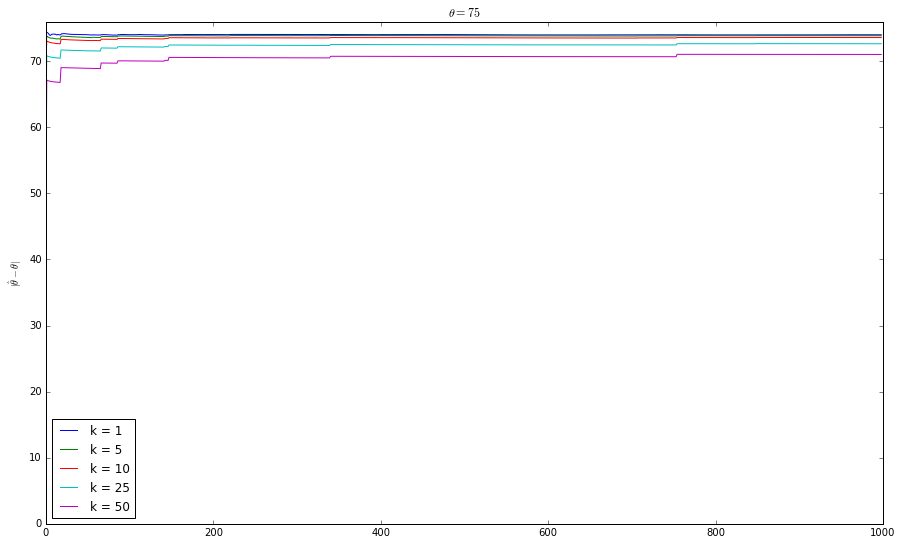

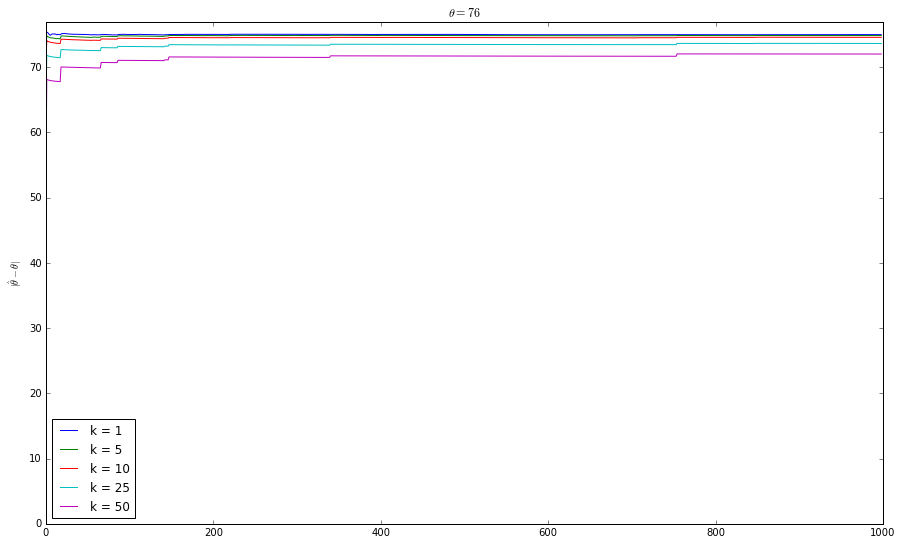

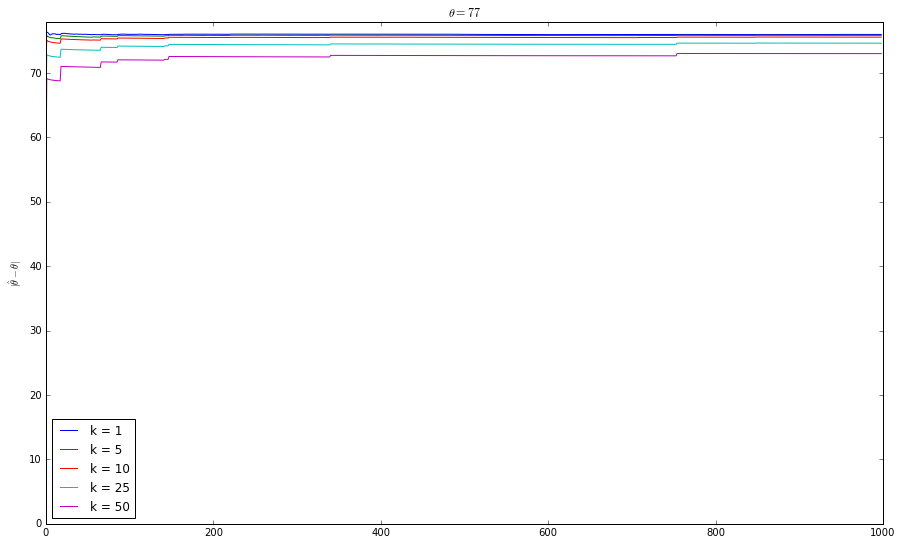

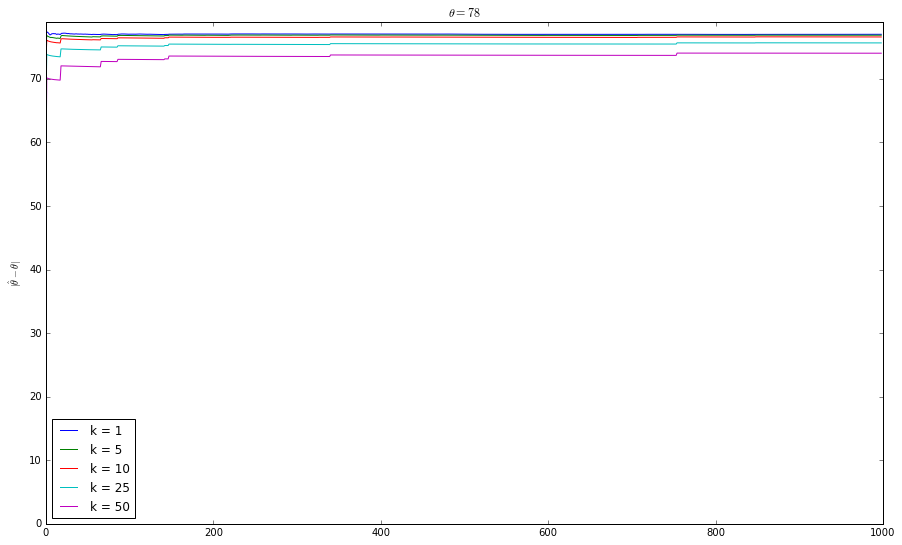

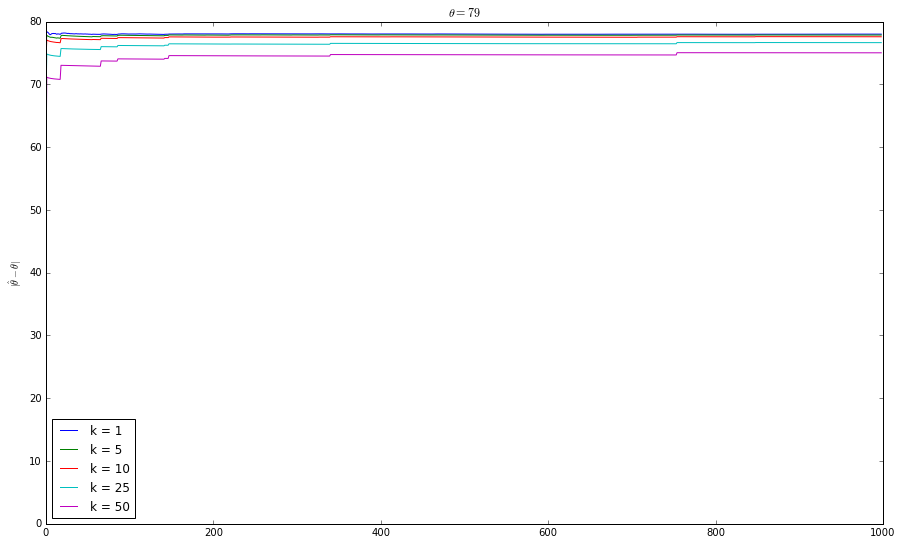

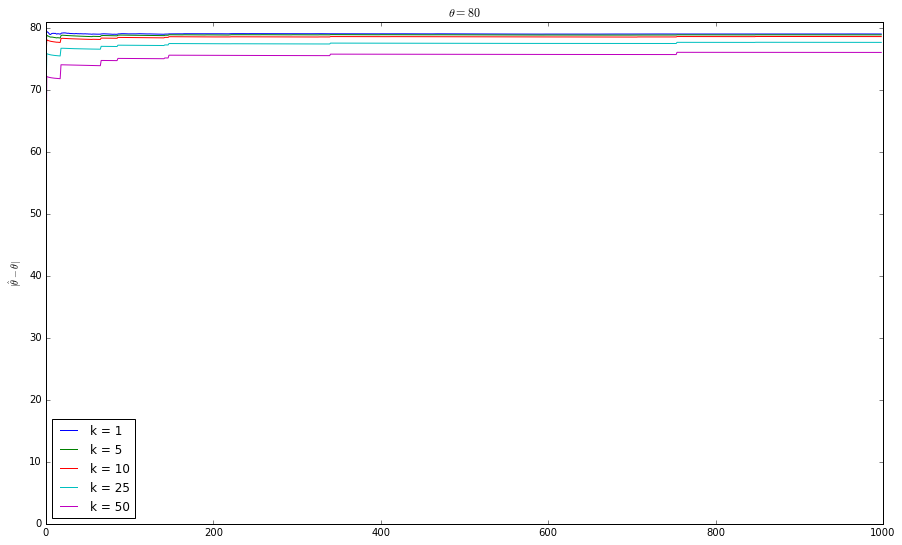

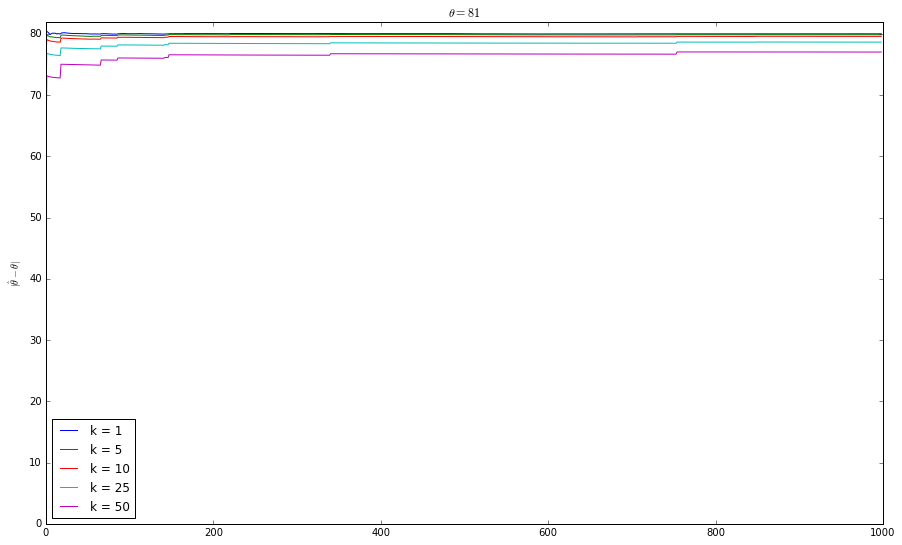

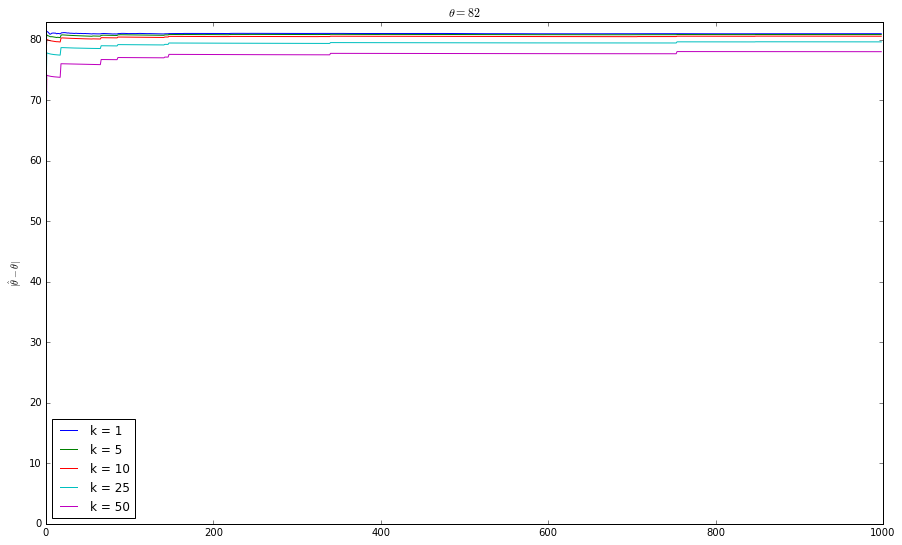

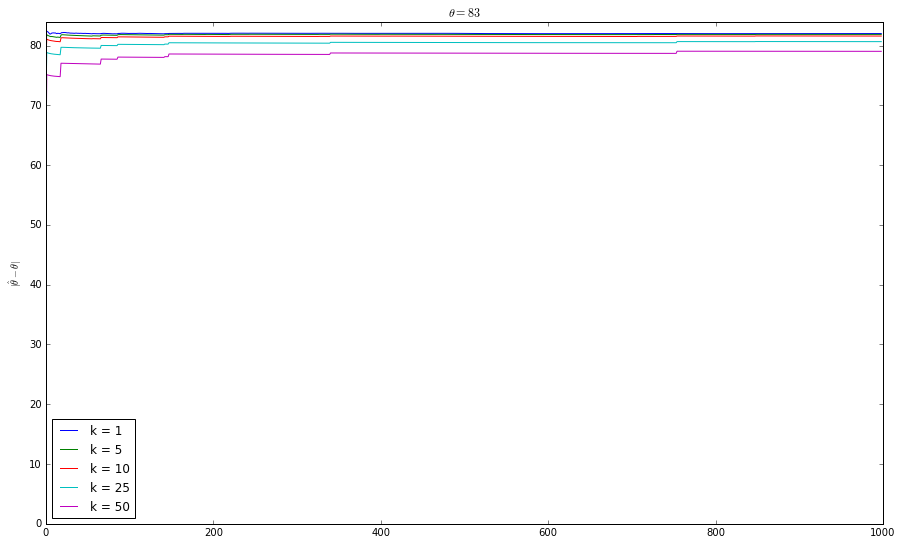

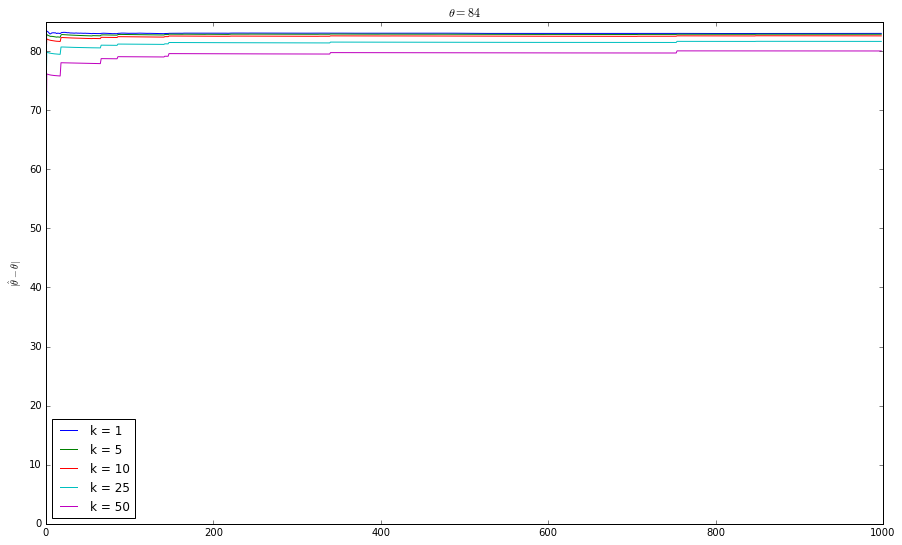

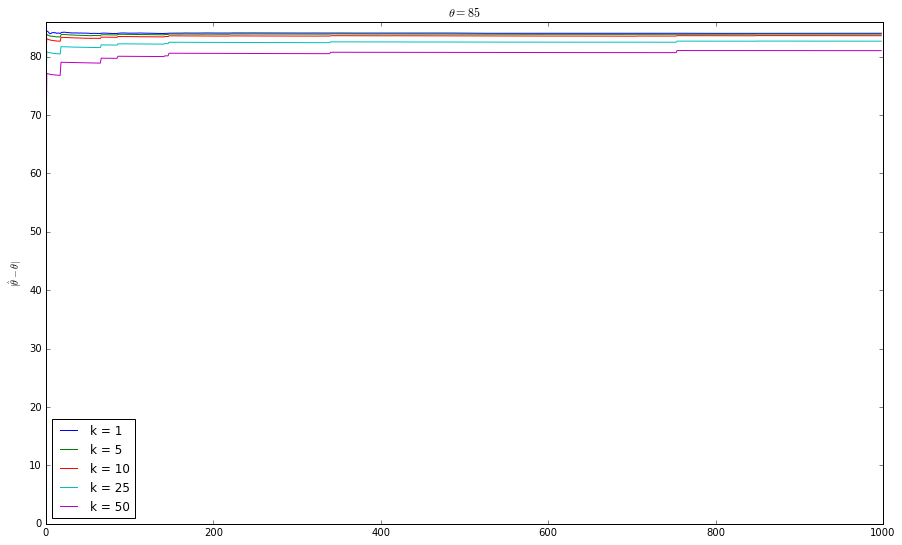

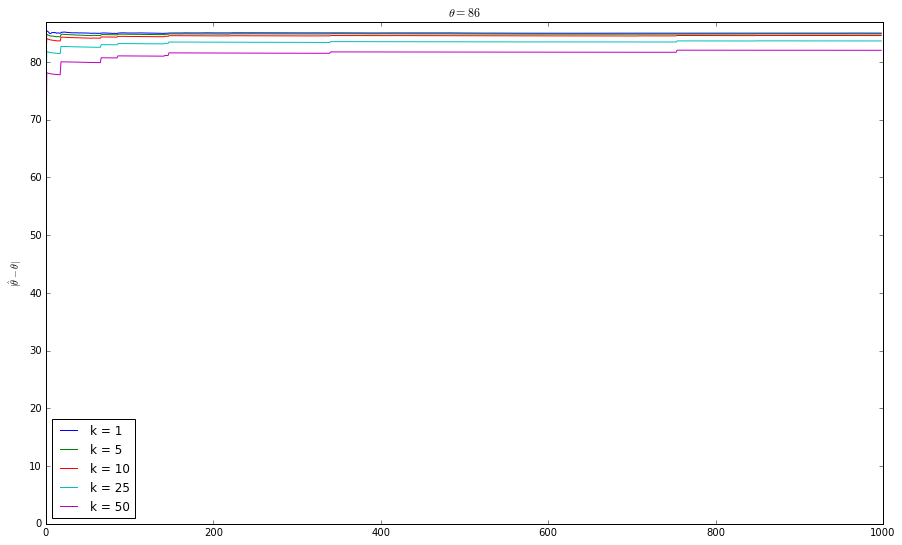

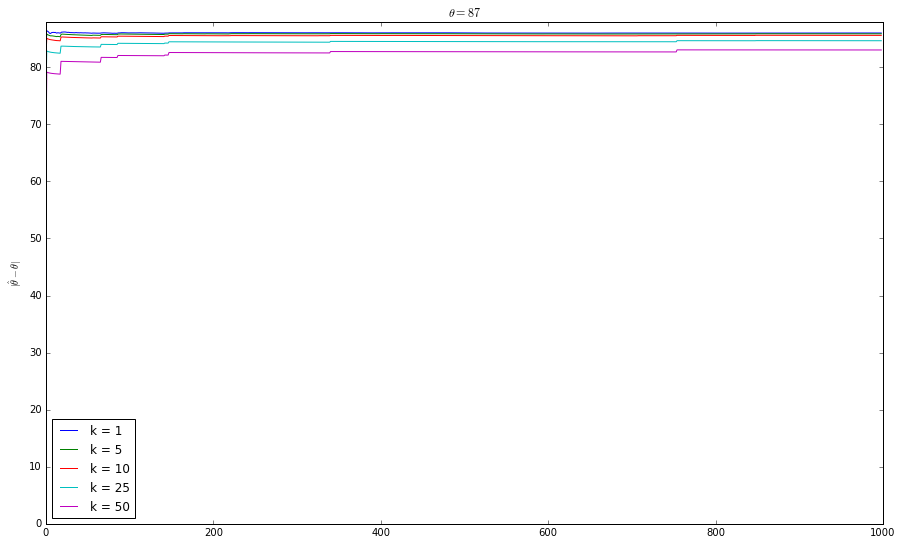

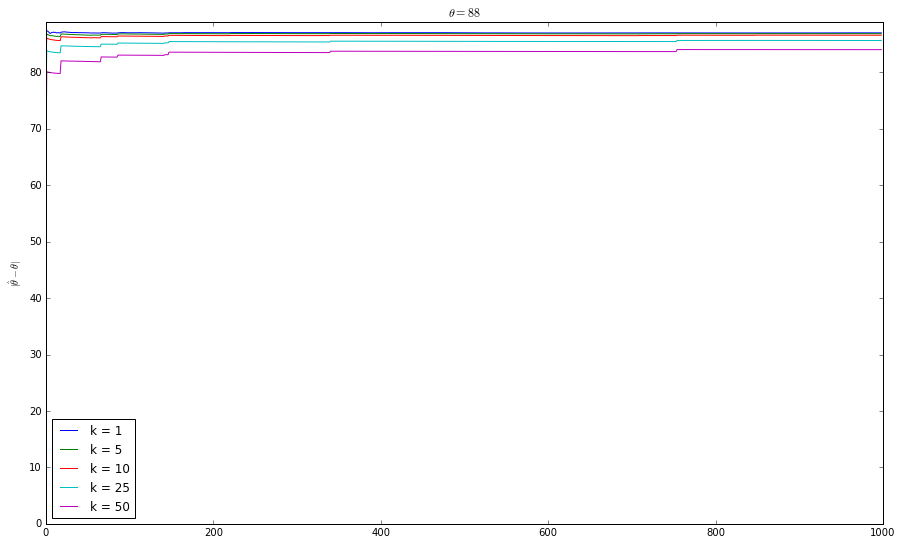

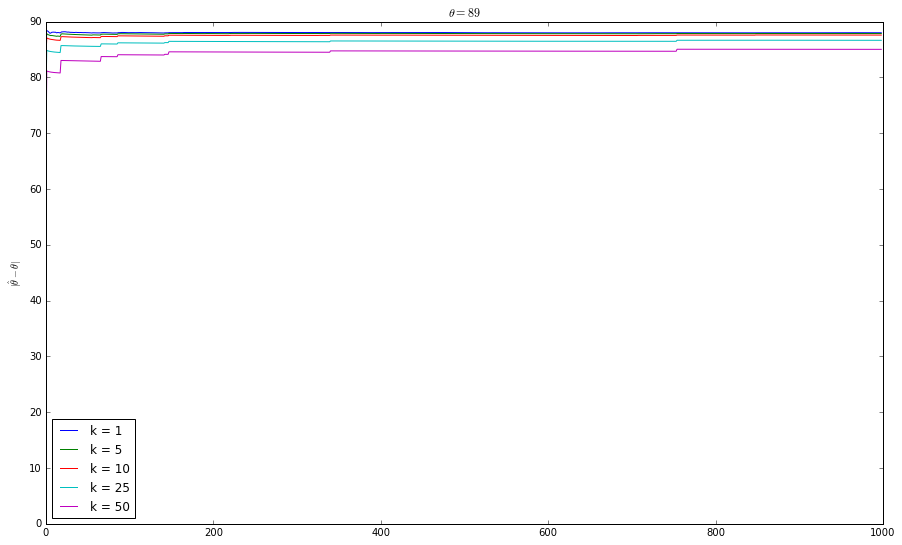

In [55]:
for th in range(61, 90):
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)

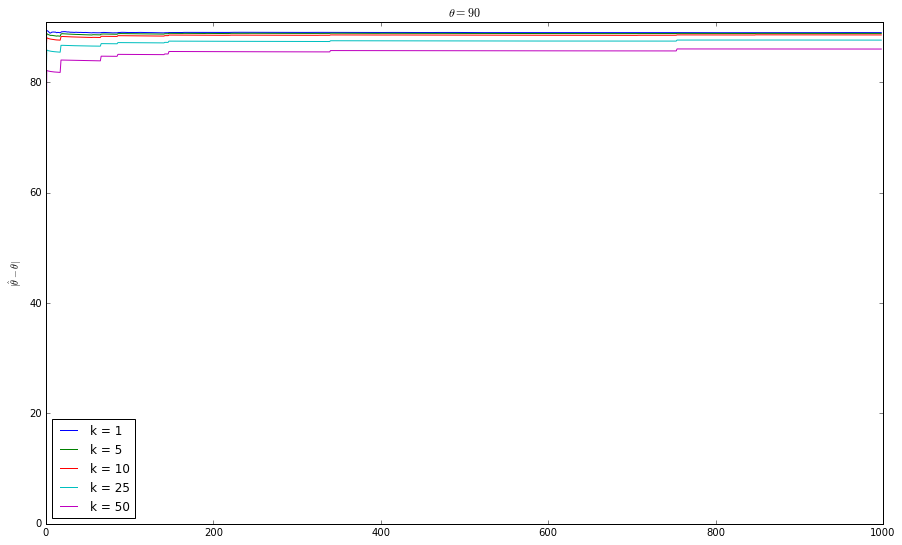

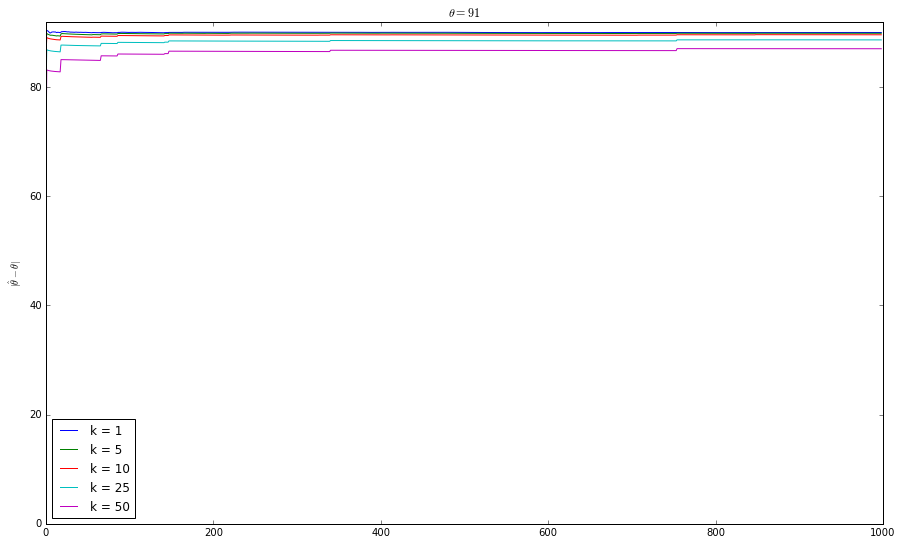

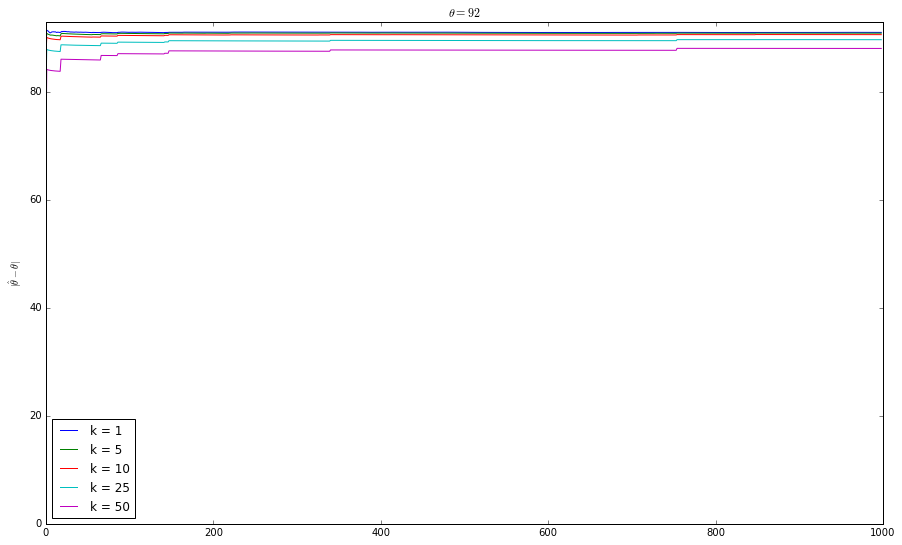

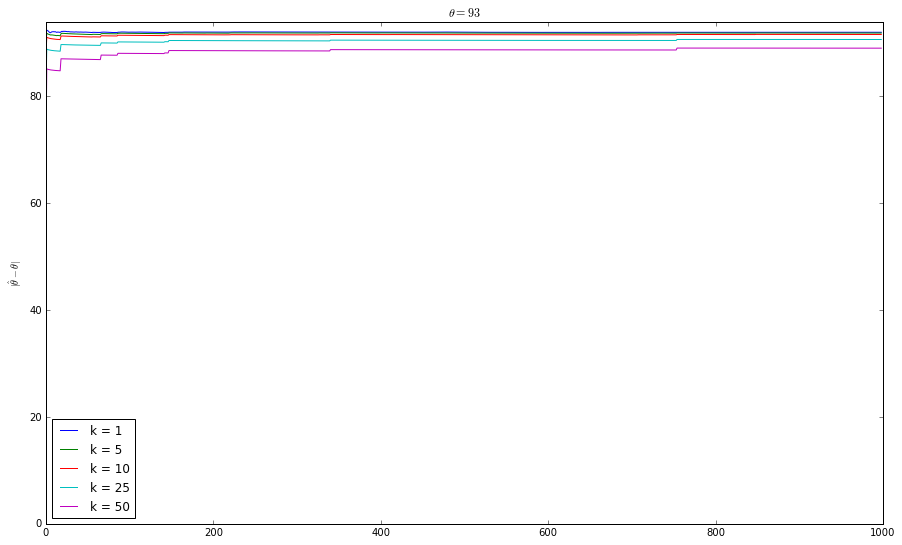

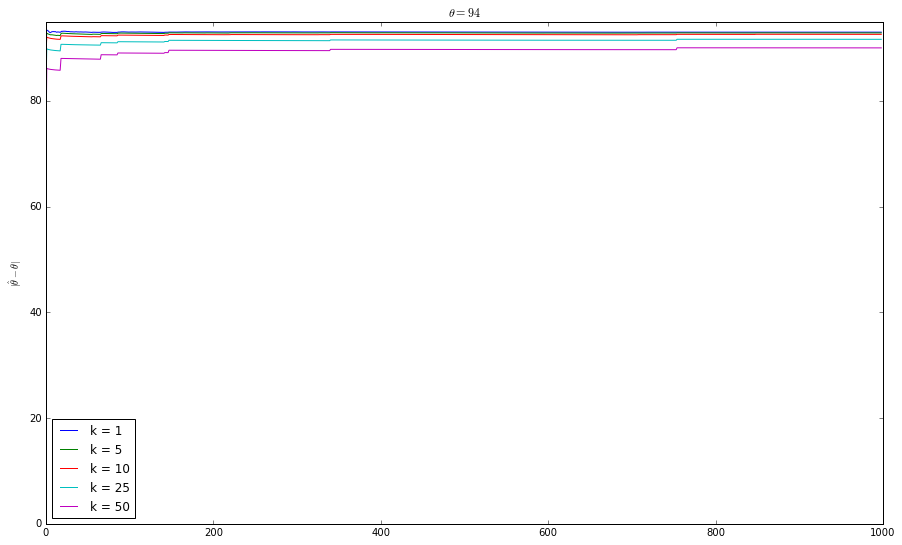

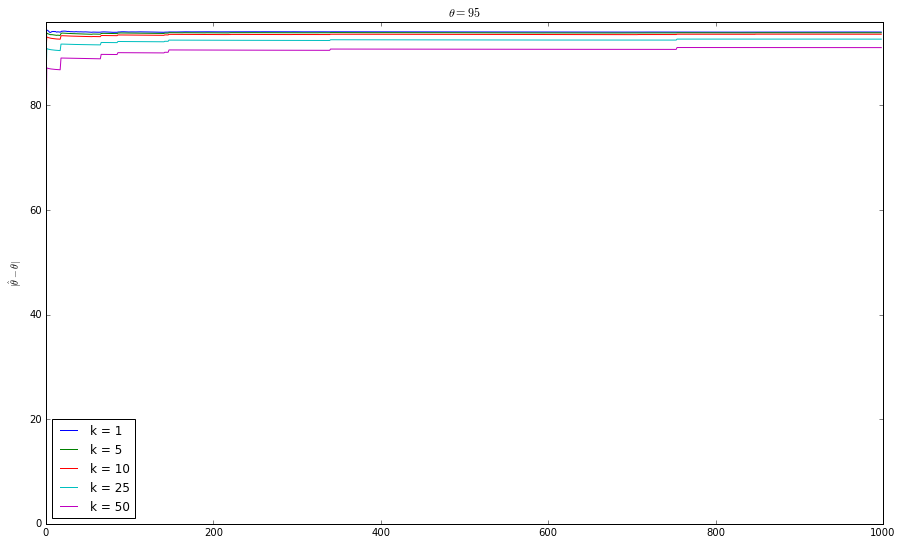

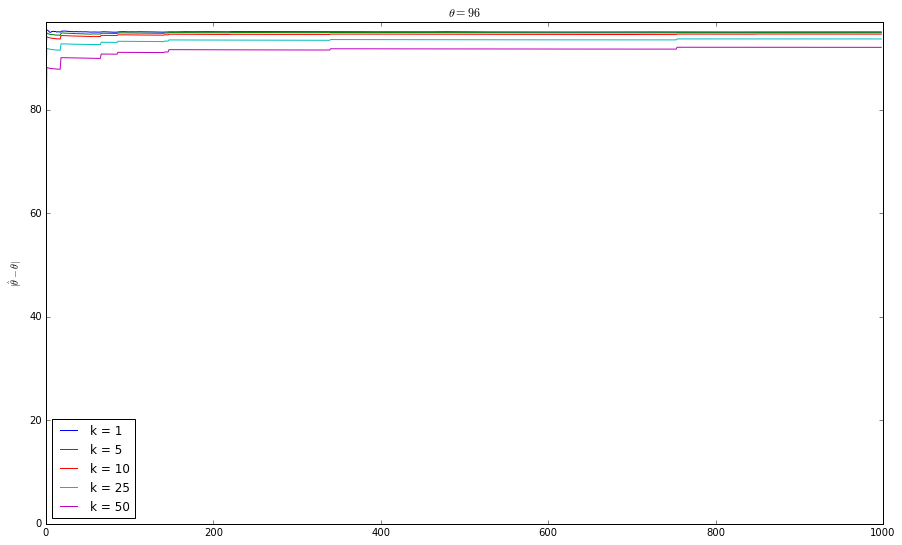

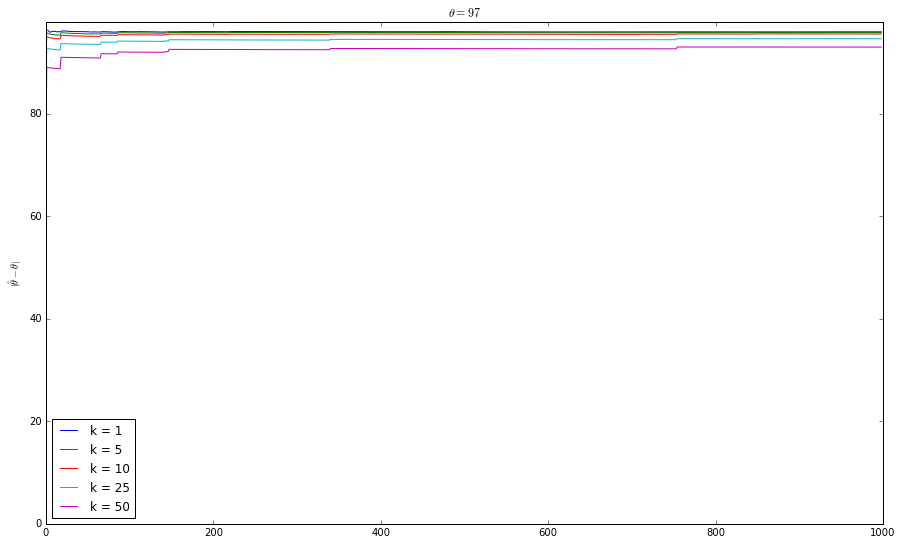

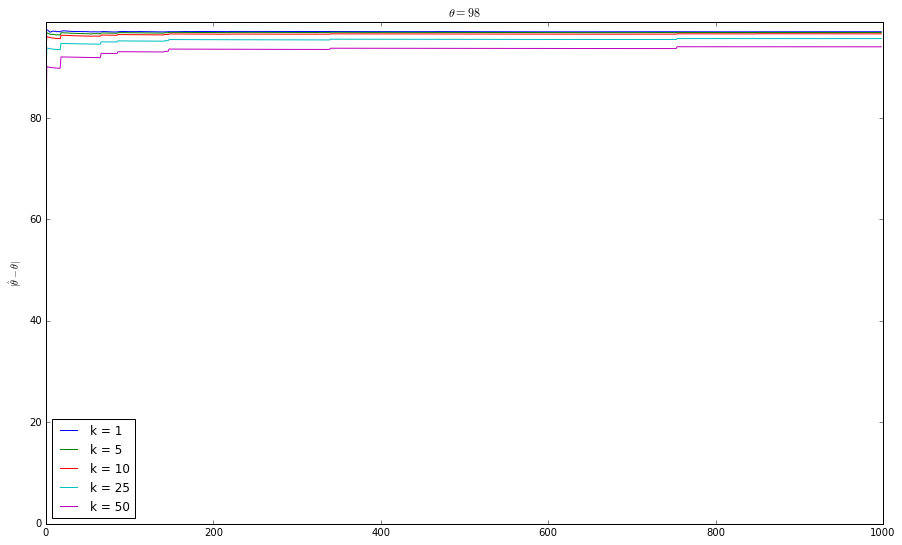

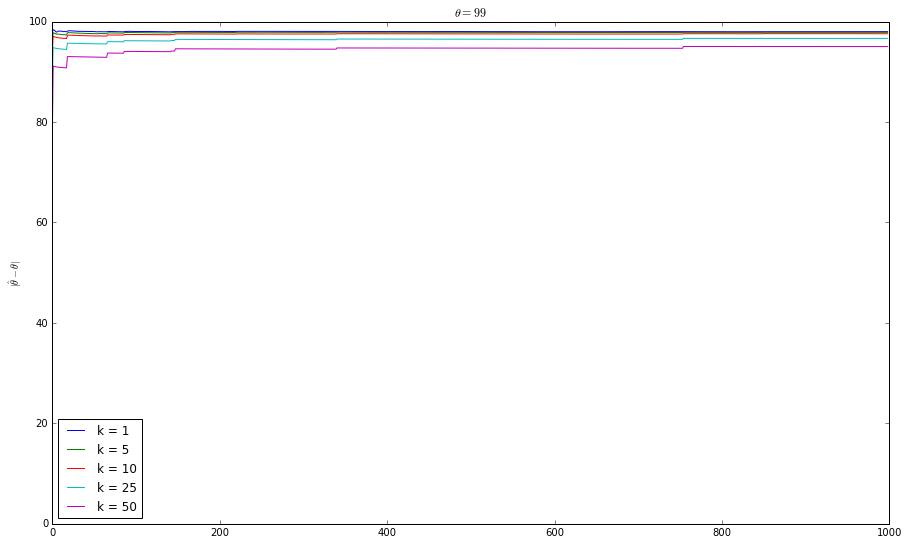

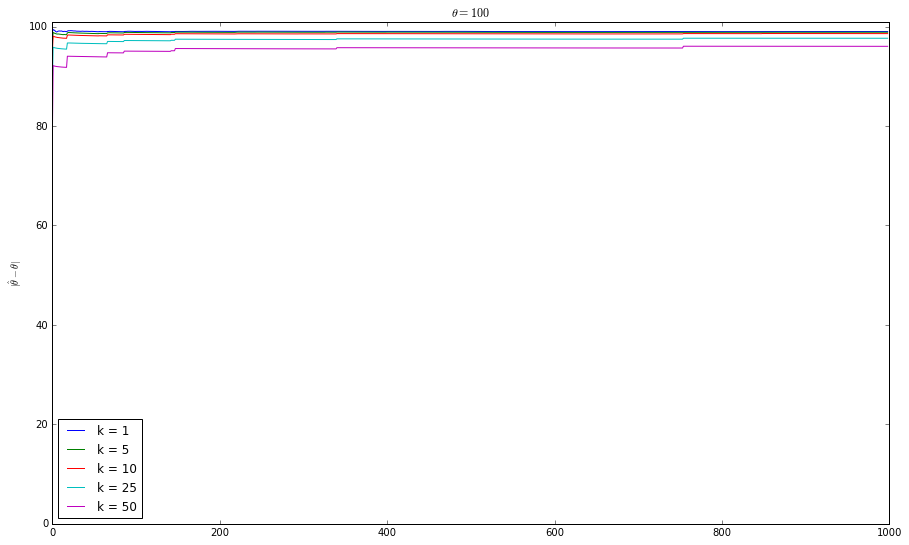

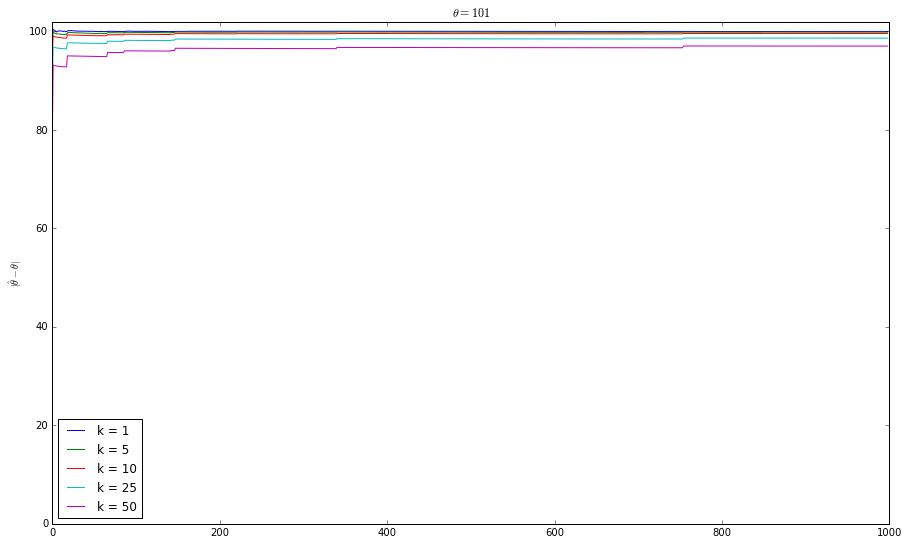

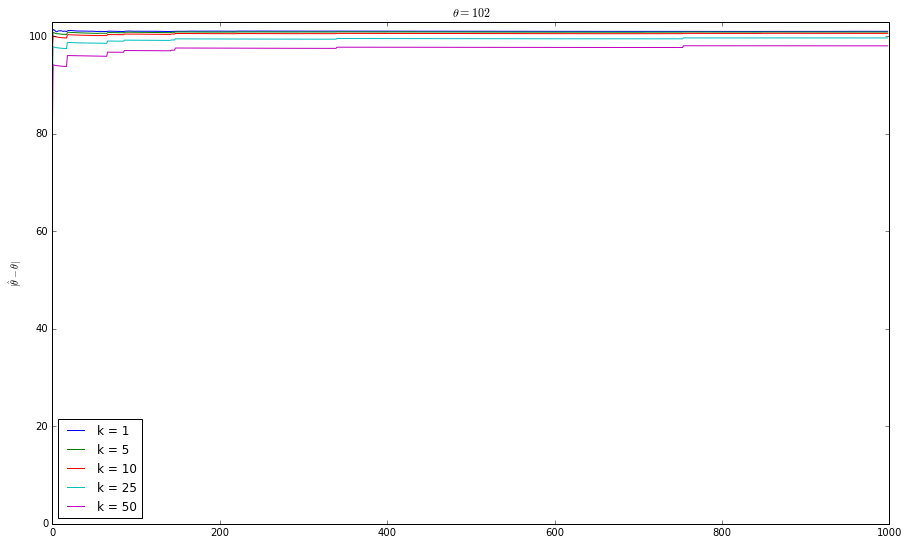

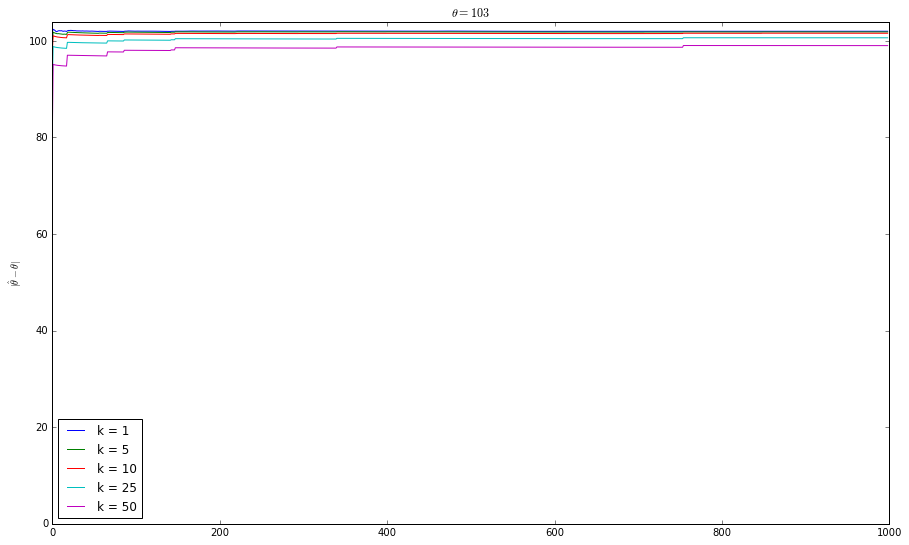

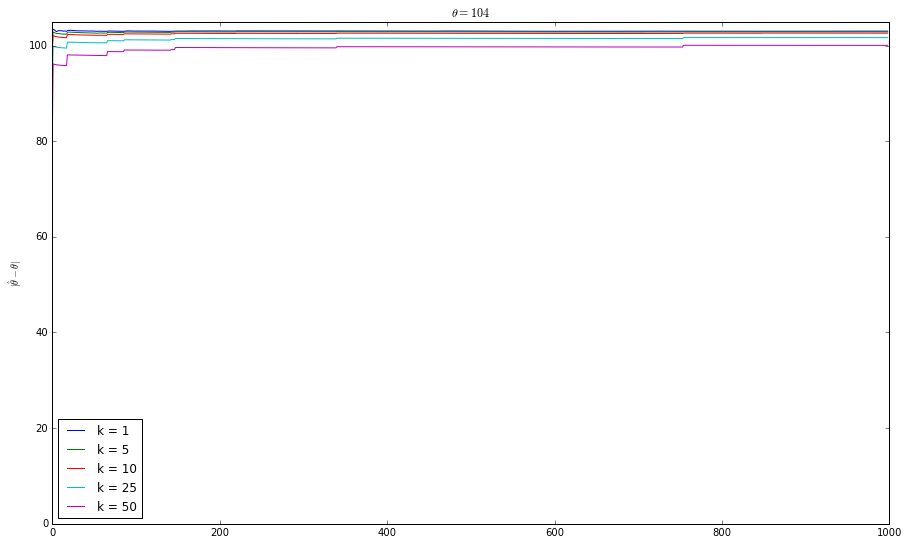

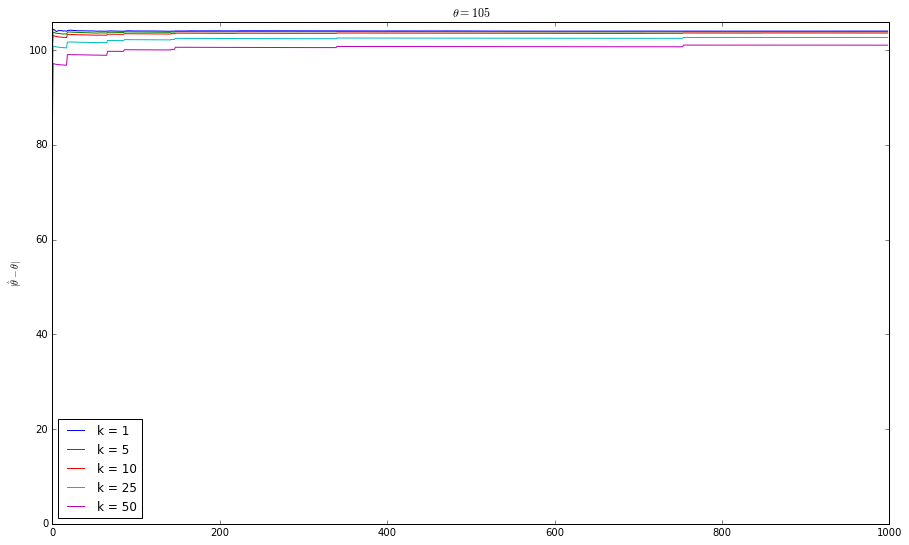

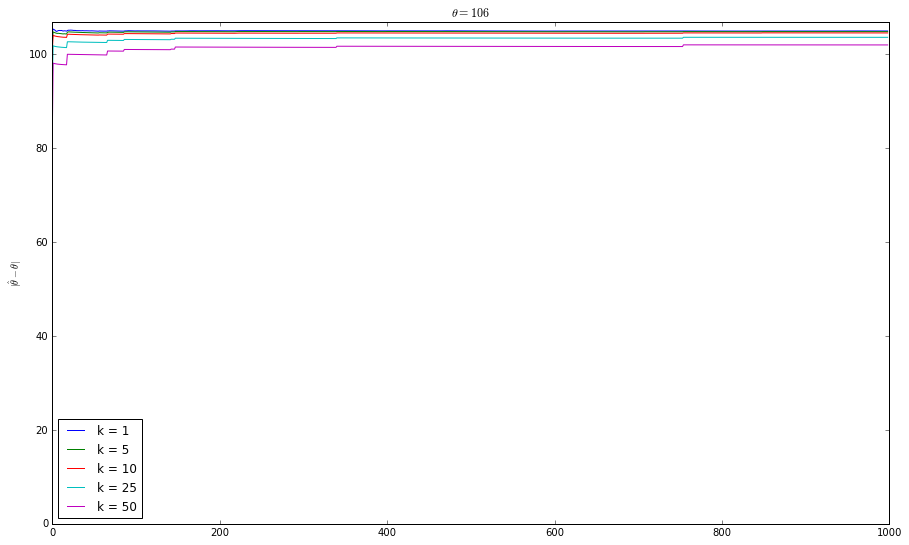

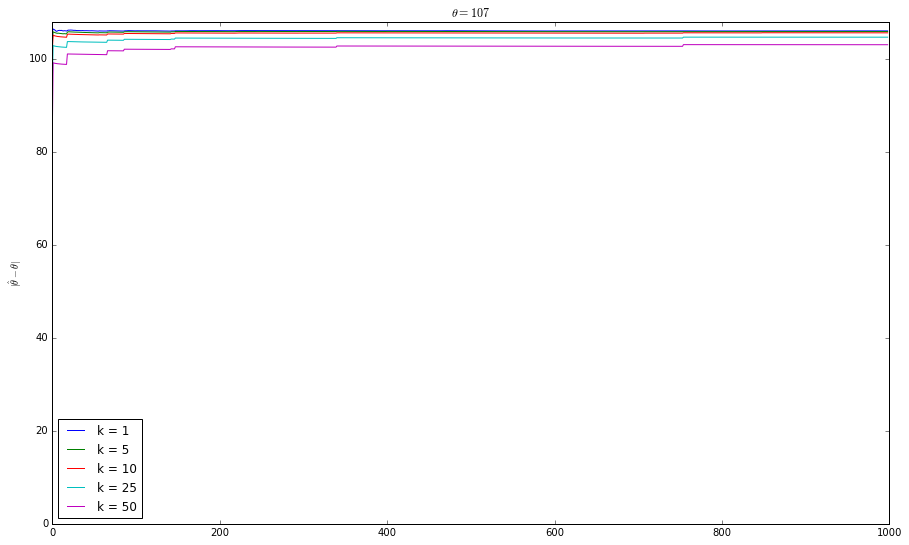

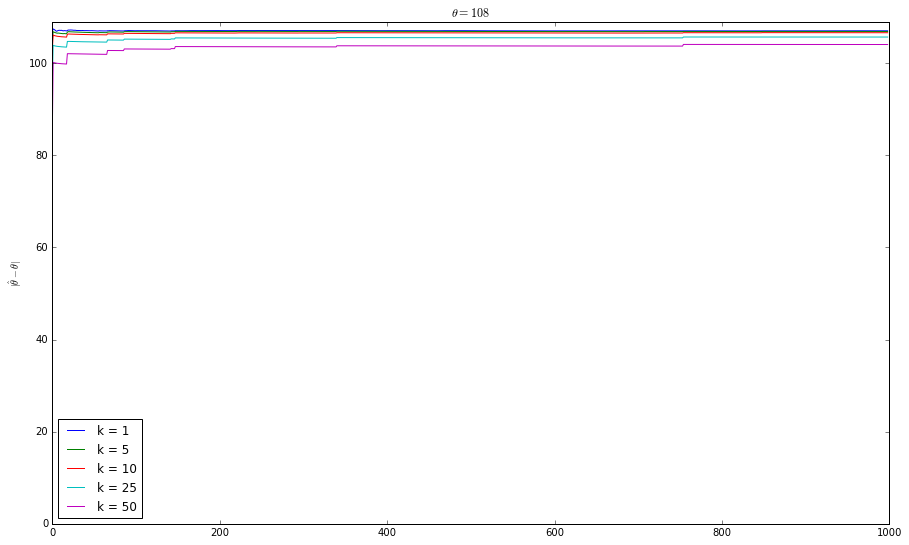

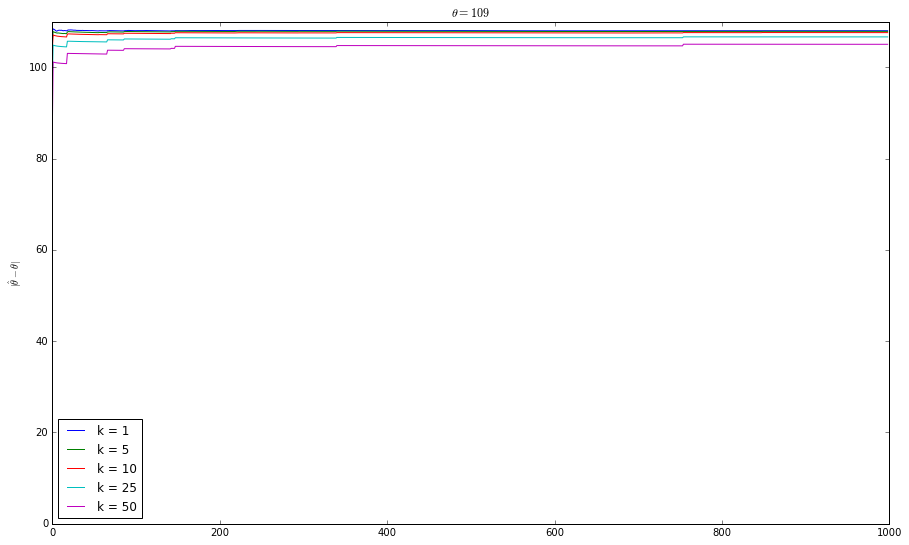

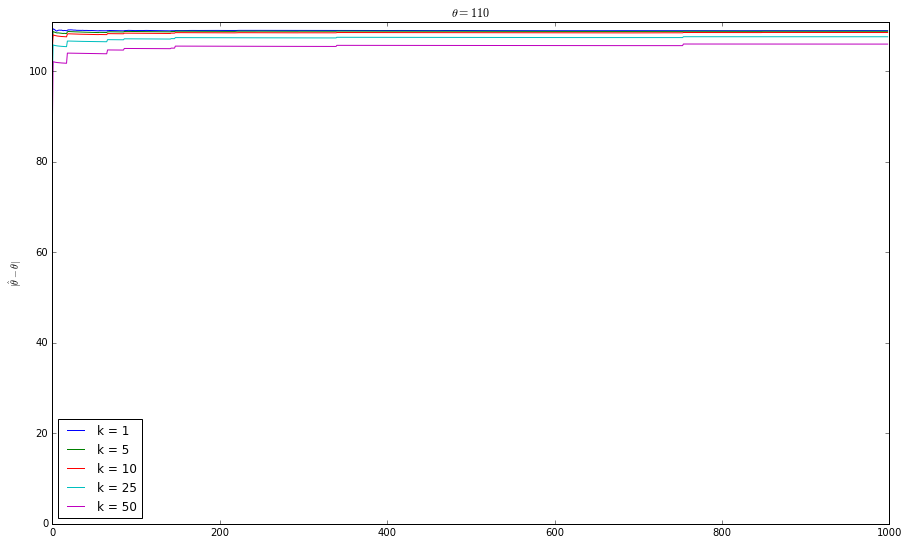

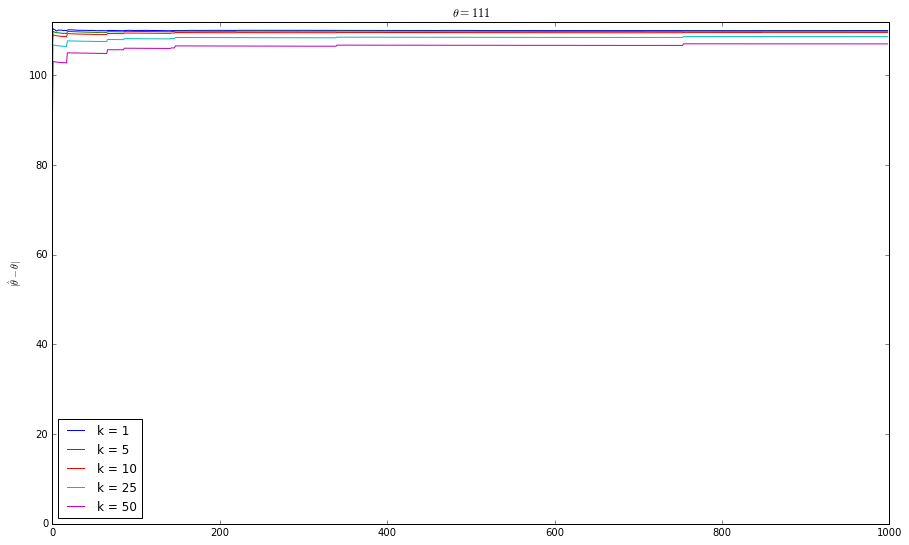

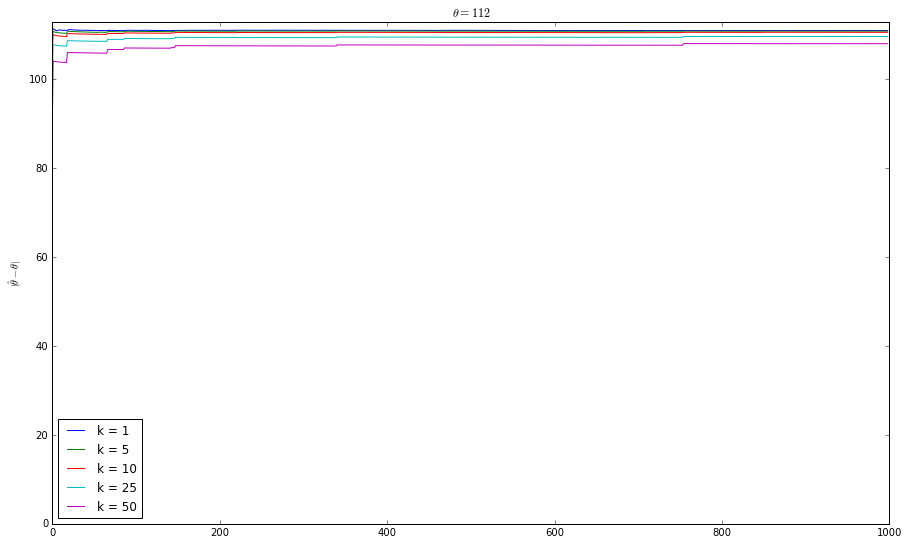

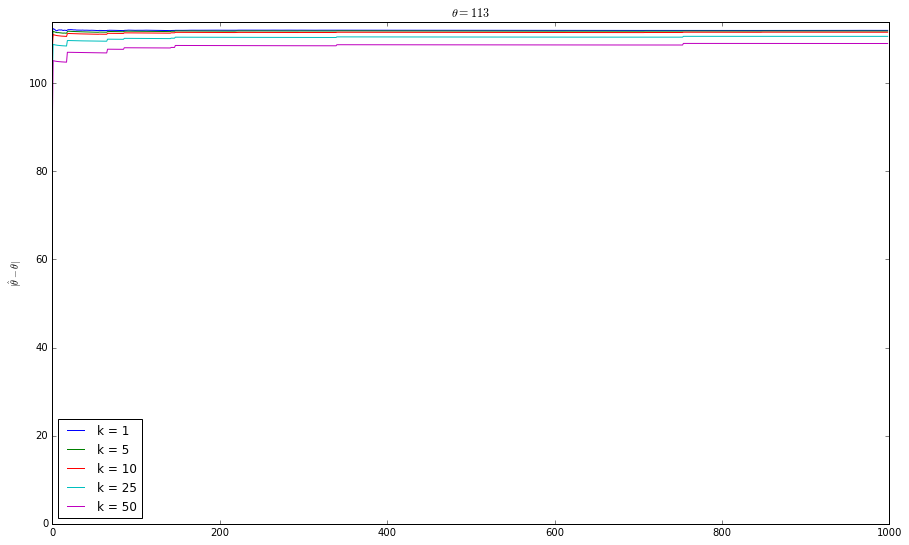

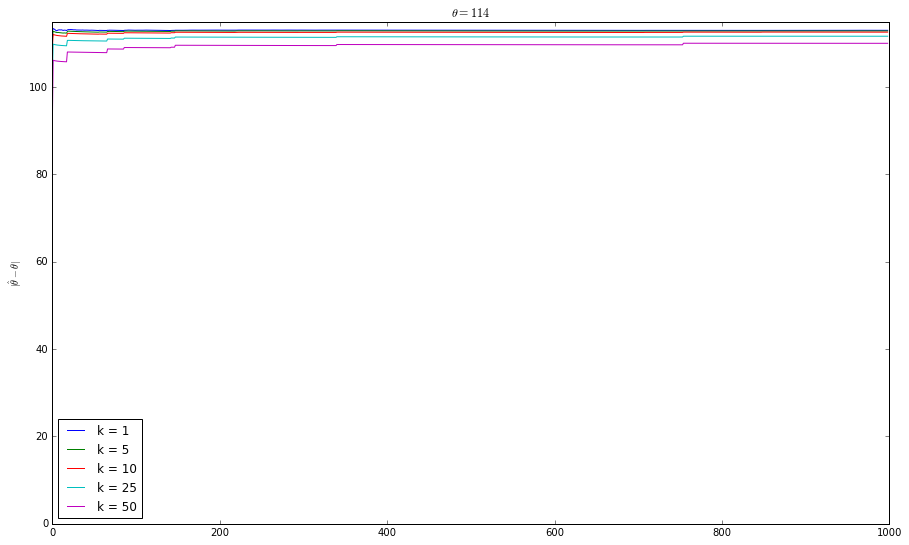

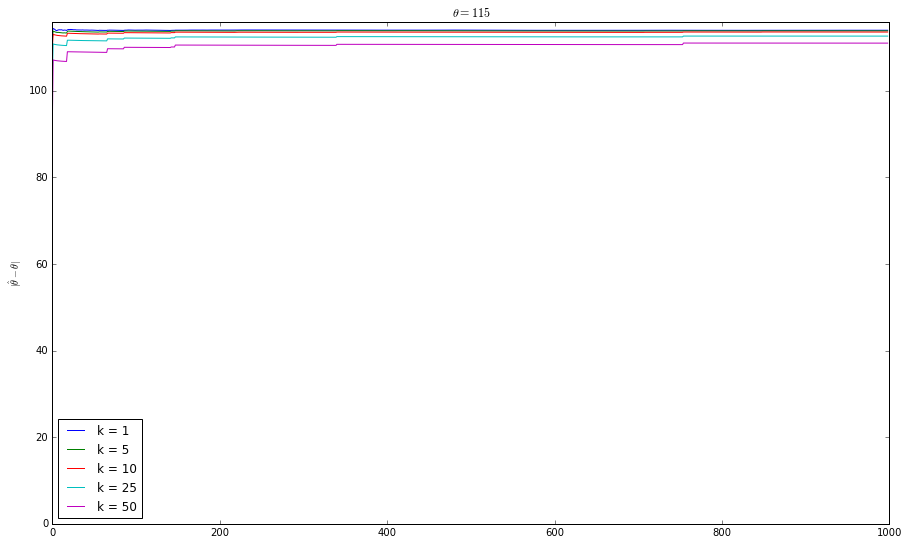

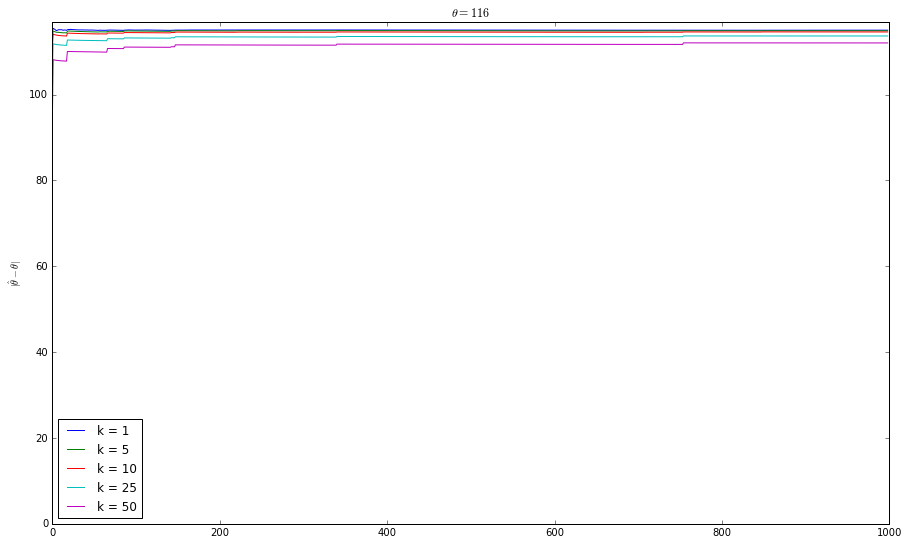

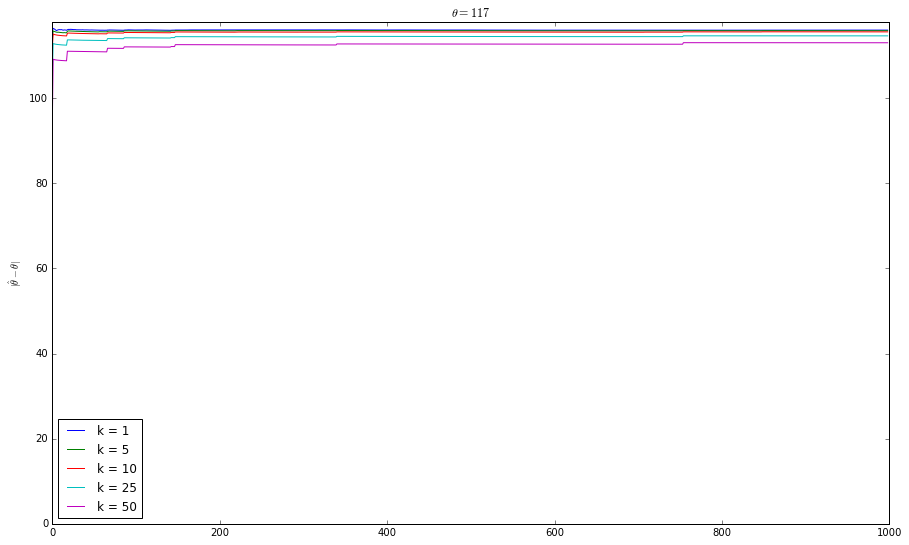

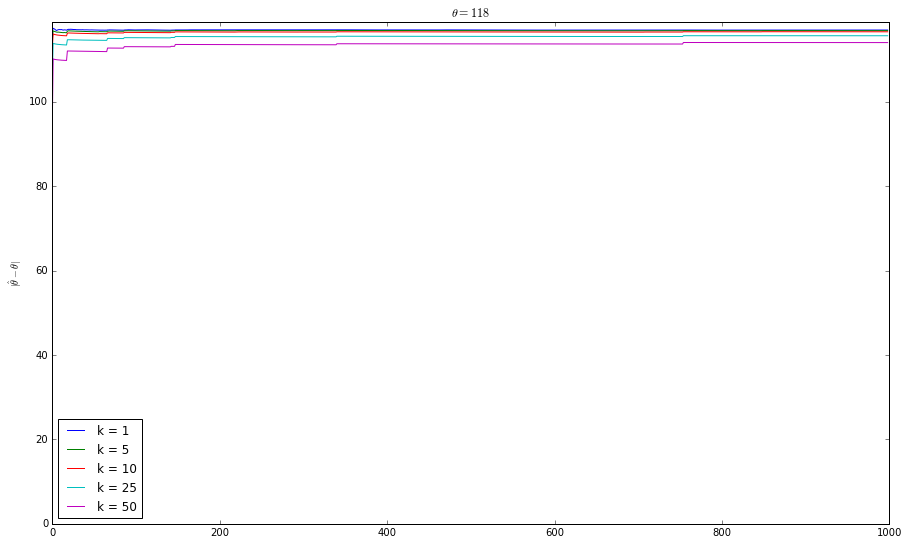

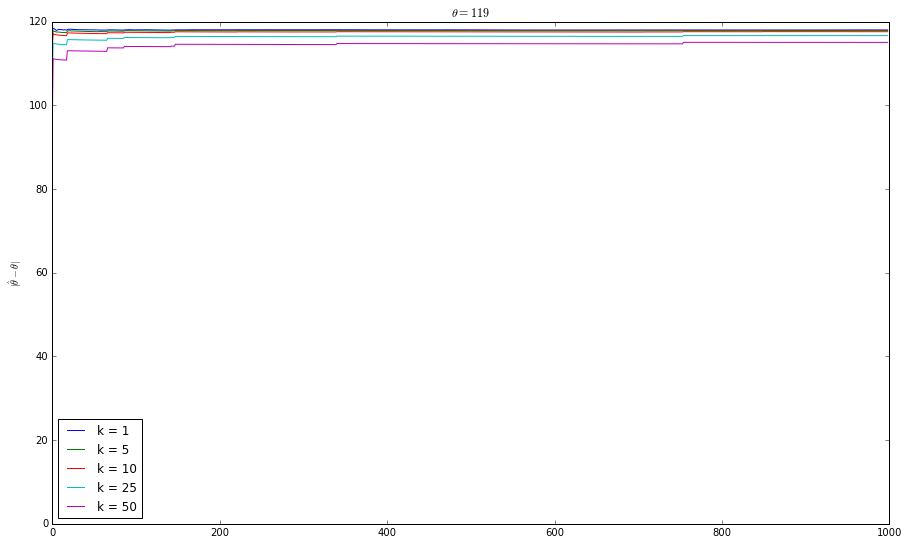

In [56]:
for th in range(90, 120):
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)

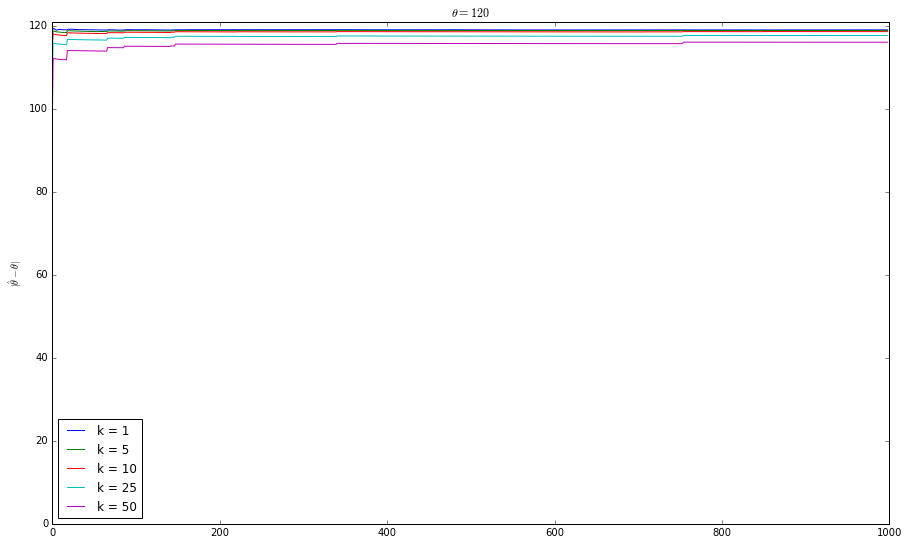

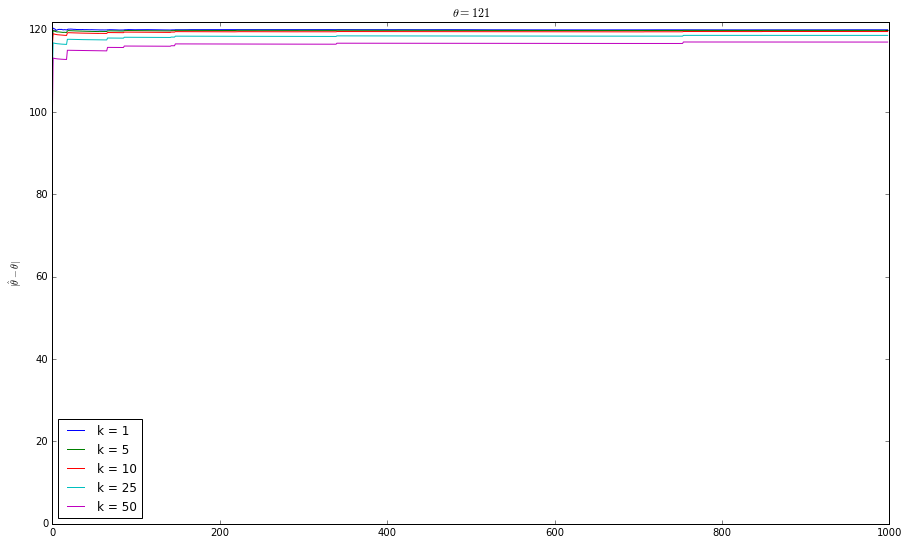

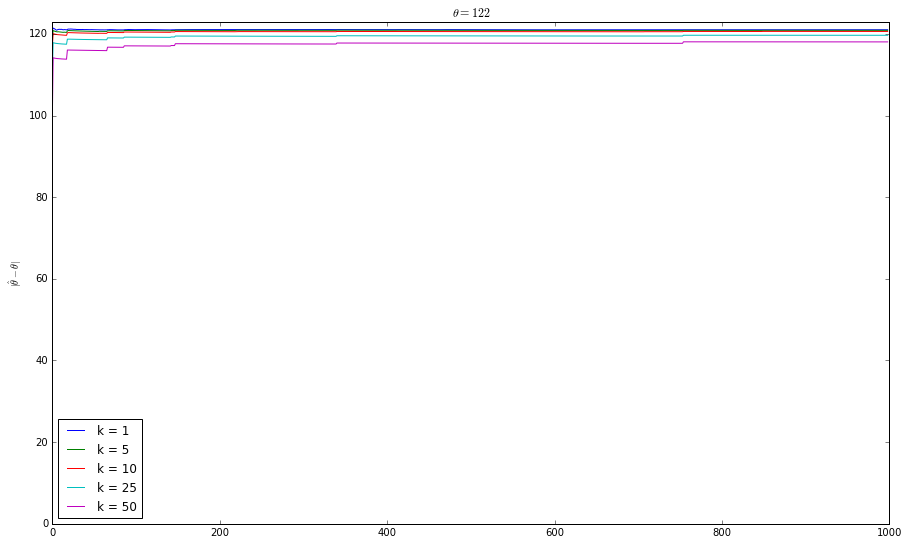

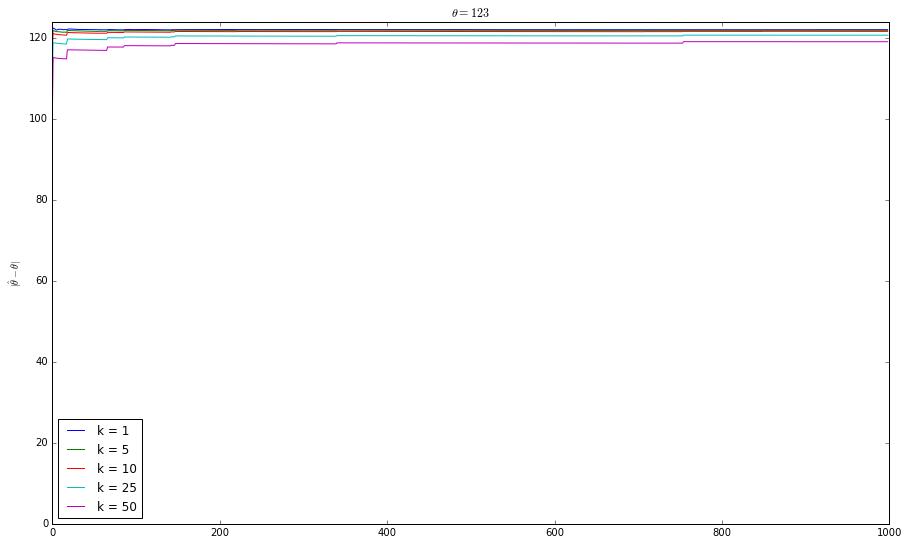

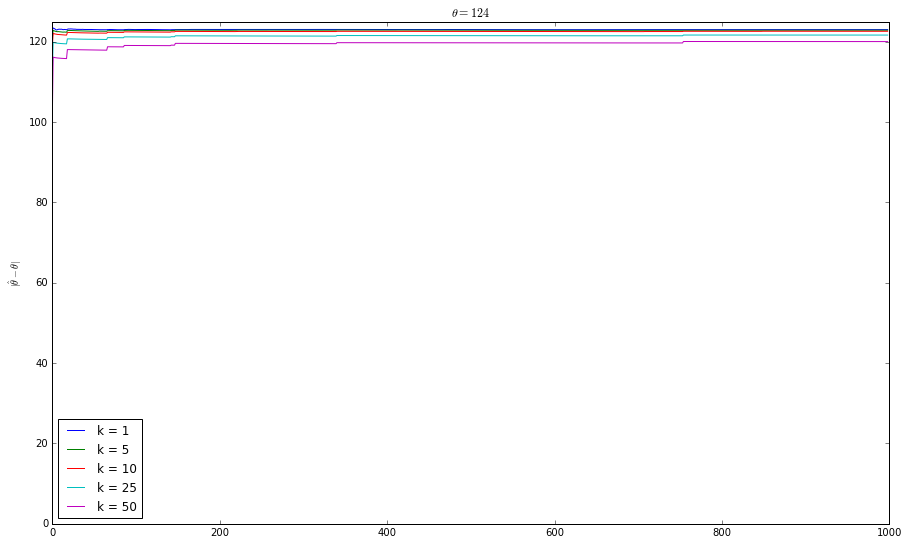

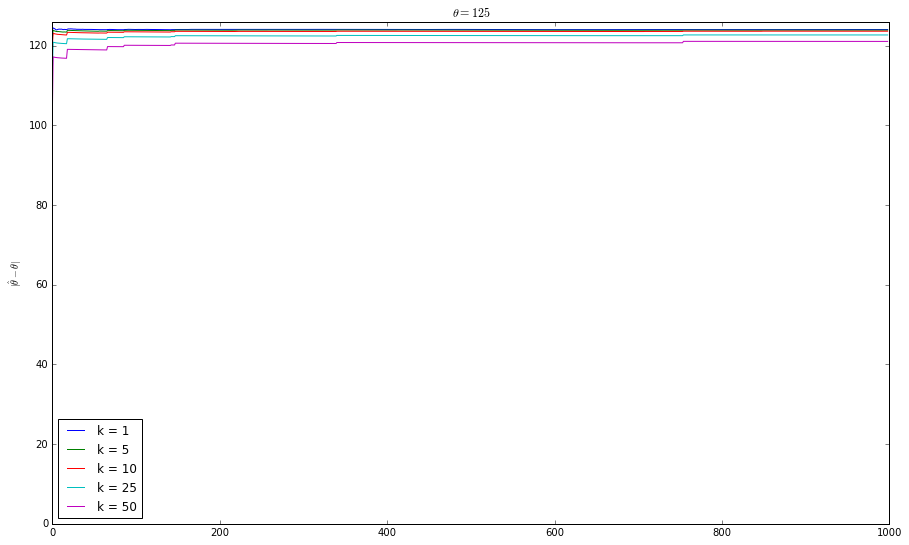

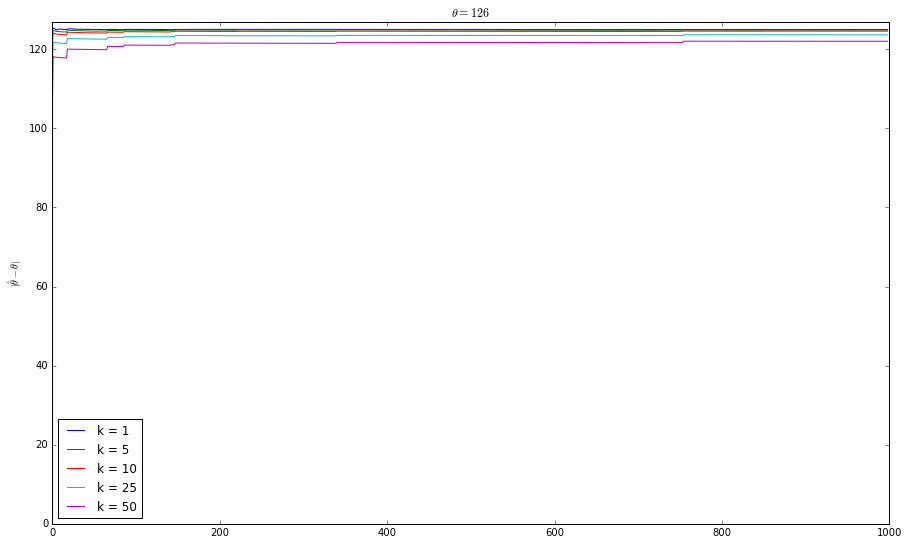

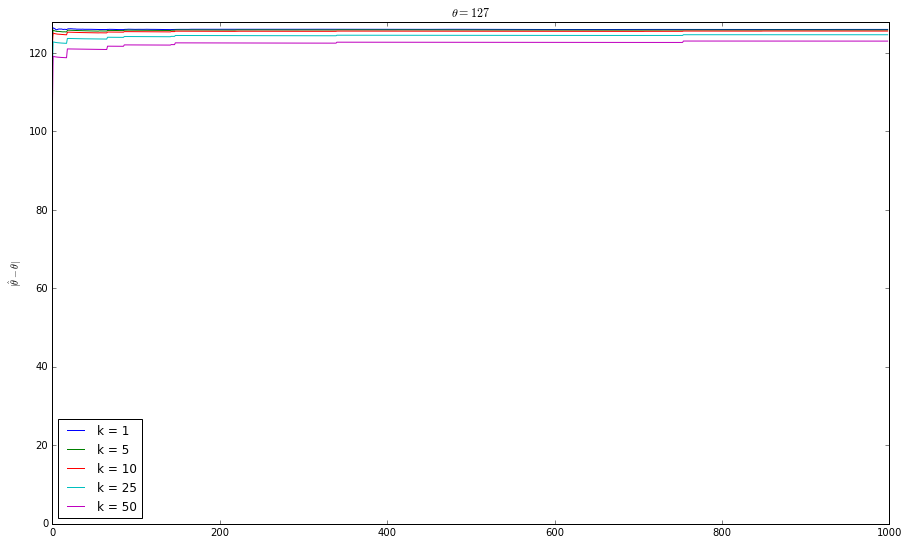

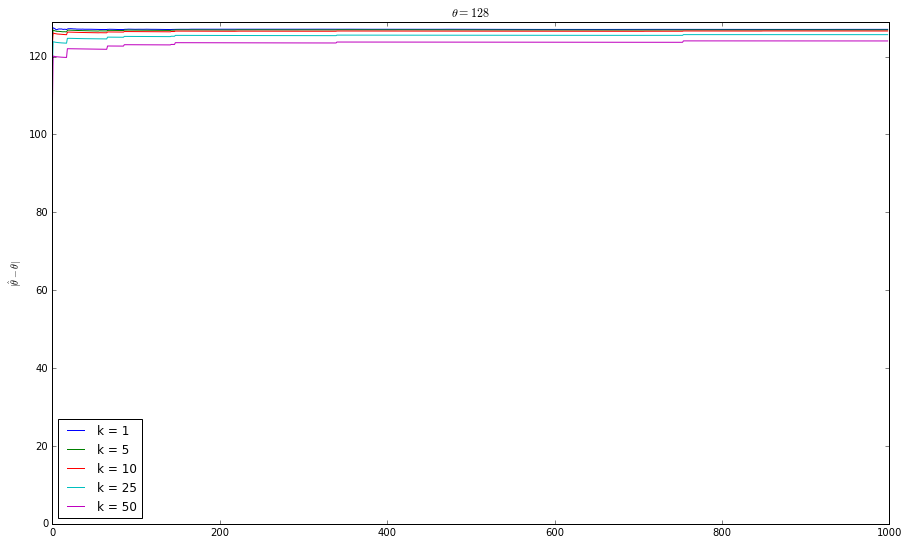

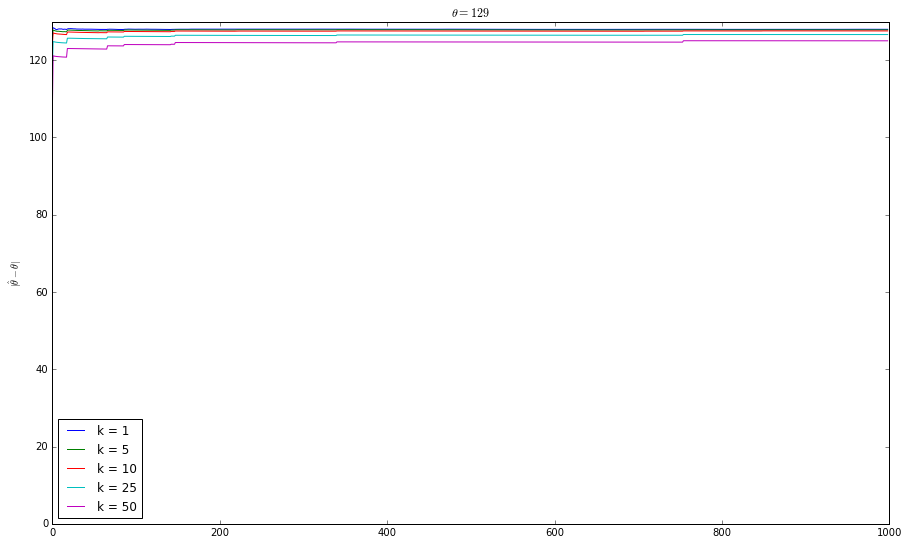

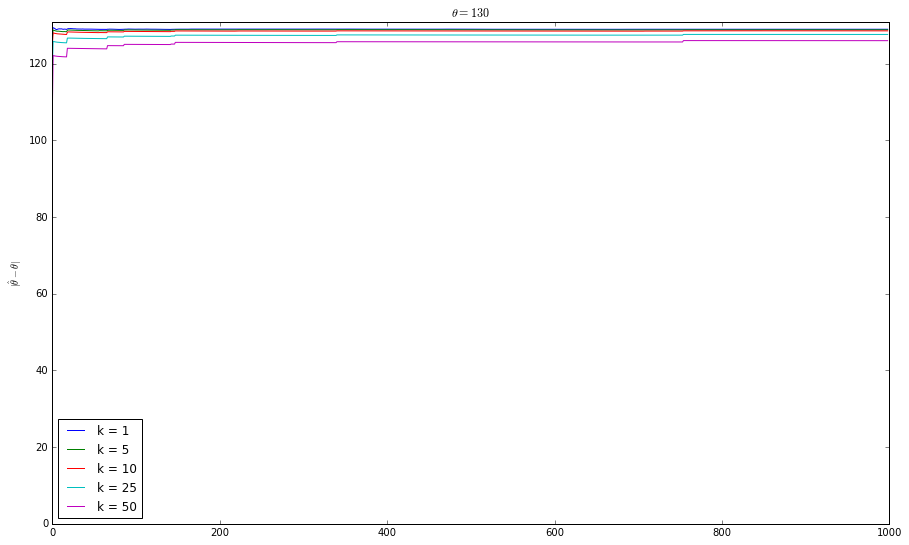

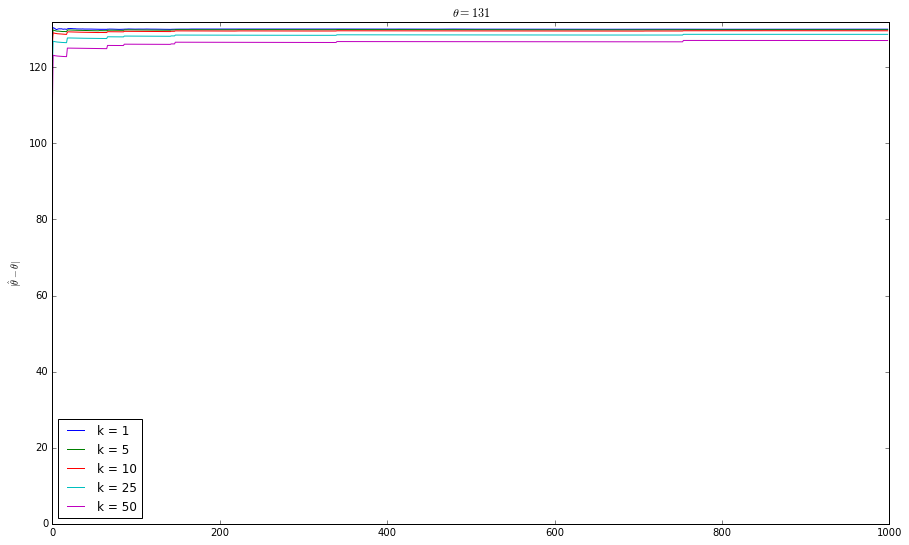

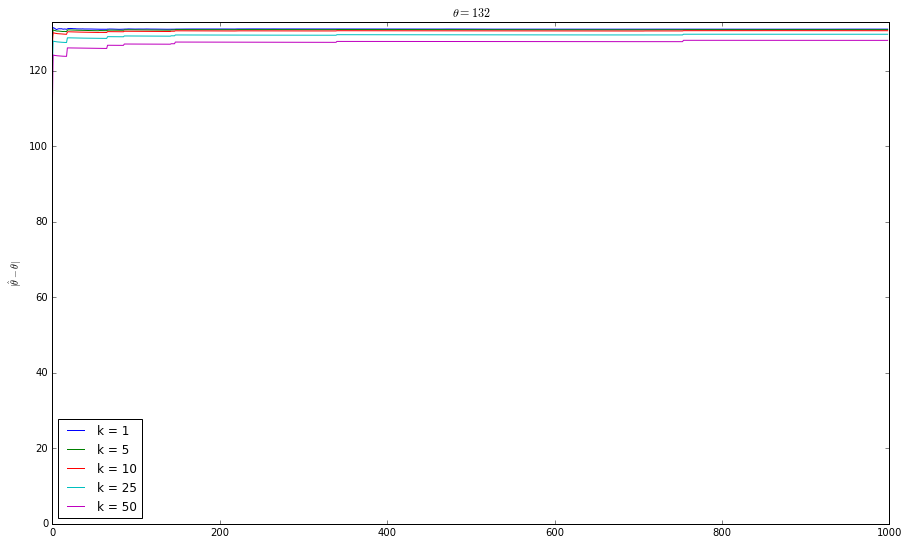

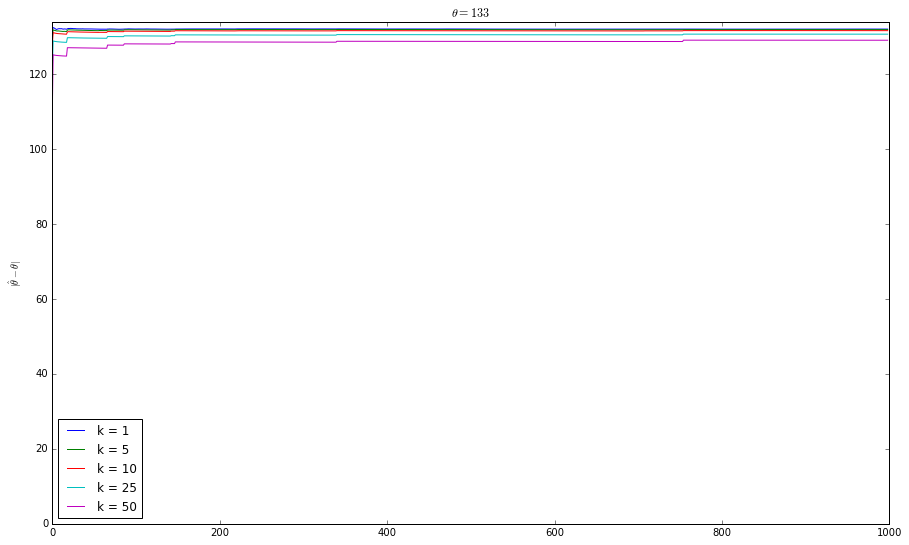

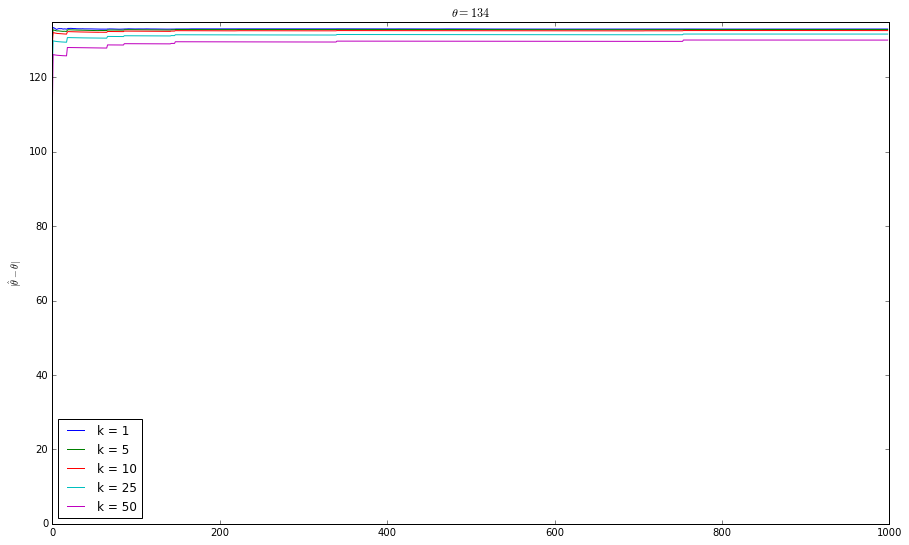

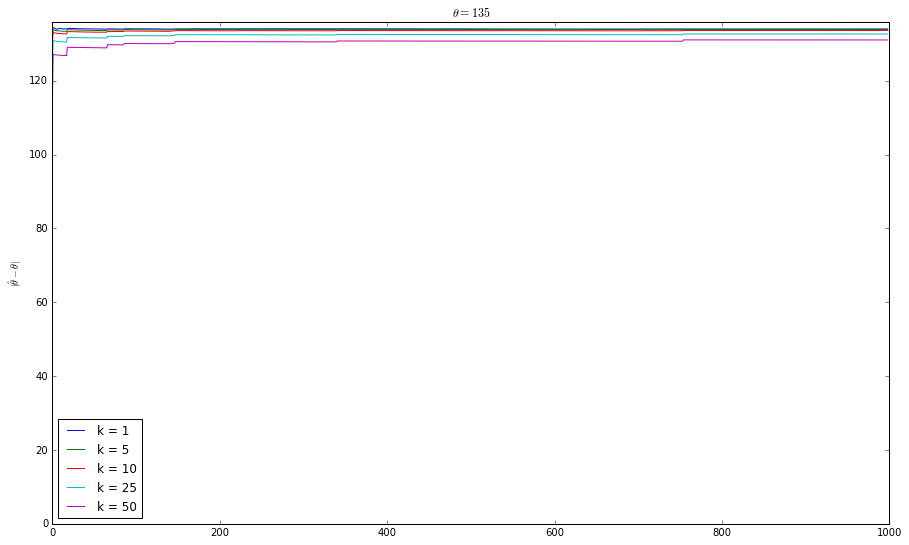

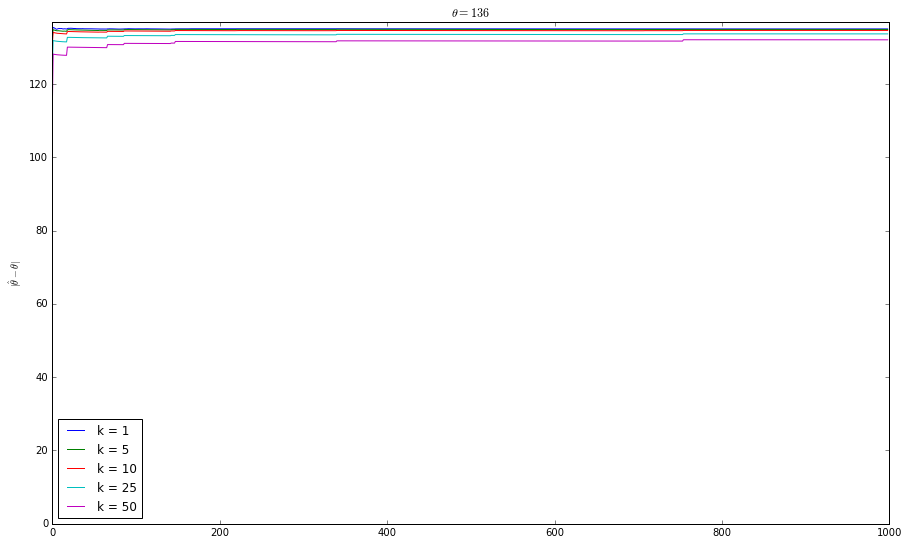

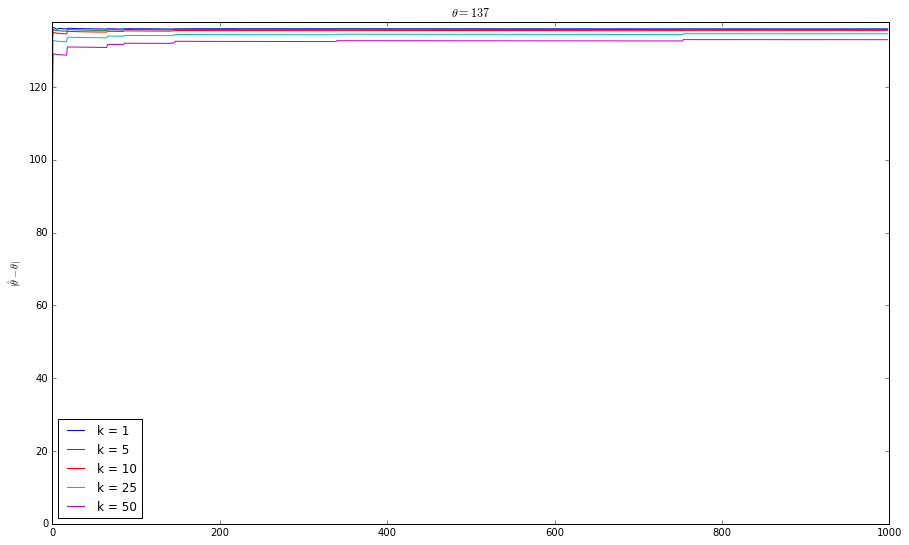

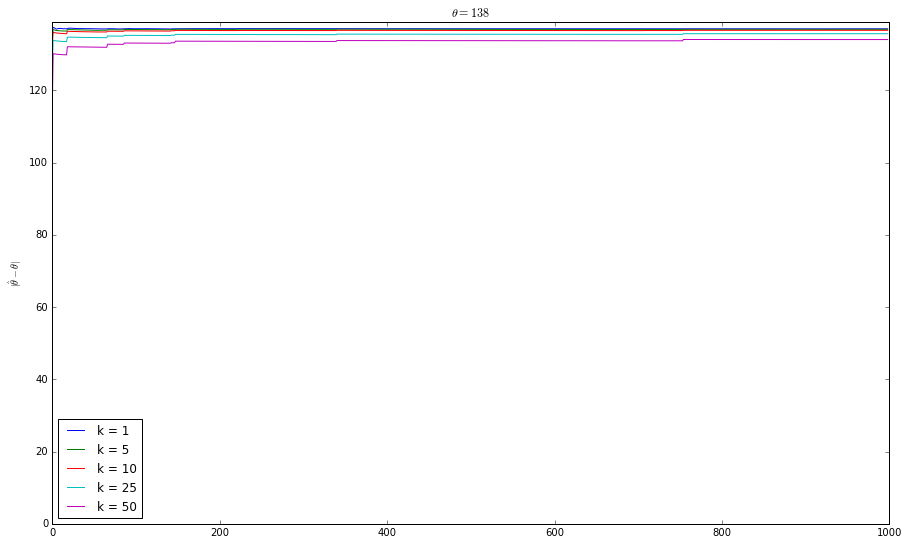

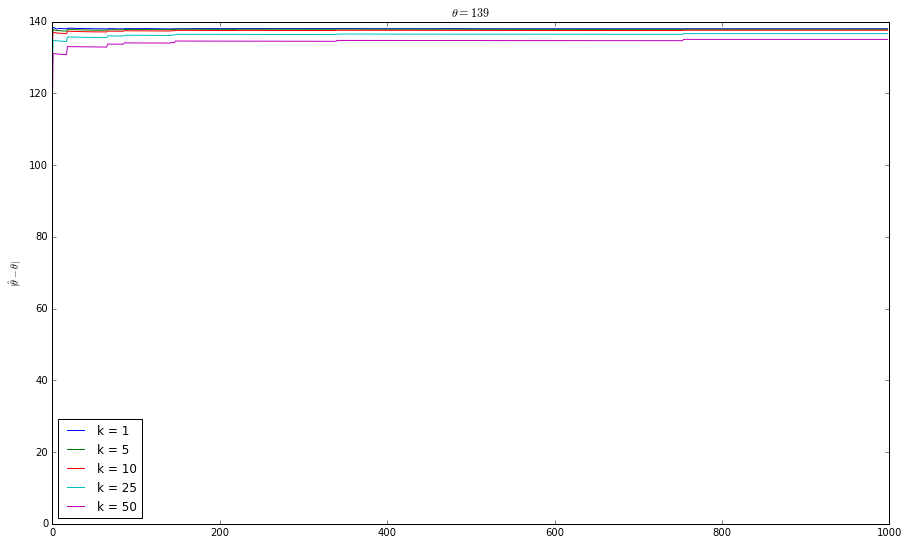

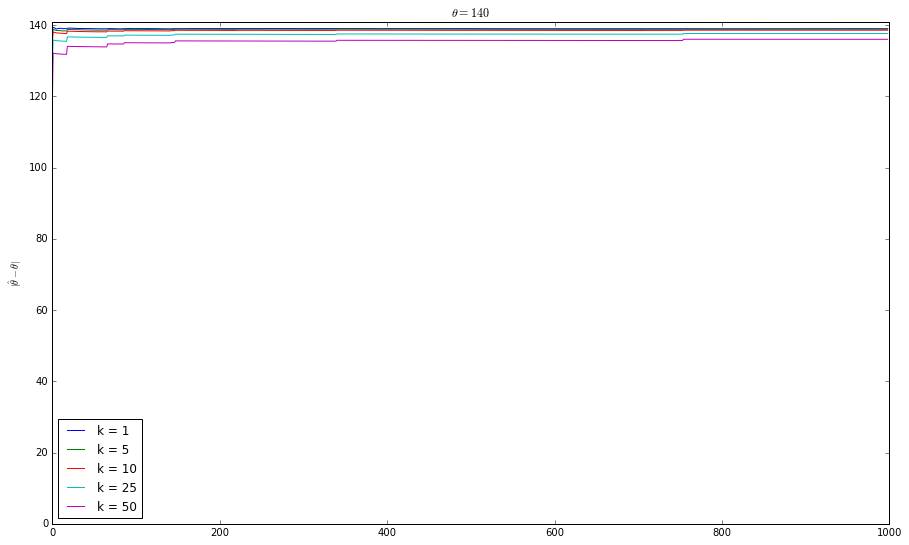

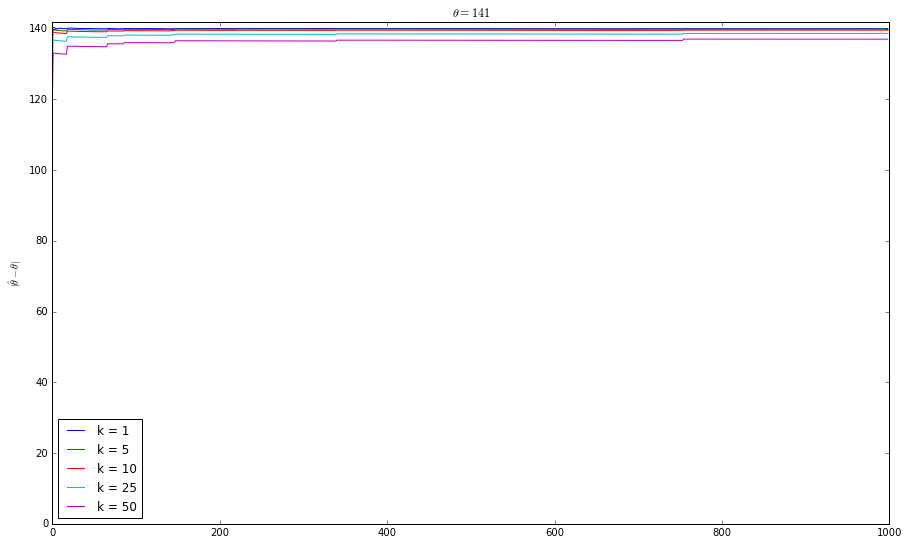

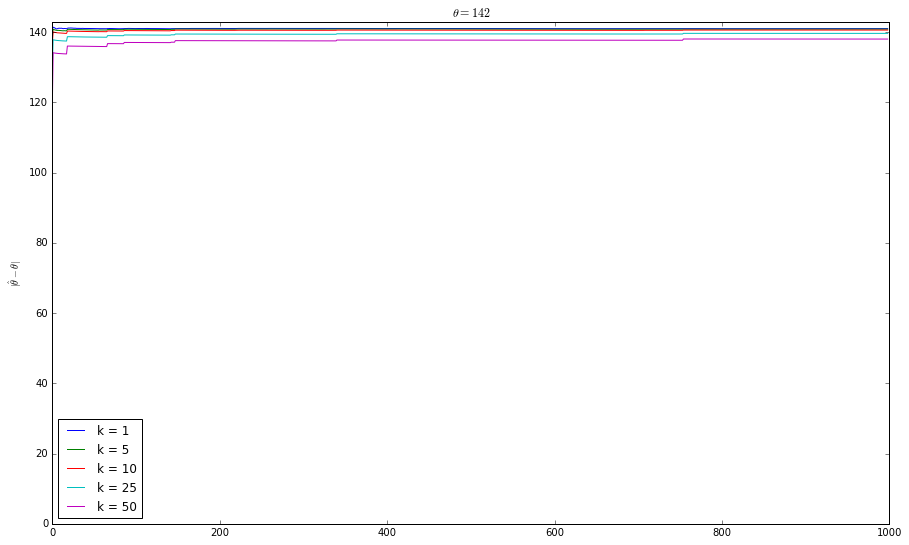

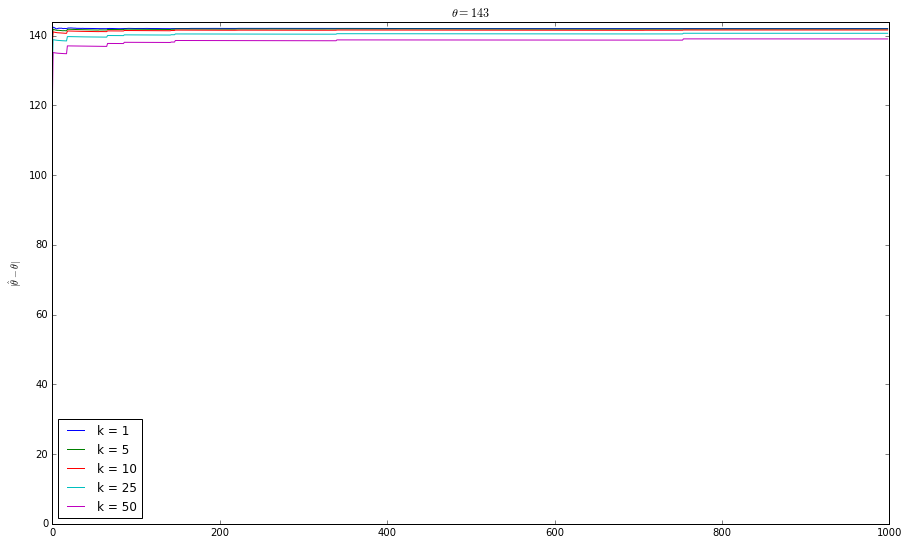

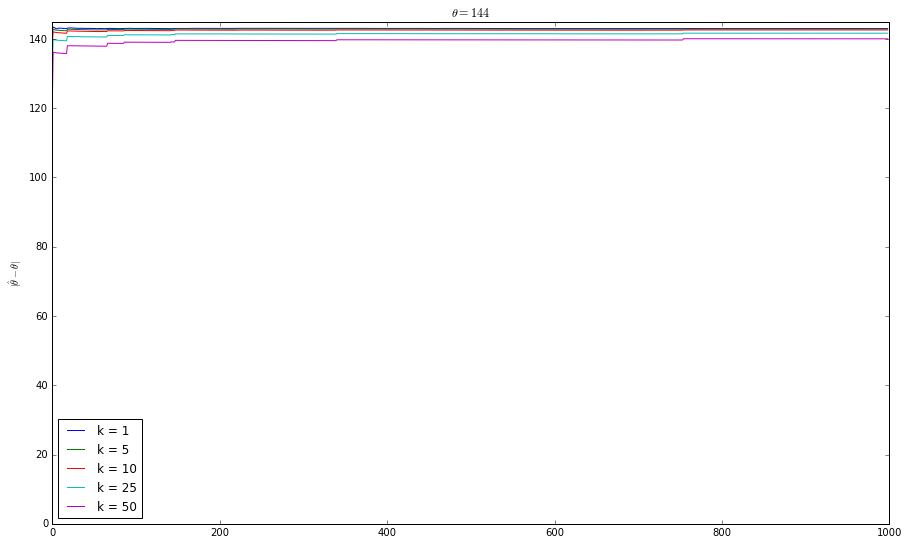

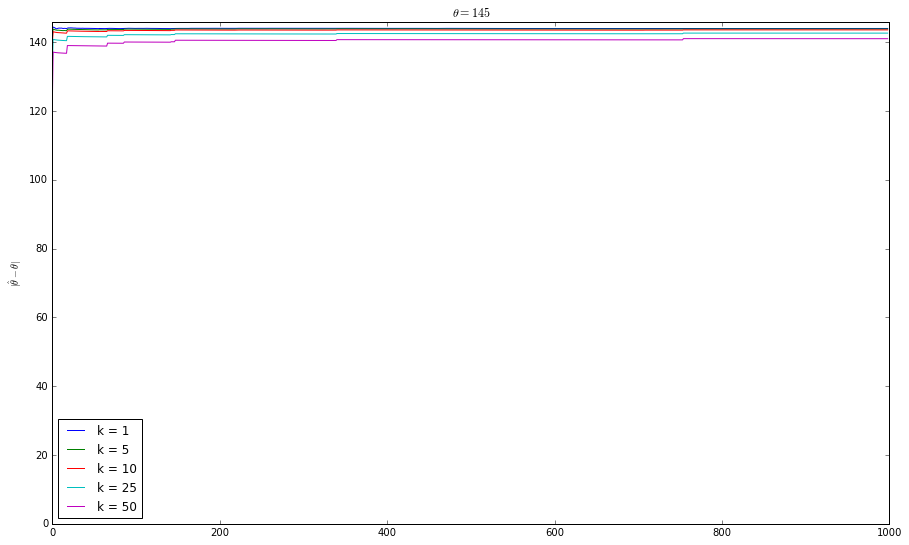

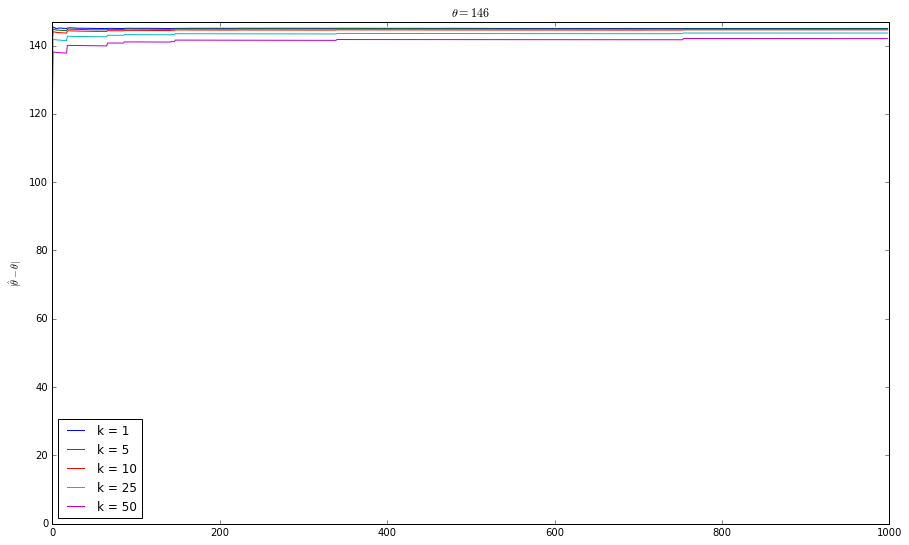

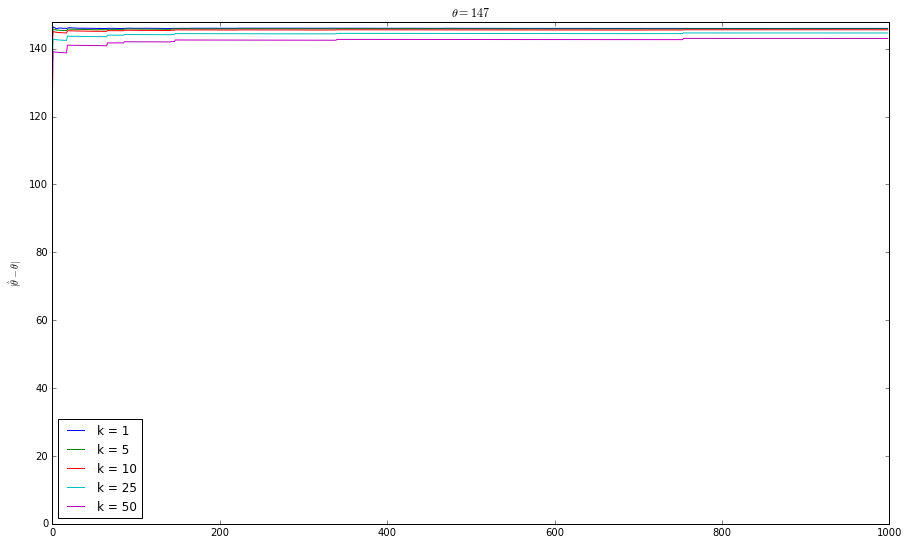

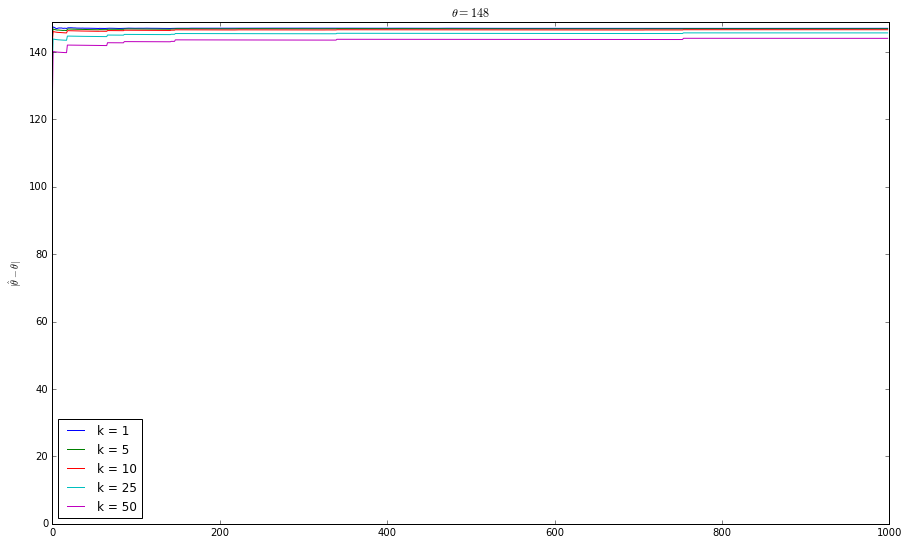

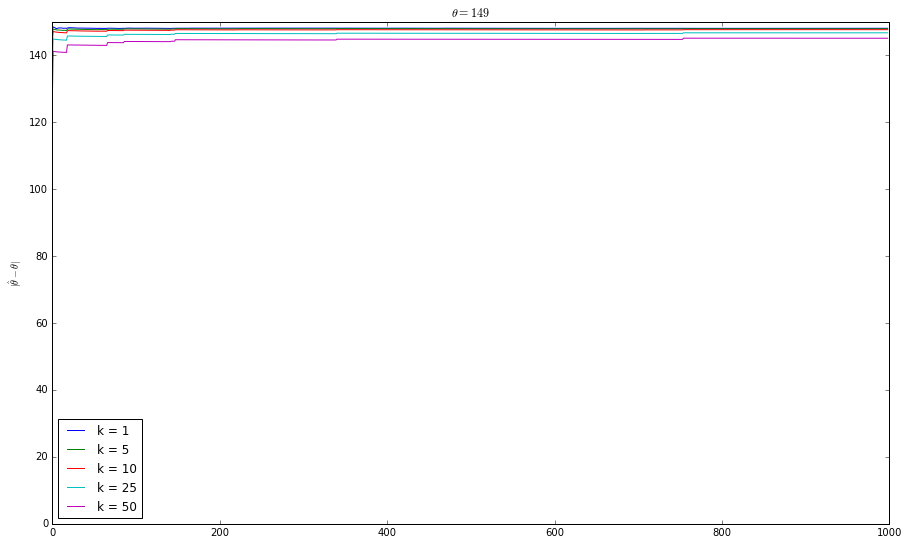

In [57]:
for th in range(120, 150):
    drawPlot([1, 5, 10, 25, 50], th, ymin = 0, ymax = th + 1)